Radiation Pressure simulation with 
SI units,
1 Sun-like star,
belts belts of debris
Ncolpbelt number of collisions per belt
Ncol collisions total, 
Ndust massless particles per collision and 
Npl planets

This copy has better indexing than the first

no p-r drag
Noutput outputs from sim,
randomized or linearly distributed orbital elements per particle,
grain size linearly or randomly distributed from 1-10 microns,
xyz positions of each particle stored in xyz array,

plotted in 9 time steps from above and 2 time steps edge-on,
colourmap maps size of grain (not sure how it's associated though),

particles with e>0.9 (unbound or very long period orbit) are removed from sim,

semi-major axis and beta plotted against grain size,

May 16th: first thing to do tomorrow is figure out how to evenly space the collisions around the orbit

May 17th: add variable for rows and cols

MAy 18th: Copy2: going to make an addcol() function that will take in which belt the new collision happens in, randomizes the orbital elements a bit, and produces a new set of dust particles, added on to the ps array

In [1]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

from matplotlib.colors import ListedColormap
from datetime import datetime

from matplotlib import animation as ani
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/home/fwaller/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
from datetime import datetime

start = datetime.now()

#set up sim, put units in SI, 
#set number of gravitationally interactive bodies
#add sun, pointer array to particles
sim = rebound.Simulation()

sim.N_active = 2 
sim.add(m=1, hash="Sun")
sim.add(m=5.151383772628674e-05, a=30, e=0, hash="Neptune")
ps = sim.particles

#set up radiation force
rebx = reboundx.Extras(sim)
rf = rebx.add("radiation_forces") #extra force added
rf.params["c"] = 10073.9 #speed of light in AU/year

### initialize random seed, planets, collisions massless particles
### each collision gets same number of particles
### linear distribution of grain sizes for each collision
### lists of orbital elements for different collision locations

Ndust = 1 #number of grains per collision
sim.dt = 1e4
a = 33
e = 0.2
inc = 22
sim.move_to_com()     
beta = 0.17

def adddust(Ndust):
    for i in range(0,Ndust): 
        sim.add(a=a, e=e, inc=inc*np.pi/180, Omega=0, pomega=0, f=np.pi, hash=i+sim.N+2)
        ps[-1].params["beta"] = beta
        sim.particles[i].vx*=np.sqrt(1-beta)
        sim.particles[i].vy*=np.sqrt(1-beta)
        sim.particles[i].vz*=np.sqrt(1-beta)

#add all the initial dust particles
for i in range(Ndust):
    adddust(1)

#integrate over sim, recording particle and planet locations

In [28]:
tpi = 2*np.pi
r2d = 360/tpi
Noutput = 1000000
numyears = 1e6
times = np.linspace(0, numyears*2*np.pi, Noutput)
xyz = np.zeros((Noutput, Ndust, 3))
aei = np.zeros((Noutput, Ndust, 9))
for i, time in enumerate(times):
    sim.integrate(time)
    for l, p in enumerate(ps[2:Ndust+2]):
        xyz[i][l] = [p.x, p.y, p.z]
        aei[i][l] = [p.a, p.e, p.inc*r2d, p.T, p.d, p.v, p.Omega*r2d, p.omega*r2d, p.f*r2d]
    if (i%10 == 0):
        print("t = {}".format(time/(tpi)))

t = 0.0
t = 10.000010000009999
t = 20.000020000019997
t = 30.000030000029998
t = 40.000040000039995
t = 50.000050000049995
t = 60.000060000059996
t = 70.00007000007
t = 80.00008000007999
t = 90.00009000009
t = 100.00010000009999
t = 110.00011000011
t = 120.00012000011999
t = 130.00013000012999
t = 140.00014000014
t = 150.00015000015
t = 160.00016000015998
t = 170.00017000017002
t = 180.00018000018
t = 190.00019000019
t = 200.00020000019998
t = 210.00021000021002
t = 220.00022000022
t = 230.00023000022998
t = 240.00024000023998
t = 250.00025000025
t = 260.00026000025997
t = 270.00027000027
t = 280.00028000028
t = 290.00029000028997
t = 300.0003000003
t = 310.00031000031
t = 320.00032000031996
t = 330.00033000033
t = 340.00034000034003
t = 350.00035000034995
t = 360.00036000036
t = 370.00037000036997
t = 380.00038000038
t = 390.00039000039
t = 400.00040000039996
t = 410.00041000041
t = 420.00042000042004
t = 430.00043000042996
t = 440.00044000044
t = 450.00045000045003
t = 460.0004600004

t = 5440.0054400054405
t = 5450.00545000545
t = 5460.005460005459
t = 5470.00547000547
t = 5480.0054800054795
t = 5490.00549000549
t = 5500.0055000055
t = 5510.00551000551
t = 5520.00552000552
t = 5530.005530005529
t = 5540.00554000554
t = 5550.00555000555
t = 5560.005560005559
t = 5570.00557000557
t = 5580.00558000558
t = 5590.00559000559
t = 5600.005600005599
t = 5610.005610005609
t = 5620.00562000562
t = 5630.005630005629
t = 5640.00564000564
t = 5650.00565000565
t = 5660.0056600056605
t = 5670.005670005669
t = 5680.005680005679
t = 5690.00569000569
t = 5700.0057000056995
t = 5710.00571000571
t = 5720.00572000572
t = 5730.005730005731
t = 5740.005740005739
t = 5750.005750005749
t = 5760.00576000576
t = 5770.00577000577
t = 5780.00578000578
t = 5790.00579000579
t = 5800.005800005801
t = 5810.0058100058095
t = 5820.005820005819
t = 5830.00583000583
t = 5840.00584000584
t = 5850.00585000585
t = 5860.00586000586
t = 5870.00587000587
t = 5880.00588000588
t = 5890.005890005889
t = 5900.00

t = 10990.01099001099
t = 11000.011000011
t = 11010.011010011009
t = 11020.01102001102
t = 11030.01103001103
t = 11040.01104001104
t = 11050.01105001105
t = 11060.011060011058
t = 11070.011070011069
t = 11080.01108001108
t = 11090.01109001109
t = 11100.0111000111
t = 11110.01111001111
t = 11120.011120011119
t = 11130.01113001113
t = 11140.01114001114
t = 11150.011150011149
t = 11160.01116001116
t = 11170.011170011168
t = 11180.01118001118
t = 11190.01119001119
t = 11200.011200011199
t = 11210.01121001121
t = 11220.011220011218
t = 11230.01123001123
t = 11240.01124001124
t = 11250.01125001125
t = 11260.011260011259
t = 11270.011270011268
t = 11280.01128001128
t = 11290.011290011289
t = 11300.0113000113
t = 11310.011310011309
t = 11320.011320011321
t = 11330.01133001133
t = 11340.011340011339
t = 11350.01135001135
t = 11360.011360011358
t = 11370.01137001137
t = 11380.01138001138
t = 11390.01139001139
t = 11400.011400011399
t = 11410.011410011408
t = 11420.01142001142
t = 11430.011430011

t = 14700.0147000147
t = 14710.01471001471
t = 14720.014720014718
t = 14730.01473001473
t = 14740.014740014738
t = 14750.01475001475
t = 14760.01476001476
t = 14770.01477001477
t = 14780.014780014779
t = 14790.014790014788
t = 14800.0148000148
t = 14810.014810014809
t = 14820.01482001482
t = 14830.014830014828
t = 14840.014840014841
t = 14850.01485001485
t = 14860.014860014859
t = 14870.01487001487
t = 14880.014880014878
t = 14890.01489001489
t = 14900.0149000149
t = 14910.01491001491
t = 14920.014920014919
t = 14930.014930014928
t = 14940.01494001494
t = 14950.01495001495
t = 14960.01496001496
t = 14970.014970014969
t = 14980.014980014981
t = 14990.01499001499
t = 15000.015000014999
t = 15010.01501001501
t = 15020.015020015018
t = 15030.01503001503
t = 15040.01504001504
t = 15050.01505001505
t = 15060.01506001506
t = 15070.015070015068
t = 15080.01508001508
t = 15090.01509001509
t = 15100.0151000151
t = 15110.015110015109
t = 15120.015120015121
t = 15130.01513001513
t = 15140.01514001

t = 19950.01995001995
t = 19960.01996001996
t = 19970.01997001997
t = 19980.01998001998
t = 19990.019990019988
t = 20000.02000002
t = 20010.02001002001
t = 20020.02002002002
t = 20030.02003002003
t = 20040.02004002004
t = 20050.020050020048
t = 20060.02006002006
t = 20070.02007002007
t = 20080.02008002008
t = 20090.02009002009
t = 20100.020100020098
t = 20110.02011002011
t = 20120.02012002012
t = 20130.02013002013
t = 20140.02014002014
t = 20150.020150020147
t = 20160.020160020158
t = 20170.02017002017
t = 20180.02018002018
t = 20190.02019002019
t = 20200.020200020197
t = 20210.020210020208
t = 20220.02022002022
t = 20230.02023002023
t = 20240.02024002024
t = 20250.02025002025
t = 20260.020260020257
t = 20270.020270020268
t = 20280.02028002028
t = 20290.02029002029
t = 20300.0203000203
t = 20310.020310020307
t = 20320.02032002032
t = 20330.02033002033
t = 20340.02034002034
t = 20350.02035002035
t = 20360.020360020357
t = 20370.02037002037
t = 20380.020380020378
t = 20390.02039002039
t 

t = 23690.023690023692
t = 23700.0237000237
t = 23710.02371002371
t = 23720.02372002372
t = 23730.023730023728
t = 23740.02374002374
t = 23750.02375002375
t = 23760.02376002376
t = 23770.023770023767
t = 23780.023780023777
t = 23790.02379002379
t = 23800.0238000238
t = 23810.02381002381
t = 23820.02382002382
t = 23830.02383002383
t = 23840.023840023838
t = 23850.02385002385
t = 23860.02386002386
t = 23870.023870023866
t = 23880.023880023877
t = 23890.02389002389
t = 23900.0239000239
t = 23910.02391002391
t = 23920.02392002392
t = 23930.02393002393
t = 23940.023940023937
t = 23950.023950023948
t = 23960.02396002396
t = 23970.023970023973
t = 23980.023980023976
t = 23990.02399002399
t = 24000.024000024
t = 24010.024010024008
t = 24020.02402002402
t = 24030.02403002403
t = 24040.02404002404
t = 24050.024050024047
t = 24060.024060024058
t = 24070.024070024072
t = 24080.024080024075
t = 24090.02409002409
t = 24100.0241000241
t = 24110.02411002411
t = 24120.024120024118
t = 24130.02413002413

t = 28810.028810028805
t = 28820.02882002882
t = 28830.02883002883
t = 28840.02884002884
t = 28850.028850028848
t = 28860.02886002886
t = 28870.02887002887
t = 28880.028880028876
t = 28890.028890028887
t = 28900.0289000289
t = 28910.028910028912
t = 28920.02892002892
t = 28930.02893002893
t = 28940.02894002894
t = 28950.028950028947
t = 28960.028960028958
t = 28970.02897002897
t = 28980.02898002898
t = 28990.028990028986
t = 29000.029000029
t = 29010.02901002901
t = 29020.02902002902
t = 29030.02903002903
t = 29040.02904002904
t = 29050.02905002905
t = 29060.029060029057
t = 29070.029070029068
t = 29080.02908002908
t = 29090.029090029086
t = 29100.0291000291
t = 29110.02911002911
t = 29120.02912002912
t = 29130.02913002913
t = 29140.02914002914
t = 29150.02915002915
t = 29160.029160029157
t = 29170.029170029167
t = 29180.029180029178
t = 29190.029190029192
t = 29200.0292000292
t = 29210.02921002921
t = 29220.02922002922
t = 29230.029230029228
t = 29240.02924002924
t = 29250.02925002925

t = 32550.03255003255
t = 32560.032560032556
t = 32570.03257003257
t = 32580.03258003258
t = 32590.032590032588
t = 32600.0326000326
t = 32610.03261003261
t = 32620.03262003262
t = 32630.032630032627
t = 32640.032640032638
t = 32650.03265003265
t = 32660.032660032655
t = 32670.03267003267
t = 32680.03268003268
t = 32690.03269003269
t = 32700.032700032698
t = 32710.03271003271
t = 32720.03272003272
t = 32730.032730032726
t = 32740.032740032737
t = 32750.032750032748
t = 32760.032760032762
t = 32770.03277003277
t = 32780.03278003278
t = 32790.03279003279
t = 32800.03280003279
t = 32810.032810032804
t = 32820.03282003282
t = 32830.03283003283
t = 32840.032840032836
t = 32850.03285003285
t = 32860.03286003286
t = 32870.03287003287
t = 32880.03288003288
t = 32890.03289003289
t = 32900.0329000329
t = 32910.0329100329
t = 32920.03292003292
t = 32930.03293003293
t = 32940.032940032936
t = 32950.032950032946
t = 32960.03296003296
t = 32970.03297003297
t = 32980.03298003298
t = 32990.03299003299

t = 37620.03762003762
t = 37630.03763003763
t = 37640.03764003764
t = 37650.03765003765
t = 37660.03766003766
t = 37670.037670037666
t = 37680.037680037676
t = 37690.03769003769
t = 37700.0377000377
t = 37710.03771003771
t = 37720.03772003772
t = 37730.03773003773
t = 37740.03774003774
t = 37750.03775003775
t = 37760.03776003776
t = 37770.03777003777
t = 37780.037780037776
t = 37790.037790037786
t = 37800.0378000378
t = 37810.03781003781
t = 37820.03782003782
t = 37830.03783003783
t = 37840.03784003784
t = 37850.03785003785
t = 37860.03786003786
t = 37870.03787003787
t = 37880.037880037875
t = 37890.037890037886
t = 37900.037900037896
t = 37910.037910037914
t = 37920.03792003792
t = 37930.03793003793
t = 37940.03794003794
t = 37950.03795003795
t = 37960.03796003796
t = 37970.03797003797
t = 37980.03798003798
t = 37990.037990037985
t = 38000.038000037996
t = 38010.03801003801
t = 38020.03802003802
t = 38030.03803003803
t = 38040.03804003804
t = 38050.03805003805
t = 38060.03806003806
t 

t = 42610.04261004261
t = 42620.04262004262
t = 42630.042630042626
t = 42640.04264004264
t = 42650.04265004265
t = 42660.04266004266
t = 42670.04267004267
t = 42680.04268004268
t = 42690.04269004269
t = 42700.04270004269
t = 42710.042710042704
t = 42720.042720042715
t = 42730.042730042725
t = 42740.04274004274
t = 42750.042750042754
t = 42760.042760042765
t = 42770.04277004277
t = 42780.04278004278
t = 42790.04279004279
t = 42800.0428000428
t = 42810.04281004281
t = 42820.04282004282
t = 42830.04283004283
t = 42840.042840042835
t = 42850.042850042846
t = 42860.04286004286
t = 42870.04287004287
t = 42880.04288004288
t = 42890.04289004289
t = 42900.0429000429
t = 42910.0429100429
t = 42920.04292004291
t = 42930.042930042924
t = 42940.04294004294
t = 42950.04295004295
t = 42960.04296004296
t = 42970.042970042974
t = 42980.04298004298
t = 42990.04299004299
t = 43000.043000043
t = 43010.04301004301
t = 43020.04302004302
t = 43030.04303004303
t = 43040.04304004304
t = 43050.043050043045
t = 

t = 48030.04803004803
t = 48040.04804004804
t = 48050.04805004805
t = 48060.04806004806
t = 48070.04807004807
t = 48080.04808004808
t = 48090.04809004808
t = 48100.048100048094
t = 48110.048110048105
t = 48120.048120048115
t = 48130.048130048126
t = 48140.048140048144
t = 48150.048150048155
t = 48160.04816004815
t = 48170.04817004817
t = 48180.04818004818
t = 48190.04819004819
t = 48200.0482000482
t = 48210.04821004821
t = 48220.04822004822
t = 48230.048230048225
t = 48240.048240048236
t = 48250.04825004825
t = 48260.04826004826
t = 48270.04827004827
t = 48280.04828004828
t = 48290.04829004829
t = 48300.04830004829
t = 48310.0483100483
t = 48320.048320048314
t = 48330.048330048325
t = 48340.04834004834
t = 48350.04835004835
t = 48360.048360048364
t = 48370.04837004837
t = 48380.04838004838
t = 48390.04839004839
t = 48400.0484000484
t = 48410.04841004841
t = 48420.04842004842
t = 48430.04843004843
t = 48440.048440048435
t = 48450.048450048445
t = 48460.048460048456
t = 48470.04847004847

t = 53020.05302005302
t = 53030.05303005303
t = 53040.05304005304
t = 53050.05305005305
t = 53060.05306005306
t = 53070.053070053065
t = 53080.053080053076
t = 53090.05309005309
t = 53100.0531000531
t = 53110.05311005311
t = 53120.05312005312
t = 53130.05313005313
t = 53140.05314005313
t = 53150.05315005314
t = 53160.053160053154
t = 53170.05317005317
t = 53180.05318005318
t = 53190.05319005319
t = 53200.053200053204
t = 53210.05321005321
t = 53220.05322005322
t = 53230.05323005323
t = 53240.05324005324
t = 53250.05325005325
t = 53260.05326005326
t = 53270.05327005327
t = 53280.053280053275
t = 53290.053290053285
t = 53300.053300053296
t = 53310.05331005331
t = 53320.05332005332
t = 53330.05333005333
t = 53340.053340053346
t = 53350.05335005334
t = 53360.05336005335
t = 53370.05337005337
t = 53380.05338005338
t = 53390.05339005339
t = 53400.0534000534
t = 53410.05341005341
t = 53420.05342005342
t = 53430.05343005343
t = 53440.05344005344
t = 53450.05345005345
t = 53460.05346005346
t = 

t = 58460.058460058455
t = 58470.058470058466
t = 58480.05848005848
t = 58490.05849005849
t = 58500.0585000585
t = 58510.05851005851
t = 58520.05852005852
t = 58530.05853005852
t = 58540.05854005853
t = 58550.058550058544
t = 58560.058560058555
t = 58570.05857005857
t = 58580.05858005858
t = 58590.058590058594
t = 58600.0586000586
t = 58610.05861005861
t = 58620.05862005862
t = 58630.05863005863
t = 58640.05864005864
t = 58650.05865005865
t = 58660.05866005866
t = 58670.058670058665
t = 58680.058680058675
t = 58690.058690058686
t = 58700.0587000587
t = 58710.05871005871
t = 58720.05872005872
t = 58730.05873005873
t = 58740.05874005873
t = 58750.05875005874
t = 58760.05876005875
t = 58770.05877005877
t = 58780.05878005878
t = 58790.05879005879
t = 58800.0588000588
t = 58810.05881005881
t = 58820.05882005882
t = 58830.05883005883
t = 58840.05884005884
t = 58850.05885005885
t = 58860.05886005886
t = 58870.05887005887
t = 58880.058880058874
t = 58890.058890058885
t = 58900.058900058895
t =

t = 63450.06345006345
t = 63460.06346006346
t = 63470.06347006347
t = 63480.06348006348
t = 63490.06349006349
t = 63500.063500063494
t = 63510.063510063505
t = 63520.063520063515
t = 63530.063530063526
t = 63540.06354006354
t = 63550.06355006355
t = 63560.06356006356
t = 63570.06357006356
t = 63580.06358006357
t = 63590.06359006358
t = 63600.0636000636
t = 63610.06361006361
t = 63620.06362006362
t = 63630.06363006363
t = 63640.063640063636
t = 63650.06365006365
t = 63660.06366006366
t = 63670.06367006367
t = 63680.06368006368
t = 63690.06369006369
t = 63700.0637000637
t = 63710.0637100637
t = 63720.063720063714
t = 63730.063730063725
t = 63740.063740063735
t = 63750.063750063746
t = 63760.06376006376
t = 63770.063770063774
t = 63780.06378006377
t = 63790.06379006378
t = 63800.0638000638
t = 63810.06381006381
t = 63820.06382006382
t = 63830.06383006383
t = 63840.06384006384
t = 63850.063850063845
t = 63860.063860063856
t = 63870.06387006387
t = 63880.06388006388
t = 63890.06389006389
t 

t = 68460.06846006846
t = 68470.06847006847
t = 68480.06848006847
t = 68490.06849006849
t = 68500.06850006849
t = 68510.06851006851
t = 68520.06852006853
t = 68530.06853006853
t = 68540.06854006855
t = 68550.06855006855
t = 68560.06856006855
t = 68570.06857006857
t = 68580.06858006858
t = 68590.0685900686
t = 68600.0686000686
t = 68610.06861006861
t = 68620.06862006862
t = 68630.06863006862
t = 68640.06864006864
t = 68650.06865006864
t = 68660.06866006866
t = 68670.06867006866
t = 68680.06868006868
t = 68690.06869006869
t = 68700.06870006869
t = 68710.0687100687
t = 68720.06872006872
t = 68730.06873006873
t = 68740.06874006875
t = 68750.06875006875
t = 68760.06876006875
t = 68770.06877006877
t = 68780.06878006877
t = 68790.06879006879
t = 68800.0688000688
t = 68810.06881006881
t = 68820.06882006882
t = 68830.06883006882
t = 68840.06884006884
t = 68850.06885006884
t = 68860.06886006886
t = 68870.06887006886
t = 68880.06888006888
t = 68890.0688900689
t = 68900.06890006889
t = 68910.06891

t = 73890.07389007388
t = 73900.0739000739
t = 73910.07391007392
t = 73920.07392007392
t = 73930.07393007394
t = 73940.07394007394
t = 73950.07395007394
t = 73960.07396007396
t = 73970.07397007397
t = 73980.07398007398
t = 73990.07399007399
t = 74000.074000074
t = 74010.07401007401
t = 74020.07402007401
t = 74030.07403007403
t = 74040.07404007403
t = 74050.07405007405
t = 74060.07406007405
t = 74070.07407007407
t = 74080.07408007408
t = 74090.07409007408
t = 74100.0741000741
t = 74110.07411007411
t = 74120.07412007412
t = 74130.07413007414
t = 74140.07414007414
t = 74150.07415007414
t = 74160.07416007416
t = 74170.07417007416
t = 74180.07418007418
t = 74190.07419007419
t = 74200.0742000742
t = 74210.0742100742
t = 74220.07422007421
t = 74230.07423007423
t = 74240.07424007423
t = 74250.07425007425
t = 74260.07426007425
t = 74270.07427007427
t = 74280.07428007429
t = 74290.07429007428
t = 74300.0743000743
t = 74310.07431007431
t = 74320.07432007432
t = 74330.07433007433
t = 74340.0743400

t = 78950.07895007895
t = 78960.07896007896
t = 78970.07897007898
t = 78980.07898007898
t = 78990.07899007898
t = 79000.079000079
t = 79010.079010079
t = 79020.07902007902
t = 79030.07903007902
t = 79040.07904007904
t = 79050.07905007905
t = 79060.07906007905
t = 79070.07907007907
t = 79080.07908007907
t = 79090.07909007909
t = 79100.07910007909
t = 79110.07911007911
t = 79120.07912007911
t = 79130.07913007912
t = 79140.07914007913
t = 79150.07915007915
t = 79160.07916007916
t = 79170.07917007917
t = 79180.07918007918
t = 79190.07919007918
t = 79200.0792000792
t = 79210.0792100792
t = 79220.07922007922
t = 79230.07923007922
t = 79240.07924007924
t = 79250.07925007924
t = 79260.07926007925
t = 79270.07927007927
t = 79280.07928007927
t = 79290.07929007929
t = 79300.07930007929
t = 79310.07931007931
t = 79320.07932007933
t = 79330.07933007932
t = 79340.07934007933
t = 79350.07935007935
t = 79360.07936007935
t = 79370.07937007937
t = 79380.07938007938
t = 79390.0793900794
t = 79400.0794000

t = 84460.08446008446
t = 84470.08447008446
t = 84480.08448008448
t = 84490.08449008448
t = 84500.0845000845
t = 84510.08451008452
t = 84520.08452008452
t = 84530.08453008454
t = 84540.08454008454
t = 84550.08455008453
t = 84560.08456008455
t = 84570.08457008457
t = 84580.08458008457
t = 84590.08459008459
t = 84600.08460008459
t = 84610.08461008461
t = 84620.08462008461
t = 84630.08463008463
t = 84640.08464008463
t = 84650.08465008465
t = 84660.08466008466
t = 84670.08467008467
t = 84680.08468008469
t = 84690.08469008468
t = 84700.08470008468
t = 84710.0847100847
t = 84720.0847200847
t = 84730.08473008472
t = 84740.08474008474
t = 84750.08475008474
t = 84760.08476008476
t = 84770.08477008477
t = 84780.08478008478
t = 84790.08479008479
t = 84800.0848000848
t = 84810.08481008481
t = 84820.08482008483
t = 84830.08483008482
t = 84840.08484008483
t = 84850.08485008484
t = 84860.08486008485
t = 84870.08487008486
t = 84880.08488008488
t = 84890.08489008488
t = 84900.0849000849
t = 84910.08491

t = 89460.08946008945
t = 89470.08947008946
t = 89480.08948008947
t = 89490.08949008948
t = 89500.0895000895
t = 89510.0895100895
t = 89520.08952008952
t = 89530.08953008952
t = 89540.08954008954
t = 89550.08955008956
t = 89560.08956008956
t = 89570.08957008958
t = 89580.08958008958
t = 89590.0895900896
t = 89600.08960008959
t = 89610.0896100896
t = 89620.08962008961
t = 89630.08963008963
t = 89640.08964008963
t = 89650.08965008965
t = 89660.08966008965
t = 89670.08967008967
t = 89680.08968008967
t = 89690.08969008969
t = 89700.0897000897
t = 89710.08971008971
t = 89720.08972008973
t = 89730.08973008973
t = 89740.08974008972
t = 89750.08975008974
t = 89760.08976008974
t = 89770.08977008976
t = 89780.08978008978
t = 89790.08979008978
t = 89800.0898000898
t = 89810.0898100898
t = 89820.08982008982
t = 89830.08983008983
t = 89840.08984008984
t = 89850.08985008985
t = 89860.08986008987
t = 89870.08987008987
t = 89880.08988008987
t = 89890.08989008988
t = 89900.0899000899
t = 89910.08991008

t = 94450.09445009445
t = 94460.09446009446
t = 94470.09447009447
t = 94480.09448009449
t = 94490.09449009449
t = 94500.09450009449
t = 94510.0945100945
t = 94520.09452009451
t = 94530.09453009452
t = 94540.09454009453
t = 94550.09455009454
t = 94560.09456009456
t = 94570.09457009457
t = 94580.09458009458
t = 94590.0945900946
t = 94600.0946000946
t = 94610.09461009462
t = 94620.09462009462
t = 94630.09463009464
t = 94640.09464009463
t = 94650.09465009464
t = 94660.09466009465
t = 94670.09467009467
t = 94680.09468009467
t = 94690.09469009469
t = 94700.09470009469
t = 94710.09471009471
t = 94720.09472009471
t = 94730.09473009473
t = 94740.09474009475
t = 94750.09475009475
t = 94760.09476009477
t = 94770.09477009477
t = 94780.09478009476
t = 94790.09479009478
t = 94800.0948000948
t = 94810.0948100948
t = 94820.09482009482
t = 94830.09483009482
t = 94840.09484009484
t = 94850.09485009484
t = 94860.09486009486
t = 94870.09487009486
t = 94880.09488009488
t = 94890.09489009489
t = 94900.09490

t = 99910.0999100999
t = 99920.09992009992
t = 99930.09993009992
t = 99940.09994009994
t = 99950.09995009996
t = 99960.09996009995
t = 99970.09997009995
t = 99980.09998009997
t = 99990.09999009997
t = 100000.10000009999
t = 100010.10001010001
t = 100020.10002010001
t = 100030.10003010003
t = 100040.10004010003
t = 100050.10005010005
t = 100060.10006010006
t = 100070.10007010007
t = 100080.10008010008
t = 100090.1000901001
t = 100100.10010010008
t = 100110.1001101001
t = 100120.1001201001
t = 100130.10013010012
t = 100140.10014010013
t = 100150.10015010014
t = 100160.10016010015
t = 100170.10017010017
t = 100180.10018010018
t = 100190.10019010019
t = 100200.1002001002
t = 100210.10021010021
t = 100220.10022010023
t = 100230.10023010023
t = 100240.10024010023
t = 100250.10025010024
t = 100260.10026010025
t = 100270.10027010026
t = 100280.10028010028
t = 100290.10029010028
t = 100300.1003001003
t = 100310.1003101003
t = 100320.10032010032
t = 100330.10033010032
t = 100340.10034010034
t = 

t = 104880.10488010487
t = 104890.10489010488
t = 104900.1049001049
t = 104910.1049101049
t = 104920.10492010492
t = 104930.10493010492
t = 104940.10494010494
t = 104950.10495010494
t = 104960.10496010496
t = 104970.10497010498
t = 104980.10498010498
t = 104990.104990105
t = 105000.105000105
t = 105010.10501010499
t = 105020.10502010501
t = 105030.10503010503
t = 105040.10504010503
t = 105050.10505010505
t = 105060.10506010505
t = 105070.10507010507
t = 105080.10508010507
t = 105090.10509010509
t = 105100.1051001051
t = 105110.10511010511
t = 105120.10512010512
t = 105130.10513010513
t = 105140.10514010515
t = 105150.10515010514
t = 105160.10516010514
t = 105170.10517010516
t = 105180.10518010517
t = 105190.10519010518
t = 105200.1052001052
t = 105210.1052101052
t = 105220.10522010522
t = 105230.10523010523
t = 105240.10524010524
t = 105250.10525010525
t = 105260.10526010527
t = 105270.10527010527
t = 105280.10528010529
t = 105290.10529010528
t = 105300.1053001053
t = 105310.1053101053

t = 108480.10848010848
t = 108490.1084901085
t = 108500.1085001085
t = 108510.1085101085
t = 108520.10852010851
t = 108530.10853010853
t = 108540.10854010853
t = 108550.10855010855
t = 108560.10856010855
t = 108570.10857010857
t = 108580.10858010857
t = 108590.10859010859
t = 108600.1086001086
t = 108610.10861010861
t = 108620.10862010863
t = 108630.10863010863
t = 108640.10864010865
t = 108650.10865010864
t = 108660.10866010864
t = 108670.10867010866
t = 108680.10868010868
t = 108690.10869010868
t = 108700.1087001087
t = 108710.1087101087
t = 108720.10872010872
t = 108730.10873010872
t = 108740.10874010874
t = 108750.10875010875
t = 108760.10876010876
t = 108770.10877010877
t = 108780.10878010879
t = 108790.10879010877
t = 108800.10880010879
t = 108810.1088101088
t = 108820.10882010881
t = 108830.10883010882
t = 108840.10884010883
t = 108850.10885010885
t = 108860.10886010886
t = 108870.10887010887
t = 108880.10888010888
t = 108890.1088901089
t = 108900.1089001089
t = 108910.108910108

t = 113800.1138001138
t = 113810.1138101138
t = 113820.11382011382
t = 113830.11383011381
t = 113840.11384011383
t = 113850.11385011383
t = 113860.11386011385
t = 113870.11387011386
t = 113880.11388011387
t = 113890.11389011389
t = 113900.1139001139
t = 113910.11391011391
t = 113920.11392011392
t = 113930.11393011393
t = 113940.11394011394
t = 113950.11395011396
t = 113960.11396011396
t = 113970.11397011396
t = 113980.11398011397
t = 113990.11399011398
t = 114000.11400011399
t = 114010.114010114
t = 114020.11402011401
t = 114030.11403011403
t = 114040.11404011403
t = 114050.11405011405
t = 114060.11406011407
t = 114070.11407011407
t = 114080.11408011409
t = 114090.11409011409
t = 114100.11410011411
t = 114110.1141101141
t = 114120.11412011411
t = 114130.11413011412
t = 114140.11414011414
t = 114150.11415011414
t = 114160.11416011416
t = 114170.11417011416
t = 114180.11418011418
t = 114190.11419011418
t = 114200.1142001142
t = 114210.1142101142
t = 114220.11422011422
t = 114230.11423011

t = 118730.11873011872
t = 118740.11874011873
t = 118750.11875011874
t = 118760.11876011876
t = 118770.11877011876
t = 118780.11878011878
t = 118790.11879011878
t = 118800.1188001188
t = 118810.1188101188
t = 118820.11882011882
t = 118830.11883011882
t = 118840.11884011884
t = 118850.11885011886
t = 118860.11886011886
t = 118870.11887011885
t = 118880.11888011887
t = 118890.11889011887
t = 118900.11890011889
t = 118910.11891011891
t = 118920.11892011891
t = 118930.11893011893
t = 118940.11894011893
t = 118950.11895011895
t = 118960.11896011895
t = 118970.11897011897
t = 118980.11898011898
t = 118990.118990119
t = 119000.119000119
t = 119010.119010119
t = 119020.119020119
t = 119030.11903011902
t = 119040.11904011903
t = 119050.11905011904
t = 119060.11906011905
t = 119070.11907011906
t = 119080.11908011908
t = 119090.11909011909
t = 119100.1191001191
t = 119110.1191101191
t = 119120.11912011913
t = 119130.11913011913
t = 119140.11914011915
t = 119150.11915011914
t = 119160.11916011915


t = 122360.12236012236
t = 122370.12237012238
t = 122380.12238012237
t = 122390.12239012239
t = 122400.12240012239
t = 122410.1224101224
t = 122420.12242012241
t = 122430.12243012243
t = 122440.12244012243
t = 122450.12245012245
t = 122460.12246012245
t = 122470.12247012247
t = 122480.12248012247
t = 122490.12249012249
t = 122500.12250012251
t = 122510.12251012251
t = 122520.1225201225
t = 122530.12253012252
t = 122540.12254012252
t = 122550.12255012254
t = 122560.12256012256
t = 122570.12257012256
t = 122580.12258012258
t = 122590.12259012258
t = 122600.1226001226
t = 122610.1226101226
t = 122620.12262012262
t = 122630.12263012263
t = 122640.12264012264
t = 122650.12265012265
t = 122660.12266012265
t = 122670.12267012266
t = 122680.12268012267
t = 122690.12269012268
t = 122700.1227001227
t = 122710.1227101227
t = 122720.12272012272
t = 122730.12273012273
t = 122740.12274012274
t = 122750.12275012275
t = 122760.12276012276
t = 122770.12277012278
t = 122780.12278012278
t = 122790.122790

t = 125990.12599012599
t = 126000.12600012601
t = 126010.12601012601
t = 126020.126020126
t = 126030.12603012602
t = 126040.12604012602
t = 126050.12605012604
t = 126060.12606012606
t = 126070.12607012606
t = 126080.12608012608
t = 126090.12609012608
t = 126100.1261001261
t = 126110.1261101261
t = 126120.12612012612
t = 126130.12613012613
t = 126140.12614012614
t = 126150.12615012615
t = 126160.12616012615
t = 126170.12617012615
t = 126180.12618012617
t = 126190.12619012618
t = 126200.1262001262
t = 126210.1262101262
t = 126220.12622012621
t = 126230.12623012623
t = 126240.12624012624
t = 126250.12625012625
t = 126260.12626012626
t = 126270.12627012627
t = 126280.12628012628
t = 126290.1262901263
t = 126300.12630012629
t = 126310.1263101263
t = 126320.1263201263
t = 126330.12633012632
t = 126340.12634012633
t = 126350.12635012635
t = 126360.12636012635
t = 126370.12637012637
t = 126380.12638012637
t = 126390.12639012639
t = 126400.1264001264
t = 126410.12641012641
t = 126420.1264201264

t = 131040.13104013105
t = 131050.13105013105
t = 131060.13106013104
t = 131070.13107013106
t = 131080.13108013108
t = 131090.1310901311
t = 131100.13110013108
t = 131110.1311101311
t = 131120.13112013112
t = 131130.13113013114
t = 131140.13114013112
t = 131150.13115013114
t = 131160.13116013116
t = 131170.13117013118
t = 131180.13118013117
t = 131190.1311901312
t = 131200.13120013117
t = 131210.1312101312
t = 131220.1312201312
t = 131230.13123013123
t = 131240.13124013122
t = 131250.13125013123
t = 131260.13126013125
t = 131270.13127013127
t = 131280.1312801313
t = 131290.13129013128
t = 131300.1313001313
t = 131310.1313101313
t = 131320.13132013133
t = 131330.13133013132
t = 131340.13134013134
t = 131350.13135013133
t = 131360.13136013134
t = 131370.13137013136
t = 131380.13138013138
t = 131390.13139013137
t = 131400.1314001314
t = 131410.1314101314
t = 131420.13142013142
t = 131430.13143013144
t = 131440.13144013143
t = 131450.13145013145
t = 131460.13146013147
t = 131470.1314701314

t = 134690.1346901347
t = 134700.13470013472
t = 134710.1347101347
t = 134720.1347201347
t = 134730.1347301347
t = 134740.13474013473
t = 134750.13475013475
t = 134760.13476013477
t = 134770.13477013475
t = 134780.13478013477
t = 134790.1347901348
t = 134800.1348001348
t = 134810.1348101348
t = 134820.13482013482
t = 134830.13483013483
t = 134840.13484013485
t = 134850.13485013484
t = 134860.13486013486
t = 134870.13487013485
t = 134880.13488013486
t = 134890.13489013488
t = 134900.1349001349
t = 134910.13491013492
t = 134920.1349201349
t = 134930.13493013493
t = 134940.13494013494
t = 134950.13495013496
t = 134960.13496013495
t = 134970.13497013497
t = 134980.134980135
t = 134990.13499013497
t = 135000.135000135
t = 135010.135010135
t = 135020.135020135
t = 135030.13503013502
t = 135040.13504013504
t = 135050.13505013505
t = 135060.13506013504
t = 135070.13507013506
t = 135080.13508013508
t = 135090.1350901351
t = 135100.1351001351
t = 135110.1351101351
t = 135120.13512013512
t = 1351

t = 139780.13978013978
t = 139790.13979013977
t = 139800.1398001398
t = 139810.1398101398
t = 139820.13982013983
t = 139830.13983013981
t = 139840.13984013983
t = 139850.13985013985
t = 139860.13986013987
t = 139870.1398701399
t = 139880.13988013988
t = 139890.13989013986
t = 139900.13990013988
t = 139910.1399101399
t = 139920.13992013992
t = 139930.13993013994
t = 139940.13994013992
t = 139950.13995013994
t = 139960.13996013996
t = 139970.13997013998
t = 139980.13998013997
t = 139990.13999014
t = 140000.14000014
t = 140010.14001014002
t = 140020.14002014
t = 140030.14003014003
t = 140040.14004014002
t = 140050.14005014003
t = 140060.14006014005
t = 140070.14007014007
t = 140080.14008014006
t = 140090.14009014008
t = 140100.1401001401
t = 140110.1401101401
t = 140120.14012014013
t = 140130.14013014012
t = 140140.14014014014
t = 140150.14015014016
t = 140160.14016014017
t = 140170.14017014016
t = 140180.14018014018
t = 140190.14019014017
t = 140200.1402001402
t = 140210.1402101402
t = 1

t = 143410.14341014338
t = 143420.1434201434
t = 143430.14343014342
t = 143440.14344014344
t = 143450.14345014346
t = 143460.14346014344
t = 143470.14347014346
t = 143480.14348014348
t = 143490.1434901435
t = 143500.1435001435
t = 143510.1435101435
t = 143520.14352014352
t = 143530.1435301435
t = 143540.14354014353
t = 143550.14355014355
t = 143560.14356014354
t = 143570.14357014355
t = 143580.14358014357
t = 143590.1435901436
t = 143600.1436001436
t = 143610.1436101436
t = 143620.14362014362
t = 143630.14363014363
t = 143640.14364014365
t = 143650.14365014364
t = 143660.14366014366
t = 143670.14367014365
t = 143680.14368014366
t = 143690.14369014368
t = 143700.1437001437
t = 143710.1437101437
t = 143720.1437201437
t = 143730.14373014373
t = 143740.14374014374
t = 143750.14375014373
t = 143760.14376014375
t = 143770.14377014377
t = 143780.1437801438
t = 143790.1437901438
t = 143800.1438001438
t = 143810.14381014378
t = 143820.1438201438
t = 143830.14383014382
t = 143840.14384014384
t =

t = 148410.14841014842
t = 148420.1484201484
t = 148430.1484301484
t = 148440.14844014842
t = 148450.14845014844
t = 148460.14846014846
t = 148470.14847014847
t = 148480.14848014846
t = 148490.14849014848
t = 148500.1485001485
t = 148510.14851014852
t = 148520.1485201485
t = 148530.14853014852
t = 148540.14854014854
t = 148550.14855014856
t = 148560.14856014858
t = 148570.14857014857
t = 148580.14858014855
t = 148590.14859014857
t = 148600.1486001486
t = 148610.1486101486
t = 148620.14862014863
t = 148630.14863014861
t = 148640.14864014863
t = 148650.14865014865
t = 148660.14866014867
t = 148670.14867014866
t = 148680.14868014868
t = 148690.1486901487
t = 148700.1487001487
t = 148710.1487101487
t = 148720.14872014872
t = 148730.1487301487
t = 148740.14874014872
t = 148750.14875014874
t = 148760.14876014876
t = 148770.14877014875
t = 148780.14878014877
t = 148790.14879014879
t = 148800.1488001488
t = 148810.14881014882
t = 148820.1488201488
t = 148830.14883014883
t = 148840.14884014885


t = 153380.15338015338
t = 153390.15339015337
t = 153400.1534001534
t = 153410.1534101534
t = 153420.15342015342
t = 153430.15343015344
t = 153440.15344015343
t = 153450.15345015345
t = 153460.15346015347
t = 153470.15347015348
t = 153480.15348015347
t = 153490.1534901535
t = 153500.15350015348
t = 153510.1535101535
t = 153520.15352015352
t = 153530.15353015353
t = 153540.15354015352
t = 153550.15355015354
t = 153560.15356015356
t = 153570.15357015358
t = 153580.15358015356
t = 153590.15359015358
t = 153600.1536001536
t = 153610.15361015362
t = 153620.1536201536
t = 153630.15363015363
t = 153640.1536401536
t = 153650.15365015363
t = 153660.15366015365
t = 153670.15367015367
t = 153680.1536801537
t = 153690.15369015367
t = 153700.1537001537
t = 153710.1537101537
t = 153720.15372015373
t = 153730.15373015372
t = 153740.15374015374
t = 153750.15375015375
t = 153760.15376015374
t = 153770.15377015376
t = 153780.15378015378
t = 153790.15379015377
t = 153800.15380015378
t = 153810.1538101538

t = 157040.15704015704
t = 157050.15705015705
t = 157060.15706015704
t = 157070.15707015706
t = 157080.15708015708
t = 157090.1570901571
t = 157100.1571001571
t = 157110.1571101571
t = 157120.1571201571
t = 157130.1571301571
t = 157140.15714015713
t = 157150.15715015715
t = 157160.15716015716
t = 157170.15717015715
t = 157180.15718015717
t = 157190.1571901572
t = 157200.1572001572
t = 157210.1572101572
t = 157220.1572201572
t = 157230.15723015723
t = 157240.15724015725
t = 157250.15725015727
t = 157260.15726015726
t = 157270.15727015724
t = 157280.15728015726
t = 157290.15729015728
t = 157300.1573001573
t = 157310.15731015732
t = 157320.1573201573
t = 157330.15733015732
t = 157340.15734015734
t = 157350.15735015736
t = 157360.15736015735
t = 157370.15737015737
t = 157380.15738015738
t = 157390.1573901574
t = 157400.1574001574
t = 157410.1574101574
t = 157420.1574201574
t = 157430.15743015741
t = 157440.15744015743
t = 157450.15745015745
t = 157460.15746015744
t = 157470.15747015746
t =

t = 160730.16073016074
t = 160740.16074016073
t = 160750.16075016075
t = 160760.16076016074
t = 160770.16077016076
t = 160780.16078016078
t = 160790.1607901608
t = 160800.16080016078
t = 160810.1608101608
t = 160820.16082016082
t = 160830.16083016084
t = 160840.16084016082
t = 160850.16085016084
t = 160860.16086016086
t = 160870.16087016088
t = 160880.16088016087
t = 160890.16089016089
t = 160900.16090016087
t = 160910.1609101609
t = 160920.1609201609
t = 160930.16093016093
t = 160940.16094016092
t = 160950.16095016093
t = 160960.16096016095
t = 160970.16097016097
t = 160980.160980161
t = 160990.16099016098
t = 161000.161000161
t = 161010.161010161
t = 161020.16102016103
t = 161030.16103016102
t = 161040.16104016104
t = 161050.16105016103
t = 161060.16106016104
t = 161070.16107016106
t = 161080.16108016108
t = 161090.16109016107
t = 161100.1611001611
t = 161110.1611101611
t = 161120.16112016112
t = 161130.16113016114
t = 161140.16114016113
t = 161150.16115016115
t = 161160.16116016117


t = 165780.1657801658
t = 165790.1657901658
t = 165800.1658001658
t = 165810.16581016578
t = 165820.1658201658
t = 165830.16583016582
t = 165840.16584016584
t = 165850.16585016585
t = 165860.16586016584
t = 165870.16587016586
t = 165880.16588016588
t = 165890.1658901659
t = 165900.16590016588
t = 165910.1659101659
t = 165920.16592016592
t = 165930.16593016594
t = 165940.16594016596
t = 165950.16595016595
t = 165960.16596016593
t = 165970.16597016595
t = 165980.16598016597
t = 165990.165990166
t = 166000.166000166
t = 166010.166010166
t = 166020.166020166
t = 166030.16603016603
t = 166040.16604016605
t = 166050.16605016604
t = 166060.16606016606
t = 166070.16607016607
t = 166080.1660801661
t = 166090.16609016608
t = 166100.1661001661
t = 166110.1661101661
t = 166120.1661201661
t = 166130.16613016612
t = 166140.16614016614
t = 166150.16615016613
t = 166160.16616016615
t = 166170.16617016617
t = 166180.16618016618
t = 166190.1661901662
t = 166200.1662001662
t = 166210.1662101662
t = 16622

t = 169410.16941016942
t = 169420.1694201694
t = 169430.16943016942
t = 169440.1694401694
t = 169450.16945016946
t = 169460.16946016945
t = 169470.16947016947
t = 169480.16948016948
t = 169490.1694901695
t = 169500.1695001695
t = 169510.1695101695
t = 169520.16952016953
t = 169530.1695301695
t = 169540.16954016953
t = 169550.16955016952
t = 169560.16956016957
t = 169570.16957016956
t = 169580.16958016958
t = 169590.16959016956
t = 169600.1696001696
t = 169610.1696101696
t = 169620.16962016962
t = 169630.1696301696
t = 169640.16964016965
t = 169650.16965016964
t = 169660.16966016963
t = 169670.16967016968
t = 169680.16968016967
t = 169690.16969016969
t = 169700.16970016967
t = 169710.16971016972
t = 169720.1697201697
t = 169730.16973016973
t = 169740.16974016972
t = 169750.16975016976
t = 169760.16976016975
t = 169770.16977016977
t = 169780.16978016976
t = 169790.1697901698
t = 169800.1698001698
t = 169810.16981016978
t = 169820.16982016983
t = 169830.16983016982
t = 169840.16984016984


t = 174400.1744001744
t = 174410.1744101744
t = 174420.1744201744
t = 174430.17443017443
t = 174440.17444017442
t = 174450.17445017444
t = 174460.17446017443
t = 174470.17447017448
t = 174480.17448017446
t = 174490.17449017448
t = 174500.1745001745
t = 174510.17451017452
t = 174520.1745201745
t = 174530.17453017452
t = 174540.17454017454
t = 174550.17455017456
t = 174560.17456017455
t = 174570.17457017454
t = 174580.1745801746
t = 174590.17459017457
t = 174600.1746001746
t = 174610.17461017458
t = 174620.17462017463
t = 174630.17463017462
t = 174640.17464017463
t = 174650.17465017462
t = 174660.17466017467
t = 174670.17467017466
t = 174680.17468017468
t = 174690.1746901747
t = 174700.17470017468
t = 174710.1747101747
t = 174720.1747201747
t = 174730.17473017474
t = 174740.17474017473
t = 174750.17475017474
t = 174760.17476017473
t = 174770.17477017478
t = 174780.17478017477
t = 174790.1747901748
t = 174800.17480017478
t = 174810.17481017482
t = 174820.1748201748
t = 174830.17483017483


t = 179370.17937017936
t = 179380.17938017938
t = 179390.17939017937
t = 179400.1794001794
t = 179410.1794101794
t = 179420.17942017943
t = 179430.1794301794
t = 179440.17944017946
t = 179450.17945017945
t = 179460.17946017947
t = 179470.17947017946
t = 179480.17948017945
t = 179490.1794901795
t = 179500.17950017948
t = 179510.1795101795
t = 179520.1795201795
t = 179530.17953017954
t = 179540.17954017952
t = 179550.17955017954
t = 179560.17956017956
t = 179570.17957017958
t = 179580.17958017957
t = 179590.1795901796
t = 179600.1796001796
t = 179610.1796101796
t = 179620.1796201796
t = 179630.1796301796
t = 179640.17964017965
t = 179650.17965017963
t = 179660.17966017965
t = 179670.17967017964
t = 179680.1796801797
t = 179690.17969017968
t = 179700.1797001797
t = 179710.1797101797
t = 179720.17972017973
t = 179730.17973017972
t = 179740.17974017974
t = 179750.17975017976
t = 179760.17976017974
t = 179770.17977017976
t = 179780.17978017975
t = 179790.1797901798
t = 179800.1798001798
t = 

t = 182990.18299018298
t = 183000.183000183
t = 183010.18301018298
t = 183020.18302018303
t = 183030.18303018302
t = 183040.18304018304
t = 183050.18305018303
t = 183060.18306018307
t = 183070.18307018306
t = 183080.18308018308
t = 183090.18309018307
t = 183100.18310018312
t = 183110.1831101831
t = 183120.1831201831
t = 183130.18313018314
t = 183140.18314018313
t = 183150.18315018315
t = 183160.18316018314
t = 183170.18317018318
t = 183180.18318018317
t = 183190.1831901832
t = 183200.18320018318
t = 183210.18321018323
t = 183220.18322018321
t = 183230.18323018323
t = 183240.18324018322
t = 183250.18325018324
t = 183260.18326018326
t = 183270.18327018325
t = 183280.18328018326
t = 183290.18329018328
t = 183300.1833001833
t = 183310.1833101833
t = 183320.18332018334
t = 183330.18333018332
t = 183340.18334018334
t = 183350.18335018333
t = 183360.18336018338
t = 183370.18337018337
t = 183380.1833801834
t = 183390.18339018337
t = 183400.18340018336
t = 183410.1834101834
t = 183420.183420183

t = 186600.1866001866
t = 186610.1866101866
t = 186620.1866201866
t = 186630.1866301866
t = 186640.18664018664
t = 186650.18665018663
t = 186660.18666018665
t = 186670.18667018667
t = 186680.18668018669
t = 186690.18669018667
t = 186700.1867001867
t = 186710.1867101867
t = 186720.18672018673
t = 186730.18673018672
t = 186740.18674018676
t = 186750.18675018675
t = 186760.18676018674
t = 186770.18677018676
t = 186780.18678018675
t = 186790.1867901868
t = 186800.18680018678
t = 186810.1868101868
t = 186820.1868201868
t = 186830.18683018684
t = 186840.18684018683
t = 186850.18685018684
t = 186860.18686018686
t = 186870.18687018688
t = 186880.18688018687
t = 186890.18689018686
t = 186900.1869001869
t = 186910.1869101869
t = 186920.1869201869
t = 186930.1869301869
t = 186940.18694018695
t = 186950.18695018694
t = 186960.18696018695
t = 186970.18697018694
t = 186980.186980187
t = 186990.18699018698
t = 187000.187000187
t = 187010.18701018702
t = 187020.18702018703
t = 187030.18703018702
t = 1

t = 191630.19163019164
t = 191640.19164019162
t = 191650.1916501916
t = 191660.19166019166
t = 191670.19167019165
t = 191680.19168019167
t = 191690.19169019166
t = 191700.1917001917
t = 191710.1917101917
t = 191720.1917201917
t = 191730.19173019173
t = 191740.19174019175
t = 191750.19175019173
t = 191760.19176019178
t = 191770.19177019177
t = 191780.1917801918
t = 191790.19179019178
t = 191800.19180019177
t = 191810.1918101918
t = 191820.1918201918
t = 191830.19183019182
t = 191840.1918401918
t = 191850.19185019186
t = 191860.19186019184
t = 191870.19187019186
t = 191880.19188019188
t = 191890.1918901919
t = 191900.1919001919
t = 191910.1919101919
t = 191920.19192019192
t = 191930.1919301919
t = 191940.19194019193
t = 191950.19195019192
t = 191960.19196019197
t = 191970.19197019195
t = 191980.19198019197
t = 191990.19199019196
t = 192000.192000192
t = 192010.192010192
t = 192020.19202019201
t = 192030.192030192
t = 192040.19204019205
t = 192050.19205019204
t = 192060.19206019206
t = 19

t = 195300.1953001953
t = 195310.1953101953
t = 195320.19532019531
t = 195330.1953301953
t = 195340.19534019535
t = 195350.19535019534
t = 195360.19536019536
t = 195370.19537019535
t = 195380.1953801954
t = 195390.19539019538
t = 195400.1954001954
t = 195410.1954101954
t = 195420.19542019544
t = 195430.19543019542
t = 195440.1954401954
t = 195450.19545019543
t = 195460.19546019545
t = 195470.19547019547
t = 195480.19548019546
t = 195490.1954901955
t = 195500.1955001955
t = 195510.1955101955
t = 195520.1955201955
t = 195530.19553019555
t = 195540.19554019553
t = 195550.19555019555
t = 195560.19556019554
t = 195570.1955701956
t = 195580.19558019558
t = 195590.19559019557
t = 195600.19560019558
t = 195610.1956101956
t = 195620.19562019562
t = 195630.1956301956
t = 195640.19564019566
t = 195650.19565019564
t = 195660.19566019566
t = 195670.19567019565
t = 195680.1956801957
t = 195690.1956901957
t = 195700.1957001957
t = 195710.1957101957
t = 195720.19572019568
t = 195730.19573019573
t = 19

t = 200360.20036020037
t = 200370.20037020036
t = 200380.20038020037
t = 200390.20039020036
t = 200400.2004002004
t = 200410.2004102004
t = 200420.20042020042
t = 200430.2004302004
t = 200440.20044020045
t = 200450.20045020044
t = 200460.20046020046
t = 200470.20047020045
t = 200480.20048020047
t = 200490.20049020048
t = 200500.20050020047
t = 200510.20051020052
t = 200520.2005202005
t = 200530.20053020053
t = 200540.20054020052
t = 200550.20055020056
t = 200560.20056020055
t = 200570.20057020057
t = 200580.20058020056
t = 200590.2005902006
t = 200600.2006002006
t = 200610.2006102006
t = 200620.2006202006
t = 200630.20063020062
t = 200640.20064020064
t = 200650.20065020063
t = 200660.20066020064
t = 200670.20067020066
t = 200680.20068020068
t = 200690.20069020067
t = 200700.20070020072
t = 200710.2007102007
t = 200720.20072020072
t = 200730.2007302007
t = 200740.20074020076
t = 200750.20075020075
t = 200760.20076020074
t = 200770.20077020075
t = 200780.20078020074
t = 200790.2007902008

t = 204030.204030204
t = 204040.20404020403
t = 204050.20405020405
t = 204060.20406020407
t = 204070.20407020405
t = 204080.20408020407
t = 204090.2040902041
t = 204100.2041002041
t = 204110.2041102041
t = 204120.2041202041
t = 204130.20413020413
t = 204140.20414020412
t = 204150.20415020414
t = 204160.20416020413
t = 204170.20417020418
t = 204180.20418020416
t = 204190.20419020418
t = 204200.20420020417
t = 204210.20421020422
t = 204220.2042202042
t = 204230.20423020422
t = 204240.20424020424
t = 204250.20425020426
t = 204260.20426020425
t = 204270.20427020424
t = 204280.20428020429
t = 204290.20429020427
t = 204300.2043002043
t = 204310.20431020428
t = 204320.20432020433
t = 204330.20433020432
t = 204340.20434020433
t = 204350.20435020432
t = 204360.20436020437
t = 204370.20437020436
t = 204380.20438020438
t = 204390.2043902044
t = 204400.20440020438
t = 204410.2044102044
t = 204420.2044202044
t = 204430.20443020444
t = 204440.20444020443
t = 204450.20445020444
t = 204460.20446020443

t = 207690.20769020767
t = 207700.2077002077
t = 207710.2077102077
t = 207720.20772020772
t = 207730.2077302077
t = 207740.20774020776
t = 207750.20775020774
t = 207760.20776020773
t = 207770.20777020775
t = 207780.20778020777
t = 207790.2077902078
t = 207800.20780020778
t = 207810.20781020782
t = 207820.2078202078
t = 207830.20783020783
t = 207840.20784020782
t = 207850.20785020787
t = 207860.20786020785
t = 207870.20787020787
t = 207880.20788020786
t = 207890.2078902079
t = 207900.2079002079
t = 207910.2079102079
t = 207920.2079202079
t = 207930.20793020792
t = 207940.20794020794
t = 207950.20795020793
t = 207960.20796020795
t = 207970.20797020796
t = 207980.20798020798
t = 207990.20799020797
t = 208000.20800020802
t = 208010.208010208
t = 208020.20802020803
t = 208030.208030208
t = 208040.208040208
t = 208050.20805020805
t = 208060.20806020804
t = 208070.20807020806
t = 208080.20808020805
t = 208090.2080902081
t = 208100.20810020808
t = 208110.2081102081
t = 208120.20812020812
t = 2

t = 211380.21138021137
t = 211390.2113902114
t = 211400.2114002114
t = 211410.2114102114
t = 211420.2114202114
t = 211430.21143021144
t = 211440.21144021142
t = 211450.21145021144
t = 211460.21146021143
t = 211470.21147021148
t = 211480.21148021147
t = 211490.21149021148
t = 211500.21150021147
t = 211510.21151021152
t = 211520.2115202115
t = 211530.21153021153
t = 211540.21154021155
t = 211550.21155021153
t = 211560.21156021155
t = 211570.21157021154
t = 211580.2115802116
t = 211590.21159021158
t = 211600.2116002116
t = 211610.21161021158
t = 211620.21162021163
t = 211630.21163021162
t = 211640.21164021164
t = 211650.21165021163
t = 211660.21166021167
t = 211670.21167021166
t = 211680.21168021168
t = 211690.21169021167
t = 211700.2117002117
t = 211710.2117102117
t = 211720.2117202117
t = 211730.21173021174
t = 211740.21174021173
t = 211750.21175021175
t = 211760.21176021174
t = 211770.21177021178
t = 211780.21178021177
t = 211790.2117902118
t = 211800.21180021178
t = 211810.21181021183

t = 216480.21648021645
t = 216490.2164902165
t = 216500.21650021648
t = 216510.2165102165
t = 216520.2165202165
t = 216530.21653021654
t = 216540.21654021653
t = 216550.21655021654
t = 216560.21656021656
t = 216570.21657021658
t = 216580.21658021657
t = 216590.21659021656
t = 216600.2166002166
t = 216610.2166102166
t = 216620.2166202166
t = 216630.2166302166
t = 216640.21664021665
t = 216650.21665021664
t = 216660.21666021665
t = 216670.21667021664
t = 216680.2166802167
t = 216690.21669021668
t = 216700.2167002167
t = 216710.2167102167
t = 216720.21672021673
t = 216730.21673021672
t = 216740.2167402167
t = 216750.21675021676
t = 216760.21676021675
t = 216770.21677021676
t = 216780.21678021675
t = 216790.2167902168
t = 216800.2168002168
t = 216810.2168102168
t = 216820.2168202168
t = 216830.21683021684
t = 216840.21684021683
t = 216850.21685021685
t = 216860.21686021684
t = 216870.21687021686
t = 216880.21688021687
t = 216890.21689021686
t = 216900.2169002169
t = 216910.2169102169
t = 2

t = 220230.2202302202
t = 220240.22024022022
t = 220250.2202502202
t = 220260.22026022026
t = 220270.22027022025
t = 220280.22028022027
t = 220290.22029022028
t = 220300.2203002203
t = 220310.2203102203
t = 220320.22032022034
t = 220330.22033022033
t = 220340.22034022034
t = 220350.22035022033
t = 220360.22036022038
t = 220370.22037022037
t = 220380.22038022036
t = 220390.22039022038
t = 220400.22040022037
t = 220410.2204102204
t = 220420.2204202204
t = 220430.22043022042
t = 220440.22044022044
t = 220450.22045022045
t = 220460.22046022044
t = 220470.22047022046
t = 220480.22048022048
t = 220490.2204902205
t = 220500.2205002205
t = 220510.22051022048
t = 220520.22052022052
t = 220530.2205302205
t = 220540.22054022053
t = 220550.22055022052
t = 220560.22056022056
t = 220570.22057022055
t = 220580.22058022057
t = 220590.22059022056
t = 220600.2206002206
t = 220610.2206102206
t = 220620.2206202206
t = 220630.22063022063
t = 220640.22064022065
t = 220650.22065022064
t = 220660.22066022063


t = 225420.22542022538
t = 225430.22543022543
t = 225440.22544022542
t = 225450.22545022544
t = 225460.22546022543
t = 225470.22547022547
t = 225480.22548022546
t = 225490.22549022548
t = 225500.2255002255
t = 225510.22551022551
t = 225520.2255202255
t = 225530.22553022555
t = 225540.22554022554
t = 225550.22555022556
t = 225560.22556022555
t = 225570.22557022554
t = 225580.22558022558
t = 225590.22559022557
t = 225600.2256002256
t = 225610.22561022558
t = 225620.22562022562
t = 225630.2256302256
t = 225640.22564022563
t = 225650.22565022565
t = 225660.22566022567
t = 225670.22567022566
t = 225680.22568022567
t = 225690.2256902257
t = 225700.22570022568
t = 225710.2257102257
t = 225720.2257202257
t = 225730.22573022573
t = 225740.22574022572
t = 225750.22575022574
t = 225760.22576022573
t = 225770.22577022578
t = 225780.22578022577
t = 225790.22579022578
t = 225800.22580022577
t = 225810.22581022582
t = 225820.2258202258
t = 225830.22583022583
t = 225840.22584022584
t = 225850.22585022

t = 229160.22916022915
t = 229170.22917022917
t = 229180.22918022916
t = 229190.2291902292
t = 229200.2292002292
t = 229210.22921022918
t = 229220.2292202292
t = 229230.22923022922
t = 229240.22924022924
t = 229250.22925022923
t = 229260.22926022927
t = 229270.22927022926
t = 229280.22928022928
t = 229290.22929022927
t = 229300.22930022932
t = 229310.2293102293
t = 229320.22932022932
t = 229330.2293302293
t = 229340.2293402293
t = 229350.22935022935
t = 229360.22936022934
t = 229370.22937022935
t = 229380.22938022937
t = 229390.2293902294
t = 229400.22940022938
t = 229410.22941022943
t = 229420.2294202294
t = 229430.22943022943
t = 229440.22944022942
t = 229450.22945022947
t = 229460.22946022946
t = 229470.22947022947
t = 229480.22948022946
t = 229490.22949022945
t = 229500.2295002295
t = 229510.2295102295
t = 229520.2295202295
t = 229530.22953022952
t = 229540.22954022954
t = 229550.22955022953
t = 229560.22956022955
t = 229570.22957022957
t = 229580.22958022958
t = 229590.22959022957

t = 234320.23432023433
t = 234330.23433023432
t = 234340.23434023434
t = 234350.23435023433
t = 234360.23436023438
t = 234370.23437023436
t = 234380.23438023435
t = 234390.23439023437
t = 234400.2344002344
t = 234410.2344102344
t = 234420.2344202344
t = 234430.2344302344
t = 234440.23444023443
t = 234450.23445023445
t = 234460.23446023444
t = 234470.23447023449
t = 234480.23448023447
t = 234490.2344902345
t = 234500.23450023448
t = 234510.23451023453
t = 234520.23452023452
t = 234530.2345302345
t = 234540.23454023452
t = 234550.2345502345
t = 234560.23456023456
t = 234570.23457023455
t = 234580.23458023457
t = 234590.23459023458
t = 234600.2346002346
t = 234610.2346102346
t = 234620.23462023464
t = 234630.23463023463
t = 234640.23464023464
t = 234650.23465023463
t = 234660.23466023462
t = 234670.23467023467
t = 234680.23468023466
t = 234690.23469023468
t = 234700.23470023467
t = 234710.2347102347
t = 234720.2347202347
t = 234730.23473023472
t = 234740.23474023474
t = 234750.23475023475

t = 237990.23799023798
t = 238000.238000238
t = 238010.238010238
t = 238020.238020238
t = 238030.23803023802
t = 238040.238040238
t = 238050.23805023805
t = 238060.23806023804
t = 238070.23807023806
t = 238080.23808023805
t = 238090.2380902381
t = 238100.2381002381
t = 238110.2381102381
t = 238120.2381202381
t = 238130.23813023814
t = 238140.23814023813
t = 238150.23815023815
t = 238160.23816023816
t = 238170.23817023815
t = 238180.23818023817
t = 238190.23819023816
t = 238200.2382002382
t = 238210.2382102382
t = 238220.2382202382
t = 238230.2382302382
t = 238240.23824023825
t = 238250.23825023824
t = 238260.23826023826
t = 238270.23827023825
t = 238280.2382802383
t = 238290.23829023828
t = 238300.23830023827
t = 238310.2383102383
t = 238320.2383202383
t = 238330.23833023832
t = 238340.2383402383
t = 238350.23835023836
t = 238360.23836023835
t = 238370.23837023837
t = 238380.23838023836
t = 238390.2383902384
t = 238400.2384002384
t = 238410.2384102384
t = 238420.2384202384
t = 238430.2

t = 243040.24304024305
t = 243050.24305024304
t = 243060.24306024308
t = 243070.24307024307
t = 243080.24308024306
t = 243090.24309024308
t = 243100.24310024307
t = 243110.24311024311
t = 243120.2431202431
t = 243130.24313024312
t = 243140.2431402431
t = 243150.24315024316
t = 243160.24316024315
t = 243170.24317024316
t = 243180.24318024318
t = 243190.2431902432
t = 243200.2432002432
t = 243210.24321024318
t = 243220.24322024322
t = 243230.2432302432
t = 243240.24324024323
t = 243250.24325024322
t = 243260.24326024327
t = 243270.24327024326
t = 243280.24328024327
t = 243290.24329024326
t = 243300.2433002433
t = 243310.2433102433
t = 243320.24332024332
t = 243330.2433302433
t = 243340.24334024335
t = 243350.24335024334
t = 243360.24336024333
t = 243370.24337024338
t = 243380.24338024337
t = 243390.24339024338
t = 243400.24340024337
t = 243410.24341024342
t = 243420.2434202434
t = 243430.24343024343
t = 243440.24344024342
t = 243450.24345024346
t = 243460.24346024345
t = 243470.243470243

t = 246720.24672024668
t = 246730.24673024673
t = 246740.24674024672
t = 246750.24675024673
t = 246760.24676024675
t = 246770.24677024677
t = 246780.24678024676
t = 246790.2467902468
t = 246800.2468002468
t = 246810.2468102468
t = 246820.2468202468
t = 246830.24683024685
t = 246840.24684024684
t = 246850.24685024683
t = 246860.24686024684
t = 246870.24687024683
t = 246880.24688024688
t = 246890.24689024687
t = 246900.2469002469
t = 246910.2469102469
t = 246920.24692024692
t = 246930.2469302469
t = 246940.24694024693
t = 246950.24695024695
t = 246960.24696024696
t = 246970.24697024695
t = 246980.246980247
t = 246990.246990247
t = 247000.24700024698
t = 247010.247010247
t = 247020.24702024698
t = 247030.24703024703
t = 247040.24704024702
t = 247050.24705024704
t = 247060.24706024703
t = 247070.24707024707
t = 247080.24708024706
t = 247090.24709024708
t = 247100.2471002471
t = 247110.24711024712
t = 247120.2471202471
t = 247130.2471302471
t = 247140.24714024714
t = 247150.24715024713
t = 

t = 251910.25191025189
t = 251920.2519202519
t = 251930.25193025192
t = 251940.25194025194
t = 251950.25195025193
t = 251960.25196025195
t = 251970.25197025196
t = 251980.25198025198
t = 251990.25199025197
t = 252000.25200025202
t = 252010.252010252
t = 252020.25202025202
t = 252030.252030252
t = 252040.252040252
t = 252050.25205025205
t = 252060.25206025204
t = 252070.25207025206
t = 252080.25208025204
t = 252090.2520902521
t = 252100.25210025208
t = 252110.2521102521
t = 252120.25212025212
t = 252130.25213025213
t = 252140.25214025212
t = 252150.25215025217
t = 252160.25216025216
t = 252170.25217025215
t = 252180.25218025217
t = 252190.25219025215
t = 252200.2522002522
t = 252210.2522102522
t = 252220.2522202522
t = 252230.2522302522
t = 252240.25224025224
t = 252250.25225025223
t = 252260.25226025225
t = 252270.25227025227
t = 252280.2522802523
t = 252290.25229025228
t = 252300.2523002523
t = 252310.2523102523
t = 252320.2523202523
t = 252330.25233025232
t = 252340.2523402523
t = 25

t = 255600.2556002556
t = 255610.25561025558
t = 255620.25562025563
t = 255630.25563025562
t = 255640.25564025564
t = 255650.25565025563
t = 255660.25566025567
t = 255670.25567025566
t = 255680.25568025565
t = 255690.2556902557
t = 255700.2557002557
t = 255710.2557102557
t = 255720.2557202557
t = 255730.25573025574
t = 255740.25574025573
t = 255750.25575025575
t = 255760.25576025574
t = 255770.25577025578
t = 255780.25578025577
t = 255790.2557902558
t = 255800.25580025578
t = 255810.25581025583
t = 255820.2558202558
t = 255830.2558302558
t = 255840.25584025582
t = 255850.25585025584
t = 255860.25586025586
t = 255870.25587025585
t = 255880.2558802559
t = 255890.25589025588
t = 255900.2559002559
t = 255910.2559102559
t = 255920.25592025594
t = 255930.25593025592
t = 255940.25594025594
t = 255950.25595025593
t = 255960.25596025592
t = 255970.25597025597
t = 255980.25598025596
t = 255990.25599025597
t = 256000.256000256
t = 256010.256010256
t = 256020.256020256
t = 256030.25603025605
t = 2

t = 260620.2606202606
t = 260630.2606302606
t = 260640.26064026065
t = 260650.26065026064
t = 260660.26066026065
t = 260670.26067026064
t = 260680.2606802607
t = 260690.26069026068
t = 260700.2607002607
t = 260710.26071026069
t = 260720.2607202607
t = 260730.26073026072
t = 260740.2607402607
t = 260750.26075026076
t = 260760.26076026075
t = 260770.26077026076
t = 260780.26078026075
t = 260790.2607902608
t = 260800.2608002608
t = 260810.2608102608
t = 260820.2608202608
t = 260830.26083026084
t = 260840.26084026083
t = 260850.26085026085
t = 260860.26086026084
t = 260870.26087026086
t = 260880.26088026087
t = 260890.26089026086
t = 260900.2609002609
t = 260910.2609102609
t = 260920.26092026092
t = 260930.2609302609
t = 260940.26094026095
t = 260950.26095026094
t = 260960.26096026096
t = 260970.26097026095
t = 260980.260980261
t = 260990.26099026098
t = 261000.26100026097
t = 261010.261010261
t = 261020.261020261
t = 261030.26103026103
t = 261040.26104026102
t = 261050.26105026103
t = 261

t = 264410.2644102644
t = 264420.2644202644
t = 264430.2644302644
t = 264440.26444026444
t = 264450.26445026445
t = 264460.2644602645
t = 264470.2644702645
t = 264480.26448026445
t = 264490.2644902645
t = 264500.2645002645
t = 264510.2645102645
t = 264520.2645202645
t = 264530.2645302645
t = 264540.26454026456
t = 264550.2645502645
t = 264560.26456026454
t = 264570.26457026455
t = 264580.2645802646
t = 264590.2645902646
t = 264600.2646002646
t = 264610.2646102646
t = 264620.26462026464
t = 264630.2646302646
t = 264640.2646402646
t = 264650.26465026464
t = 264660.26466026466
t = 264670.2646702647
t = 264680.26468026463
t = 264690.2646902647
t = 264700.26470026467
t = 264710.2647102647
t = 264720.2647202647
t = 264730.2647302647
t = 264740.26474026474
t = 264750.26475026476
t = 264760.2647602647
t = 264770.2647702648
t = 264780.26478026476
t = 264790.2647902648
t = 264800.2648002648
t = 264810.2648102648
t = 264820.2648202648
t = 264830.2648302648
t = 264840.26484026486
t = 264850.264850

t = 269610.2696102696
t = 269620.2696202696
t = 269630.2696302696
t = 269640.26964026963
t = 269650.26965026965
t = 269660.26966026967
t = 269670.2696702697
t = 269680.2696802697
t = 269690.26969026966
t = 269700.2697002697
t = 269710.2697102697
t = 269720.2697202697
t = 269730.26973026973
t = 269740.2697402697
t = 269750.26975026977
t = 269760.26976026973
t = 269770.26977026975
t = 269780.26978026977
t = 269790.2697902698
t = 269800.2698002698
t = 269810.2698102698
t = 269820.26982026984
t = 269830.2698302698
t = 269840.2698402698
t = 269850.26985026983
t = 269860.26986026985
t = 269870.26987026987
t = 269880.2698802699
t = 269890.26989026985
t = 269900.2699002699
t = 269910.2699102699
t = 269920.2699202699
t = 269930.2699302699
t = 269940.26994026994
t = 269950.26995026995
t = 269960.26996027
t = 269970.26997026993
t = 269980.26998026995
t = 269990.26999026997
t = 270000.27000027
t = 270010.27001027
t = 270020.27002027
t = 270030.27003027004
t = 270040.27004027
t = 270050.2700502701


t = 273390.2733902734
t = 273400.2734002734
t = 273410.2734102734
t = 273420.2734202734
t = 273430.27343027346
t = 273440.2734402734
t = 273450.27345027344
t = 273460.27346027346
t = 273470.2734702734
t = 273480.2734802735
t = 273490.27349027345
t = 273500.27350027347
t = 273510.2735102735
t = 273520.2735202735
t = 273530.2735302735
t = 273540.27354027354
t = 273550.27355027356
t = 273560.2735602736
t = 273570.27357027354
t = 273580.2735802736
t = 273590.2735902736
t = 273600.2736002736
t = 273610.2736102736
t = 273620.27362027357
t = 273630.27363027364
t = 273640.2736402736
t = 273650.2736502736
t = 273660.27366027364
t = 273670.27367027366
t = 273680.2736802737
t = 273690.2736902737
t = 273700.2737002737
t = 273710.27371027373
t = 273720.2737202737
t = 273730.2737302737
t = 273740.2737402737
t = 273750.27375027374
t = 273760.27376027376
t = 273770.2737702737
t = 273780.2737802738
t = 273790.27379027376
t = 273800.2738002738
t = 273810.2738102738
t = 273820.2738202738
t = 273830.27383

t = 278550.2785502785
t = 278560.27856027853
t = 278570.27857027855
t = 278580.27858027857
t = 278590.2785902786
t = 278600.2786002786
t = 278610.2786102786
t = 278620.27862027864
t = 278630.2786302786
t = 278640.2786402787
t = 278650.27865027863
t = 278660.27866027865
t = 278670.27867027867
t = 278680.2786802786
t = 278690.2786902787
t = 278700.27870027866
t = 278710.2787102787
t = 278720.2787202787
t = 278730.2787302787
t = 278740.27874027874
t = 278750.27875027875
t = 278760.2787602788
t = 278770.2787702788
t = 278780.27878027875
t = 278790.27879027877
t = 278800.2788002788
t = 278810.2788102788
t = 278820.2788202788
t = 278830.2788302788
t = 278840.27884027886
t = 278850.2788502788
t = 278860.27886027884
t = 278870.27887027885
t = 278880.2788802789
t = 278890.2788902789
t = 278900.2789002789
t = 278910.2789102789
t = 278920.27892027894
t = 278930.2789302789
t = 278940.2789402789
t = 278950.27895027894
t = 278960.27896027896
t = 278970.278970279
t = 278980.27898027893
t = 278990.278

t = 282260.28226028226
t = 282270.2822702823
t = 282280.2822802823
t = 282290.28229028225
t = 282300.28230028227
t = 282310.2823102823
t = 282320.2823202823
t = 282330.2823302823
t = 282340.28234028234
t = 282350.28235028236
t = 282360.2823602823
t = 282370.2823702824
t = 282380.28238028236
t = 282390.2823902824
t = 282400.2824002824
t = 282410.2824102824
t = 282420.2824202824
t = 282430.2824302824
t = 282440.2824402824
t = 282450.2824502824
t = 282460.28246028244
t = 282470.28247028246
t = 282480.2824802825
t = 282490.2824902825
t = 282500.2825002825
t = 282510.2825102825
t = 282520.28252028255
t = 282530.2825302825
t = 282540.2825402825
t = 282550.28255028254
t = 282560.28256028256
t = 282570.2825702826
t = 282580.28258028254
t = 282590.28259028256
t = 282600.2826002826
t = 282610.2826102826
t = 282620.2826202826
t = 282630.2826302826
t = 282640.28264028265
t = 282650.28265028266
t = 282660.2826602826
t = 282670.2826702827
t = 282680.28268028266
t = 282690.2826902827
t = 282700.28270

t = 287370.28737028735
t = 287380.28738028737
t = 287390.2873902874
t = 287400.2874002874
t = 287410.2874102874
t = 287420.2874202874
t = 287430.28743028746
t = 287440.2874402874
t = 287450.28745028743
t = 287460.28746028745
t = 287470.28747028747
t = 287480.2874802875
t = 287490.28749028745
t = 287500.28750028746
t = 287510.2875102875
t = 287520.2875202875
t = 287530.2875302875
t = 287540.28754028754
t = 287550.28755028755
t = 287560.2875602876
t = 287570.28757028753
t = 287580.2875802876
t = 287590.28759028757
t = 287600.2876002876
t = 287610.2876102876
t = 287620.28762028756
t = 287630.28763028764
t = 287640.2876402876
t = 287650.2876502876
t = 287660.28766028763
t = 287670.28767028765
t = 287680.28768028767
t = 287690.2876902877
t = 287700.2877002877
t = 287710.2877102877
t = 287720.2877202877
t = 287730.28773028776
t = 287740.2877402877
t = 287750.28775028774
t = 287760.28776028776
t = 287770.2877702877
t = 287780.2877802878
t = 287790.28779028775
t = 287800.28780028777
t = 287810

t = 291120.2911202911
t = 291130.2911302911
t = 291140.29114029114
t = 291150.2911502911
t = 291160.2911602912
t = 291170.29117029114
t = 291180.29118029115
t = 291190.2911902912
t = 291200.2912002912
t = 291210.2912102912
t = 291220.2912202912
t = 291230.29123029124
t = 291240.29124029126
t = 291250.2912502912
t = 291260.29126029124
t = 291270.29127029126
t = 291280.2912802913
t = 291290.2912902913
t = 291300.29130029125
t = 291310.29131029133
t = 291320.2913202913
t = 291330.2913302913
t = 291340.2913402913
t = 291350.29135029134
t = 291360.29136029136
t = 291370.2913702914
t = 291380.29138029134
t = 291390.2913902914
t = 291400.2914002914
t = 291410.2914102914
t = 291420.2914202914
t = 291430.2914302914
t = 291440.29144029145
t = 291450.2914502914
t = 291460.2914602915
t = 291470.29147029144
t = 291480.29148029146
t = 291490.2914902915
t = 291500.2915002915
t = 291510.2915102915
t = 291520.29152029153
t = 291530.2915302915
t = 291540.2915402915
t = 291550.2915502915
t = 291560.29156

t = 296210.29621029616
t = 296220.29622029624
t = 296230.2962302962
t = 296240.2962402962
t = 296250.29625029623
t = 296260.29626029625
t = 296270.29627029627
t = 296280.2962802963
t = 296290.2962902963
t = 296300.29630029626
t = 296310.2963102963
t = 296320.2963202963
t = 296330.2963302963
t = 296340.29634029634
t = 296350.29635029635
t = 296360.2963602963
t = 296370.2963702964
t = 296380.29638029635
t = 296390.29639029637
t = 296400.2964002964
t = 296410.2964102964
t = 296420.2964202964
t = 296430.29643029644
t = 296440.29644029646
t = 296450.2964502964
t = 296460.29646029643
t = 296470.29647029645
t = 296480.29648029647
t = 296490.2964902965
t = 296500.2965002965
t = 296510.29651029647
t = 296520.29652029654
t = 296530.2965302965
t = 296540.2965402965
t = 296550.29655029654
t = 296560.29656029656
t = 296570.2965702966
t = 296580.29658029653
t = 296590.29659029655
t = 296600.29660029657
t = 296610.2966102966
t = 296620.2966202966
t = 296630.2966302966
t = 296640.29664029664
t = 29665

t = 299910.2999102999
t = 299920.2999202999
t = 299930.2999302999
t = 299940.29994029994
t = 299950.29995029996
t = 299960.2999602999
t = 299970.29997029994
t = 299980.29998029995
t = 299990.2999903
t = 300000.3000003
t = 300010.3000103
t = 300020.3000203
t = 300030.30003030004
t = 300040.3000403
t = 300050.3000503001
t = 300060.30006030004
t = 300070.30007030006
t = 300080.3000803001
t = 300090.30009030004
t = 300100.3001003001
t = 300110.3001103001
t = 300120.3001203001
t = 300130.3001303001
t = 300140.3001403001
t = 300150.30015030014
t = 300160.30016030016
t = 300170.3001703002
t = 300180.3001803002
t = 300190.30019030016
t = 300200.30020030023
t = 300210.3002103002
t = 300220.3002203002
t = 300230.3002303002
t = 300240.3002403002
t = 300250.30025030026
t = 300260.3002603002
t = 300270.30027030024
t = 300280.30028030026
t = 300290.3002903003
t = 300300.3003003003
t = 300310.3003103003
t = 300320.30032030033
t = 300330.30033030035
t = 300340.3003403003
t = 300350.3003503003
t = 3003

t = 303660.30366030365
t = 303670.30367030366
t = 303680.3036803037
t = 303690.3036903037
t = 303700.30370030366
t = 303710.30371030373
t = 303720.3037203037
t = 303730.3037303037
t = 303740.30374030373
t = 303750.30375030375
t = 303760.30376030377
t = 303770.3037703037
t = 303780.3037803038
t = 303790.30379030376
t = 303800.3038003038
t = 303810.3038103038
t = 303820.3038203038
t = 303830.30383030383
t = 303840.30384030385
t = 303850.3038503038
t = 303860.3038603039
t = 303870.30387030385
t = 303880.30388030387
t = 303890.3038903039
t = 303900.3039003039
t = 303910.3039103039
t = 303920.3039203039
t = 303930.30393030395
t = 303940.3039403039
t = 303950.30395030393
t = 303960.30396030395
t = 303970.30397030397
t = 303980.303980304
t = 303990.303990304
t = 304000.30400030396
t = 304010.304010304
t = 304020.304020304
t = 304030.304030304
t = 304040.30404030404
t = 304050.30405030405
t = 304060.3040603041
t = 304070.30407030403
t = 304080.3040803041
t = 304090.30409030407
t = 304100.30410

t = 307350.30735030735
t = 307360.3073603074
t = 307370.30737030733
t = 307380.30738030735
t = 307390.30739030737
t = 307400.3074003074
t = 307410.3074103074
t = 307420.3074203074
t = 307430.3074303074
t = 307440.30744030746
t = 307450.3074503074
t = 307460.30746030743
t = 307470.30747030745
t = 307480.30748030747
t = 307490.3074903075
t = 307500.3075003075
t = 307510.3075103075
t = 307520.3075203075
t = 307530.3075303075
t = 307540.3075403075
t = 307550.30755030754
t = 307560.30756030756
t = 307570.3075703076
t = 307580.30758030753
t = 307590.3075903076
t = 307600.30760030757
t = 307610.3076103076
t = 307620.3076203076
t = 307630.3076303076
t = 307640.30764030764
t = 307650.3076503076
t = 307660.3076603077
t = 307670.30767030764
t = 307680.30768030765
t = 307690.3076903077
t = 307700.3077003077
t = 307710.3077103077
t = 307720.3077203077
t = 307730.3077303077
t = 307740.30774030776
t = 307750.3077503077
t = 307760.30776030774
t = 307770.30777030776
t = 307780.3077803078
t = 307790.307

t = 312460.31246031245
t = 312470.31247031246
t = 312480.3124803125
t = 312490.3124903125
t = 312500.3125003125
t = 312510.3125103125
t = 312520.3125203125
t = 312530.3125303125
t = 312540.31254031253
t = 312550.31255031255
t = 312560.3125603125
t = 312570.3125703126
t = 312580.31258031254
t = 312590.31259031256
t = 312600.3126003126
t = 312610.3126103126
t = 312620.3126203126
t = 312630.31263031263
t = 312640.3126403126
t = 312650.31265031267
t = 312660.31266031263
t = 312670.31267031265
t = 312680.31268031267
t = 312690.3126903127
t = 312700.3127003127
t = 312710.31271031266
t = 312720.31272031274
t = 312730.3127303127
t = 312740.3127403127
t = 312750.31275031273
t = 312760.31276031275
t = 312770.31277031277
t = 312780.3127803128
t = 312790.31279031275
t = 312800.3128003128
t = 312810.3128103128
t = 312820.3128203128
t = 312830.3128303128
t = 312840.31284031284
t = 312850.31285031285
t = 312860.3128603128
t = 312870.3128703129
t = 312880.31288031285
t = 312890.31289031287
t = 312900.

t = 316170.31617031613
t = 316180.3161803162
t = 316190.31619031617
t = 316200.3162003162
t = 316210.3162103162
t = 316220.3162203162
t = 316230.31623031624
t = 316240.3162403162
t = 316250.3162503163
t = 316260.31626031623
t = 316270.31627031625
t = 316280.31628031627
t = 316290.3162903163
t = 316300.3163003163
t = 316310.3163103163
t = 316320.3163203163
t = 316330.31633031636
t = 316340.3163403163
t = 316350.31635031634
t = 316360.31636031636
t = 316370.3163703163
t = 316380.3163803164
t = 316390.31639031635
t = 316400.31640031637
t = 316410.3164103164
t = 316420.3164203164
t = 316430.3164303164
t = 316440.31644031644
t = 316450.31645031646
t = 316460.3164603165
t = 316470.31647031644
t = 316480.31648031645
t = 316490.3164903165
t = 316500.3165003165
t = 316510.3165103165
t = 316520.31652031647
t = 316530.31653031654
t = 316540.3165403165
t = 316550.3165503165
t = 316560.31656031654
t = 316570.31657031656
t = 316580.3165803166
t = 316590.3165903166
t = 316600.3166003166
t = 316610.31

t = 321290.3212903213
t = 321300.32130032126
t = 321310.32131032133
t = 321320.3213203213
t = 321330.3213303213
t = 321340.32134032133
t = 321350.32135032135
t = 321360.32136032137
t = 321370.3213703214
t = 321380.32138032134
t = 321390.32139032136
t = 321400.3214003214
t = 321410.3214103214
t = 321420.3214203214
t = 321430.32143032143
t = 321440.32144032145
t = 321450.3214503214
t = 321460.3214603215
t = 321470.32147032145
t = 321480.32148032147
t = 321490.3214903215
t = 321500.3215003215
t = 321510.3215103215
t = 321520.3215203215
t = 321530.3215303215
t = 321540.3215403215
t = 321550.32155032153
t = 321560.32156032155
t = 321570.32157032157
t = 321580.3215803216
t = 321590.3215903216
t = 321600.32160032156
t = 321610.3216103216
t = 321620.3216203216
t = 321630.3216303216
t = 321640.32164032164
t = 321650.32165032165
t = 321660.3216603217
t = 321670.32167032163
t = 321680.32168032165
t = 321690.32169032167
t = 321700.3217003217
t = 321710.3217103217
t = 321720.3217203217
t = 321730.3

t = 325040.32504032506
t = 325050.325050325
t = 325060.32506032503
t = 325070.32507032505
t = 325080.32508032507
t = 325090.3250903251
t = 325100.3251003251
t = 325110.32511032507
t = 325120.32512032514
t = 325130.3251303251
t = 325140.3251403251
t = 325150.32515032514
t = 325160.32516032516
t = 325170.3251703252
t = 325180.32518032513
t = 325190.3251903252
t = 325200.32520032517
t = 325210.3252103252
t = 325220.3252203252
t = 325230.3252303252
t = 325240.32524032524
t = 325250.32525032526
t = 325260.3252603252
t = 325270.3252703253
t = 325280.32528032525
t = 325290.3252903253
t = 325300.3253003253
t = 325310.3253103253
t = 325320.3253203253
t = 325330.3253303253
t = 325340.32534032536
t = 325350.3253503253
t = 325360.32536032534
t = 325370.32537032536
t = 325380.3253803254
t = 325390.3253903254
t = 325400.3254003254
t = 325410.3254103254
t = 325420.32542032545
t = 325430.3254303254
t = 325440.3254403254
t = 325450.32545032544
t = 325460.32546032546
t = 325470.3254703255
t = 325480.325

t = 330210.3302103302
t = 330220.3302203302
t = 330230.33023033023
t = 330240.3302403302
t = 330250.33025033027
t = 330260.3302603302
t = 330270.33027033025
t = 330280.33028033026
t = 330290.3302903303
t = 330300.3303003303
t = 330310.3303103303
t = 330320.3303203303
t = 330330.33033033035
t = 330340.3303403303
t = 330350.33035033033
t = 330360.33036033035
t = 330370.33037033037
t = 330380.3303803304
t = 330390.33039033035
t = 330400.3304003304
t = 330410.3304103304
t = 330420.3304203304
t = 330430.3304303304
t = 330440.33044033044
t = 330450.33045033045
t = 330460.3304603305
t = 330470.33047033043
t = 330480.3304803305
t = 330490.33049033047
t = 330500.3305003305
t = 330510.3305103305
t = 330520.3305203305
t = 330530.33053033054
t = 330540.3305403305
t = 330550.3305503306
t = 330560.33056033053
t = 330570.33057033055
t = 330580.33058033057
t = 330590.3305903306
t = 330600.3306003306
t = 330610.3306103306
t = 330620.3306203306
t = 330630.3306303306
t = 330640.3306403306
t = 330650.3306

t = 333960.33396033396
t = 333970.333970334
t = 333980.333980334
t = 333990.33399033395
t = 334000.33400033397
t = 334010.33401033405
t = 334020.33402033395
t = 334030.334030334
t = 334040.33404033404
t = 334050.33405033406
t = 334060.334060334
t = 334070.33407033404
t = 334080.33408033405
t = 334090.33409033413
t = 334100.3341003341
t = 334110.3341103341
t = 334120.3341203341
t = 334130.3341303341
t = 334140.3341403341
t = 334150.3341503341
t = 334160.3341603342
t = 334170.3341703341
t = 334180.3341803342
t = 334190.3341903342
t = 334200.3342003342
t = 334210.3342103342
t = 334220.3342203342
t = 334230.3342303342
t = 334240.3342403343
t = 334250.33425033424
t = 334260.33426033426
t = 334270.3342703343
t = 334280.33428033424
t = 334290.33429033426
t = 334300.3343003343
t = 334310.33431033435
t = 334320.33432033425
t = 334330.3343303343
t = 334340.33434033435
t = 334350.33435033436
t = 334360.3343603343
t = 334370.33437033434
t = 334380.33438033436
t = 334390.33439033444
t = 334400.3344

t = 339070.33907033905
t = 339080.33908033906
t = 339090.3390903391
t = 339100.33910033904
t = 339110.3391103391
t = 339120.33912033914
t = 339130.33913033915
t = 339140.3391403391
t = 339150.33915033913
t = 339160.33916033915
t = 339170.3391703391
t = 339180.3391803391
t = 339190.3391903392
t = 339200.3392003392
t = 339210.3392103392
t = 339220.3392203392
t = 339230.3392303392
t = 339240.33924033924
t = 339250.3392503392
t = 339260.3392603392
t = 339270.3392703393
t = 339280.3392803393
t = 339290.33929033927
t = 339300.3393003393
t = 339310.3393103393
t = 339320.33932033926
t = 339330.3393303393
t = 339340.33934033936
t = 339350.3393503394
t = 339360.33936033933
t = 339370.33937033935
t = 339380.33938033937
t = 339390.3393903394
t = 339400.33940033935
t = 339410.33941033937
t = 339420.33942033944
t = 339430.33943033946
t = 339440.3394403394
t = 339450.33945033944
t = 339460.33946033946
t = 339470.3394703394
t = 339480.33948033943
t = 339490.3394903395
t = 339500.3395003395
t = 339510.

t = 342770.3427703428
t = 342780.3427803428
t = 342790.3427903428
t = 342800.34280034277
t = 342810.3428103428
t = 342820.3428203428
t = 342830.34283034276
t = 342840.34284034284
t = 342850.34285034286
t = 342860.3428603429
t = 342870.34287034284
t = 342880.34288034285
t = 342890.3428903429
t = 342900.3429003429
t = 342910.34291034285
t = 342920.3429203429
t = 342930.34293034294
t = 342940.34294034296
t = 342950.3429503429
t = 342960.34296034294
t = 342970.34297034296
t = 342980.3429803429
t = 342990.34299034294
t = 343000.343000343
t = 343010.34301034303
t = 343020.343020343
t = 343030.343030343
t = 343040.343040343
t = 343050.34305034304
t = 343060.343060343
t = 343070.3430703431
t = 343080.3430803431
t = 343090.3430903431
t = 343100.3431003431
t = 343110.3431103431
t = 343120.3431203431
t = 343130.34313034307
t = 343140.3431403431
t = 343150.34315034316
t = 343160.3431603432
t = 343170.34317034314
t = 343180.34318034316
t = 343190.3431903432
t = 343200.3432003432
t = 343210.34321034

t = 347810.3478103478
t = 347820.3478203478
t = 347830.34783034783
t = 347840.3478403478
t = 347850.3478503478
t = 347860.3478603479
t = 347870.34787034785
t = 347880.34788034786
t = 347890.3478903479
t = 347900.3479003479
t = 347910.34791034786
t = 347920.3479203479
t = 347930.34793034795
t = 347940.347940348
t = 347950.34795034793
t = 347960.34796034795
t = 347970.34797034797
t = 347980.347980348
t = 347990.34799034795
t = 348000.34800034796
t = 348010.34801034804
t = 348020.348020348
t = 348030.348030348
t = 348040.34804034804
t = 348050.34805034805
t = 348060.348060348
t = 348070.34807034803
t = 348080.3480803481
t = 348090.3480903481
t = 348100.3481003481
t = 348110.3481103481
t = 348120.3481203481
t = 348130.34813034814
t = 348140.3481403481
t = 348150.3481503481
t = 348160.3481603482
t = 348170.34817034815
t = 348180.34818034817
t = 348190.3481903482
t = 348200.3482003482
t = 348210.34821034817
t = 348220.3482203482
t = 348230.3482303482
t = 348240.3482403483
t = 348250.34825034

t = 351490.3514903515
t = 351500.35150035145
t = 351510.3515103515
t = 351520.35152035154
t = 351530.3515303515
t = 351540.3515403515
t = 351550.35155035154
t = 351560.35156035156
t = 351570.3515703515
t = 351580.35158035153
t = 351590.3515903516
t = 351600.3516003516
t = 351610.3516103516
t = 351620.3516203516
t = 351630.3516303516
t = 351640.3516403516
t = 351650.3516503516
t = 351660.3516603517
t = 351670.3516703517
t = 351680.35168035165
t = 351690.3516903517
t = 351700.3517003517
t = 351710.3517103517
t = 351720.35172035167
t = 351730.3517303517
t = 351740.35174035176
t = 351750.3517503518
t = 351760.35176035174
t = 351770.35177035176
t = 351780.3517803518
t = 351790.35179035173
t = 351800.35180035175
t = 351810.3518103518
t = 351820.35182035185
t = 351830.3518303518
t = 351840.3518403518
t = 351850.35185035184
t = 351860.35186035186
t = 351870.3518703518
t = 351880.35188035184
t = 351890.3518903519
t = 351900.35190035193
t = 351910.3519103519
t = 351920.3519203519
t = 351930.3519

t = 356600.35660035664
t = 356610.3566103566
t = 356620.3566203566
t = 356630.35663035663
t = 356640.35664035665
t = 356650.3566503566
t = 356660.3566603566
t = 356670.35667035665
t = 356680.3566803566
t = 356690.3566903567
t = 356700.3567003567
t = 356710.3567103567
t = 356720.3567203567
t = 356730.3567303567
t = 356740.3567403567
t = 356750.3567503568
t = 356760.3567603567
t = 356770.35677035677
t = 356780.3567803568
t = 356790.3567903568
t = 356800.35680035676
t = 356810.3568103568
t = 356820.3568203568
t = 356830.35683035676
t = 356840.35684035684
t = 356850.35685035685
t = 356860.3568603569
t = 356870.35687035683
t = 356880.35688035685
t = 356890.35689035687
t = 356900.35690035694
t = 356910.35691035684
t = 356920.3569203569
t = 356930.35693035694
t = 356940.35694035696
t = 356950.3569503569
t = 356960.35696035693
t = 356970.35697035695
t = 356980.3569803569
t = 356990.356990357
t = 357000.357000357
t = 357010.357010357
t = 357020.357020357
t = 357030.357030357
t = 357040.35704035

t = 361580.36158036155
t = 361590.3615903616
t = 361600.3616003616
t = 361610.36161036155
t = 361620.36162036157
t = 361630.36163036164
t = 361640.36164036166
t = 361650.3616503616
t = 361660.36166036164
t = 361670.36167036166
t = 361680.3616803617
t = 361690.36169036163
t = 361700.3617003617
t = 361710.3617103617
t = 361720.36172036175
t = 361730.3617303617
t = 361740.3617403617
t = 361750.36175036174
t = 361760.3617603617
t = 361770.3617703617
t = 361780.3617803618
t = 361790.3617903618
t = 361800.3618003618
t = 361810.3618103618
t = 361820.3618203618
t = 361830.3618303618
t = 361840.3618403618
t = 361850.36185036186
t = 361860.3618603619
t = 361870.36187036184
t = 361880.36188036186
t = 361890.3618903619
t = 361900.3619003619
t = 361910.36191036185
t = 361920.3619203619
t = 361930.36193036195
t = 361940.36194036197
t = 361950.3619503619
t = 361960.36196036194
t = 361970.36197036196
t = 361980.361980362
t = 361990.36199036194
t = 362000.36200036196
t = 362010.36201036203
t = 362020.3

t = 367020.36702036706
t = 367030.367030367
t = 367040.36704036704
t = 367050.36705036706
t = 367060.367060367
t = 367070.36707036704
t = 367080.36708036705
t = 367090.3670903671
t = 367100.36710036703
t = 367110.3671103671
t = 367120.3671203671
t = 367130.36713036714
t = 367140.3671403671
t = 367150.3671503671
t = 367160.36716036714
t = 367170.3671703672
t = 367180.3671803672
t = 367190.3671903672
t = 367200.3672003672
t = 367210.36721036717
t = 367220.3672203672
t = 367230.3672303672
t = 367240.3672403672
t = 367250.3672503672
t = 367260.36726036726
t = 367270.3672703673
t = 367280.3672803673
t = 367290.36729036726
t = 367300.3673003673
t = 367310.3673103673
t = 367320.36732036737
t = 367330.36733036727
t = 367340.36734036735
t = 367350.36735036736
t = 367360.3673603673
t = 367370.36737036734
t = 367380.36738036736
t = 367390.3673903674
t = 367400.36740036734
t = 367410.3674103674
t = 367420.36742036743
t = 367430.36743036745
t = 367440.3674403674
t = 367450.3674503674
t = 367460.367

t = 372040.372040372
t = 372050.37205037207
t = 372060.3720603721
t = 372070.37207037205
t = 372080.37208037206
t = 372090.3720903721
t = 372100.37210037204
t = 372110.37211037206
t = 372120.37212037214
t = 372130.37213037215
t = 372140.3721403721
t = 372150.37215037213
t = 372160.37216037215
t = 372170.37217037217
t = 372180.3721803721
t = 372190.37219037215
t = 372200.3722003722
t = 372210.37221037224
t = 372220.3722203722
t = 372230.3722303722
t = 372240.37224037223
t = 372250.3722503722
t = 372260.3722603722
t = 372270.3722703723
t = 372280.3722803723
t = 372290.37229037227
t = 372300.3723003723
t = 372310.3723103723
t = 372320.3723203723
t = 372330.3723303723
t = 372340.3723403723
t = 372350.3723503724
t = 372360.3723603724
t = 372370.37237037235
t = 372380.37238037237
t = 372390.3723903724
t = 372400.37240037235
t = 372410.37241037237
t = 372420.37242037244
t = 372430.37243037246
t = 372440.3724403724
t = 372450.37245037244
t = 372460.37246037245
t = 372470.3724703725
t = 372480.

t = 377540.37754037755
t = 377550.37755037757
t = 377560.3775603775
t = 377570.37757037755
t = 377580.37758037756
t = 377590.3775903775
t = 377600.3776003776
t = 377610.3776103776
t = 377620.37762037764
t = 377630.3776303776
t = 377640.3776403776
t = 377650.37765037763
t = 377660.37766037765
t = 377670.3776703776
t = 377680.3776803777
t = 377690.3776903777
t = 377700.37770037766
t = 377710.3777103777
t = 377720.3777203777
t = 377730.3777303777
t = 377740.3777403777
t = 377750.37775037775
t = 377760.37776037777
t = 377770.3777703778
t = 377780.37778037775
t = 377790.37779037777
t = 377800.3778003778
t = 377810.3778103778
t = 377820.37782037776
t = 377830.37783037784
t = 377840.37784037786
t = 377850.3778503778
t = 377860.37786037783
t = 377870.37787037785
t = 377880.37788037787
t = 377890.37789037783
t = 377900.37790037785
t = 377910.3779103779
t = 377920.37792037794
t = 377930.3779303779
t = 377940.3779403779
t = 377950.37795037794
t = 377960.37796037795
t = 377970.3779703779
t = 37798

t = 382660.38266038266
t = 382670.3826703826
t = 382680.38268038264
t = 382690.3826903827
t = 382700.38270038273
t = 382710.3827103827
t = 382720.3827203827
t = 382730.3827303827
t = 382740.3827403827
t = 382750.3827503827
t = 382760.3827603827
t = 382770.3827703828
t = 382780.38278038276
t = 382790.3827903828
t = 382800.3828003828
t = 382810.3828103828
t = 382820.3828203828
t = 382830.3828303828
t = 382840.38284038287
t = 382850.3828503829
t = 382860.38286038284
t = 382870.38287038286
t = 382880.3828803829
t = 382890.38289038284
t = 382900.38290038286
t = 382910.3829103829
t = 382920.38292038295
t = 382930.3829303829
t = 382940.38294038293
t = 382950.38295038295
t = 382960.38296038297
t = 382970.3829703829
t = 382980.38298038294
t = 382990.382990383
t = 383000.38300038304
t = 383010.383010383
t = 383020.383020383
t = 383030.38303038303
t = 383040.383040383
t = 383050.383050383
t = 383060.383060383
t = 383070.3830703831
t = 383080.38308038306
t = 383090.3830903831
t = 383100.3831003831

t = 386360.3863603864
t = 386370.38637038635
t = 386380.38638038636
t = 386390.3863903864
t = 386400.38640038634
t = 386410.38641038636
t = 386420.38642038644
t = 386430.38643038645
t = 386440.3864403864
t = 386450.38645038643
t = 386460.38646038645
t = 386470.38647038647
t = 386480.3864803864
t = 386490.38649038645
t = 386500.3865003865
t = 386510.38651038654
t = 386520.3865203865
t = 386530.3865303865
t = 386540.38654038653
t = 386550.3865503865
t = 386560.3865603865
t = 386570.3865703866
t = 386580.3865803866
t = 386590.38659038657
t = 386600.3866003866
t = 386610.3866103866
t = 386620.3866203866
t = 386630.3866303866
t = 386640.3866403866
t = 386650.3866503867
t = 386660.38666038663
t = 386670.38667038665
t = 386680.38668038667
t = 386690.3866903867
t = 386700.38670038665
t = 386710.38671038667
t = 386720.38672038674
t = 386730.38673038676
t = 386740.3867403867
t = 386750.38675038674
t = 386760.38676038675
t = 386770.3867703868
t = 386780.38678038673
t = 386790.38679038675
t = 3868

t = 391500.3915003915
t = 391510.39151039155
t = 391520.3915203915
t = 391530.3915303915
t = 391540.39154039155
t = 391550.39155039156
t = 391560.3915603915
t = 391570.39157039154
t = 391580.39158039156
t = 391590.3915903915
t = 391600.3916003916
t = 391610.3916103916
t = 391620.39162039163
t = 391630.3916303916
t = 391640.3916403916
t = 391650.3916503916
t = 391660.3916603917
t = 391670.3916703916
t = 391680.3916803917
t = 391690.3916903917
t = 391700.3917003917
t = 391710.3917103917
t = 391720.3917203917
t = 391730.3917303917
t = 391740.3917403917
t = 391750.39175039175
t = 391760.39176039177
t = 391770.3917703918
t = 391780.39178039174
t = 391790.39179039176
t = 391800.3918003918
t = 391810.39181039185
t = 391820.39182039176
t = 391830.39183039183
t = 391840.39184039185
t = 391850.3918503918
t = 391860.3918603918
t = 391870.39187039185
t = 391880.39188039186
t = 391890.3918903918
t = 391900.3919003919
t = 391910.3919103919
t = 391920.39192039194
t = 391930.3919303919
t = 391940.3919

t = 396470.3964703965
t = 396480.39648039645
t = 396490.39649039647
t = 396500.3965003965
t = 396510.3965103965
t = 396520.39652039646
t = 396530.3965303965
t = 396540.39654039656
t = 396550.3965503966
t = 396560.39656039653
t = 396570.39657039655
t = 396580.39658039657
t = 396590.3965903966
t = 396600.39660039655
t = 396610.3966103966
t = 396620.39662039664
t = 396630.3966303966
t = 396640.3966403966
t = 396650.39665039664
t = 396660.39666039665
t = 396670.3966703966
t = 396680.39668039663
t = 396690.3966903967
t = 396700.3967003967
t = 396710.3967103967
t = 396720.3967203967
t = 396730.3967303967
t = 396740.39674039674
t = 396750.3967503967
t = 396760.3967603968
t = 396770.3967703968
t = 396780.39678039675
t = 396790.3967903968
t = 396800.3968003968
t = 396810.3968103968
t = 396820.39682039677
t = 396830.3968303968
t = 396840.39684039686
t = 396850.3968503969
t = 396860.39686039684
t = 396870.39687039686
t = 396880.3968803969
t = 396890.39689039683
t = 396900.39690039685
t = 396910.3

t = 401920.4019204019
t = 401930.40193040186
t = 401940.40194040193
t = 401950.40195040195
t = 401960.40196040197
t = 401970.40197040193
t = 401980.40198040195
t = 401990.40199040197
t = 402000.402000402
t = 402010.40201040194
t = 402020.402020402
t = 402030.40203040204
t = 402040.40204040206
t = 402050.402050402
t = 402060.40206040203
t = 402070.40207040205
t = 402080.402080402
t = 402090.4020904021
t = 402100.4021004021
t = 402110.4021104021
t = 402120.4021204021
t = 402130.4021304021
t = 402140.4021404021
t = 402150.40215040214
t = 402160.4021604021
t = 402170.4021704022
t = 402180.4021804022
t = 402190.4021904022
t = 402200.40220040217
t = 402210.4022104022
t = 402220.4022204022
t = 402230.40223040216
t = 402240.4022404022
t = 402250.40225040226
t = 402260.4022604023
t = 402270.40227040224
t = 402280.40228040225
t = 402290.4022904023
t = 402300.4023004023
t = 402310.40231040225
t = 402320.4023204023
t = 402330.40233040234
t = 402340.40234040236
t = 402350.4023504023
t = 402360.4023

t = 407420.4074204074
t = 407430.4074304074
t = 407440.40744040743
t = 407450.40745040745
t = 407460.4074604074
t = 407470.40747040743
t = 407480.40748040745
t = 407490.4074904075
t = 407500.4075004075
t = 407510.4075104075
t = 407520.4075204075
t = 407530.40753040754
t = 407540.4075404075
t = 407550.4075504075
t = 407560.4075604076
t = 407570.40757040755
t = 407580.40758040757
t = 407590.4075904076
t = 407600.4076004076
t = 407610.40761040756
t = 407620.4076204076
t = 407630.4076304076
t = 407640.4076404077
t = 407650.40765040764
t = 407660.40766040765
t = 407670.4076704077
t = 407680.40768040763
t = 407690.40769040765
t = 407700.40770040767
t = 407710.40771040774
t = 407720.40772040765
t = 407730.4077304077
t = 407740.40774040774
t = 407750.40775040776
t = 407760.4077604077
t = 407770.40777040774
t = 407780.40778040775
t = 407790.40779040783
t = 407800.4078004078
t = 407810.4078104078
t = 407820.4078204078
t = 407830.4078304078
t = 407840.4078404078
t = 407850.4078504078
t = 407860.4

t = 411150.4111504112
t = 411160.41116041114
t = 411170.41117041116
t = 411180.4111804112
t = 411190.41119041113
t = 411200.41120041115
t = 411210.41121041117
t = 411220.41122041125
t = 411230.4112304112
t = 411240.4112404112
t = 411250.41125041124
t = 411260.41126041126
t = 411270.4112704112
t = 411280.41128041124
t = 411290.4112904113
t = 411300.41130041133
t = 411310.4113104113
t = 411320.4113204113
t = 411330.4113304113
t = 411340.4113404113
t = 411350.4113504113
t = 411360.4113604113
t = 411370.4113704114
t = 411380.41138041136
t = 411390.4113904114
t = 411400.4114004114
t = 411410.4114104114
t = 411420.4114204114
t = 411430.4114304114
t = 411440.41144041147
t = 411450.4114504115
t = 411460.41146041144
t = 411470.41147041146
t = 411480.4114804115
t = 411490.41149041144
t = 411500.41150041146
t = 411510.4115104115
t = 411520.41152041155
t = 411530.4115304115
t = 411540.41154041153
t = 411550.41155041155
t = 411560.41156041157
t = 411570.4115704115
t = 411580.41158041154
t = 411590.

t = 416230.41623041616
t = 416240.41624041623
t = 416250.41625041625
t = 416260.41626041627
t = 416270.41627041623
t = 416280.41628041625
t = 416290.41629041627
t = 416300.41630041634
t = 416310.41631041624
t = 416320.4163204163
t = 416330.41633041634
t = 416340.41634041636
t = 416350.4163504163
t = 416360.41636041633
t = 416370.41637041635
t = 416380.4163804163
t = 416390.4163904164
t = 416400.4164004164
t = 416410.4164104164
t = 416420.4164204164
t = 416430.4164304164
t = 416440.4164404164
t = 416450.41645041644
t = 416460.4164604164
t = 416470.4164704165
t = 416480.4164804165
t = 416490.4164904165
t = 416500.41650041647
t = 416510.4165104165
t = 416520.4165204165
t = 416530.41653041646
t = 416540.41654041654
t = 416550.41655041656
t = 416560.4165604166
t = 416570.41657041654
t = 416580.41658041655
t = 416590.4165904166
t = 416600.4166004166
t = 416610.41661041655
t = 416620.4166204166
t = 416630.41663041664
t = 416640.4166404166
t = 416650.4166504166
t = 416660.41666041664
t = 41667

t = 421220.4212204212
t = 421230.4212304212
t = 421240.4212404212
t = 421250.4212504212
t = 421260.4212604213
t = 421270.42127042124
t = 421280.42128042126
t = 421290.4212904213
t = 421300.4213004213
t = 421310.42131042125
t = 421320.4213204213
t = 421330.42133042135
t = 421340.42134042137
t = 421350.4213504213
t = 421360.42136042134
t = 421370.42137042136
t = 421380.4213804214
t = 421390.42139042134
t = 421400.42140042136
t = 421410.42141042143
t = 421420.4214204214
t = 421430.4214304214
t = 421440.4214404214
t = 421450.42145042145
t = 421460.4214604214
t = 421470.4214704214
t = 421480.4214804215
t = 421490.4214904215
t = 421500.4215004215
t = 421510.4215104215
t = 421520.4215204215
t = 421530.42153042153
t = 421540.4215404215
t = 421550.4215504215
t = 421560.4215604216
t = 421570.42157042155
t = 421580.42158042156
t = 421590.4215904216
t = 421600.4216004216
t = 421610.42161042156
t = 421620.4216204216
t = 421630.42163042165
t = 421640.4216404217
t = 421650.42165042163
t = 421660.4216

t = 424910.4249104249
t = 424920.42492042494
t = 424930.4249304249
t = 424940.4249404249
t = 424950.42495042493
t = 424960.42496042495
t = 424970.4249704249
t = 424980.4249804249
t = 424990.424990425
t = 425000.425000425
t = 425010.425010425
t = 425020.425020425
t = 425030.425030425
t = 425040.42504042503
t = 425050.425050425
t = 425060.42506042507
t = 425070.4250704251
t = 425080.42508042505
t = 425090.42509042507
t = 425100.4251004251
t = 425110.4251104251
t = 425120.42512042506
t = 425130.4251304251
t = 425140.42514042516
t = 425150.4251504252
t = 425160.42516042513
t = 425170.42517042515
t = 425180.42518042517
t = 425190.4251904251
t = 425200.42520042515
t = 425210.4252104252
t = 425220.42522042524
t = 425230.4252304252
t = 425240.4252404252
t = 425250.42525042524
t = 425260.42526042525
t = 425270.4252704252
t = 425280.42528042523
t = 425290.4252904253
t = 425300.4253004253
t = 425310.4253104253
t = 425320.4253204253
t = 425330.4253304253
t = 425340.4253404253
t = 425350.4253504253

t = 429940.4299404299
t = 429950.42995042994
t = 429960.42996042996
t = 429970.4299704299
t = 429980.42998042994
t = 429990.42999042996
t = 430000.43000043003
t = 430010.43001043
t = 430020.43002043
t = 430030.43003043
t = 430040.43004043004
t = 430050.43005043
t = 430060.43006043
t = 430070.4300704301
t = 430080.4300804301
t = 430090.4300904301
t = 430100.4301004301
t = 430110.4301104301
t = 430120.4301204301
t = 430130.4301304301
t = 430140.4301404301
t = 430150.4301504302
t = 430160.43016043014
t = 430170.43017043016
t = 430180.4301804302
t = 430190.4301904302
t = 430200.43020043016
t = 430210.4302104302
t = 430220.4302204302
t = 430230.43023043015
t = 430240.4302404302
t = 430250.43025043025
t = 430260.43026043026
t = 430270.4302704302
t = 430280.43028043024
t = 430290.43029043026
t = 430300.43030043034
t = 430310.4303104303
t = 430320.4303204303
t = 430330.43033043033
t = 430340.43034043035
t = 430350.4303504303
t = 430360.4303604303
t = 430370.43037043035
t = 430380.4303804303
t 

t = 433670.43367043365
t = 433680.43368043366
t = 433690.4336904337
t = 433700.4337004337
t = 433710.43371043366
t = 433720.4337204337
t = 433730.43373043375
t = 433740.4337404337
t = 433750.43375043373
t = 433760.43376043375
t = 433770.43377043377
t = 433780.4337804337
t = 433790.43379043374
t = 433800.4338004338
t = 433810.43381043384
t = 433820.4338204338
t = 433830.4338304338
t = 433840.43384043383
t = 433850.43385043385
t = 433860.4338604338
t = 433870.43387043383
t = 433880.4338804339
t = 433890.43389043387
t = 433900.4339004339
t = 433910.4339104339
t = 433920.4339204339
t = 433930.4339304339
t = 433940.4339404339
t = 433950.4339504339
t = 433960.433960434
t = 433970.43397043395
t = 433980.43398043397
t = 433990.433990434
t = 434000.434000434
t = 434010.43401043396
t = 434020.434020434
t = 434030.43403043406
t = 434040.434040434
t = 434050.43405043404
t = 434060.43406043405
t = 434070.4340704341
t = 434080.43408043403
t = 434090.43409043405
t = 434100.43410043407
t = 434110.4341

t = 437390.4373904374
t = 437400.43740043737
t = 437410.4374104374
t = 437420.4374204374
t = 437430.4374304374
t = 437440.4374404374
t = 437450.4374504374
t = 437460.4374604375
t = 437470.4374704375
t = 437480.43748043745
t = 437490.43749043747
t = 437500.4375004375
t = 437510.4375104375
t = 437520.43752043747
t = 437530.43753043754
t = 437540.43754043756
t = 437550.4375504375
t = 437560.43756043754
t = 437570.43757043756
t = 437580.4375804376
t = 437590.43759043753
t = 437600.43760043755
t = 437610.4376104376
t = 437620.43762043765
t = 437630.4376304376
t = 437640.4376404376
t = 437650.43765043764
t = 437660.4376604376
t = 437670.4376704376
t = 437680.4376804377
t = 437690.4376904377
t = 437700.4377004377
t = 437710.4377104377
t = 437720.4377204377
t = 437730.4377304377
t = 437740.4377404377
t = 437750.4377504377
t = 437760.4377604378
t = 437770.4377704378
t = 437780.43778043776
t = 437790.4377904378
t = 437800.4378004378
t = 437810.43781043775
t = 437820.4378204378
t = 437830.4378304

t = 442540.4425404425
t = 442550.4425504426
t = 442560.44256044255
t = 442570.44257044257
t = 442580.4425804426
t = 442590.44259044254
t = 442600.44260044256
t = 442610.4426104426
t = 442620.44262044266
t = 442630.44263044256
t = 442640.44264044263
t = 442650.44265044265
t = 442660.44266044267
t = 442670.44267044263
t = 442680.44268044265
t = 442690.44269044267
t = 442700.4427004426
t = 442710.4427104427
t = 442720.4427204427
t = 442730.44273044274
t = 442740.4427404427
t = 442750.4427504427
t = 442760.44276044273
t = 442770.4427704428
t = 442780.4427804427
t = 442790.4427904428
t = 442800.4428004428
t = 442810.4428104428
t = 442820.4428204428
t = 442830.4428304428
t = 442840.4428404428
t = 442850.4428504428
t = 442860.44286044285
t = 442870.4428704429
t = 442880.4428804429
t = 442890.44289044285
t = 442900.44290044287
t = 442910.4429104429
t = 442920.44292044296
t = 442930.44293044286
t = 442940.44294044294
t = 442950.44295044296
t = 442960.442960443
t = 442970.44297044293
t = 442980.

t = 446310.4463104463
t = 446320.4463204463
t = 446330.4463304463
t = 446340.4463404463
t = 446350.4463504464
t = 446360.4463604463
t = 446370.44637044636
t = 446380.4463804464
t = 446390.4463904464
t = 446400.44640044635
t = 446410.44641044637
t = 446420.4464204464
t = 446430.44643044646
t = 446440.4464404464
t = 446450.44645044644
t = 446460.44646044646
t = 446470.4464704465
t = 446480.44648044644
t = 446490.44649044645
t = 446500.44650044653
t = 446510.44651044643
t = 446520.4465204465
t = 446530.4465304465
t = 446540.44654044654
t = 446550.4465504465
t = 446560.4465604465
t = 446570.44657044654
t = 446580.4465804466
t = 446590.4465904466
t = 446600.4466004466
t = 446610.4466104466
t = 446620.4466204466
t = 446630.4466304466
t = 446640.4466404466
t = 446650.4466504467
t = 446660.4466604466
t = 446670.44667044666
t = 446680.4466804467
t = 446690.4466904467
t = 446700.44670044666
t = 446710.4467104467
t = 446720.4467204467
t = 446730.44673044677
t = 446740.4467404467
t = 446750.446750

t = 451450.45145045145
t = 451460.45146045147
t = 451470.4514704515
t = 451480.45148045145
t = 451490.45149045147
t = 451500.4515004515
t = 451510.4515104515
t = 451520.45152045146
t = 451530.45153045154
t = 451540.45154045156
t = 451550.4515504515
t = 451560.45156045153
t = 451570.45157045155
t = 451580.45158045157
t = 451590.4515904515
t = 451600.45160045155
t = 451610.4516104516
t = 451620.45162045164
t = 451630.4516304516
t = 451640.4516404516
t = 451650.45165045164
t = 451660.45166045165
t = 451670.4516704516
t = 451680.4516804517
t = 451690.4516904517
t = 451700.45170045167
t = 451710.4517104517
t = 451720.4517204517
t = 451730.4517304517
t = 451740.4517404517
t = 451750.4517504517
t = 451760.4517604518
t = 451770.4517704518
t = 451780.45178045175
t = 451790.45179045177
t = 451800.4518004518
t = 451810.45181045175
t = 451820.45182045177
t = 451830.45183045184
t = 451840.45184045186
t = 451850.4518504518
t = 451860.45186045184
t = 451870.45187045186
t = 451880.4518804519
t = 45189

t = 455170.4551704551
t = 455180.4551804552
t = 455190.4551904552
t = 455200.4552004552
t = 455210.45521045517
t = 455220.4552204552
t = 455230.4552304552
t = 455240.4552404552
t = 455250.4552504552
t = 455260.45526045526
t = 455270.4552704553
t = 455280.4552804553
t = 455290.45529045525
t = 455300.4553004553
t = 455310.4553104553
t = 455320.45532045525
t = 455330.4553304553
t = 455340.45534045534
t = 455350.45535045536
t = 455360.4553604553
t = 455370.45537045534
t = 455380.45538045536
t = 455390.4553904554
t = 455400.45540045534
t = 455410.4554104554
t = 455420.45542045543
t = 455430.45543045545
t = 455440.4554404554
t = 455450.4554504554
t = 455460.45546045544
t = 455470.4554704554
t = 455480.4554804554
t = 455490.4554904555
t = 455500.4555004555
t = 455510.4555104555
t = 455520.4555204555
t = 455530.4555304555
t = 455540.4555404555
t = 455550.4555504555
t = 455560.45556045556
t = 455570.4555704556
t = 455580.4555804556
t = 455590.45559045556
t = 455600.4556004556
t = 455610.4556104

t = 460300.4603004603
t = 460310.4603104603
t = 460320.4603204603
t = 460330.4603304603
t = 460340.4603404603
t = 460350.4603504604
t = 460360.46036046033
t = 460370.46037046035
t = 460380.46038046037
t = 460390.4603904604
t = 460400.46040046035
t = 460410.46041046036
t = 460420.46042046044
t = 460430.46043046046
t = 460440.4604404604
t = 460450.46045046044
t = 460460.46046046045
t = 460470.4604704605
t = 460480.46048046043
t = 460490.46049046045
t = 460500.4605004605
t = 460510.4605104605
t = 460520.4605204605
t = 460530.4605304605
t = 460540.46054046054
t = 460550.4605504605
t = 460560.4605604605
t = 460570.46057046053
t = 460580.4605804606
t = 460590.46059046057
t = 460600.4606004606
t = 460610.4606104606
t = 460620.4606204606
t = 460630.4606304606
t = 460640.4606404606
t = 460650.4606504607
t = 460660.46066046064
t = 460670.46067046066
t = 460680.4606804607
t = 460690.4606904607
t = 460700.46070046065
t = 460710.46071046067
t = 460720.4607204607
t = 460730.46073046076
t = 460740.46

t = 465290.4652904652
t = 465300.4653004653
t = 465310.4653104653
t = 465320.46532046533
t = 465330.4653304653
t = 465340.4653404653
t = 465350.4653504653
t = 465360.4653604654
t = 465370.4653704653
t = 465380.4653804654
t = 465390.4653904654
t = 465400.46540046536
t = 465410.4654104654
t = 465420.4654204654
t = 465430.4654304654
t = 465440.46544046537
t = 465450.46545046545
t = 465460.46546046546
t = 465470.4654704655
t = 465480.46548046544
t = 465490.46549046546
t = 465500.4655004655
t = 465510.46551046555
t = 465520.46552046546
t = 465530.46553046553
t = 465540.46554046555
t = 465550.4655504655
t = 465560.4655604655
t = 465570.46557046555
t = 465580.46558046556
t = 465590.4655904655
t = 465600.4656004656
t = 465610.4656104656
t = 465620.46562046563
t = 465630.4656304656
t = 465640.4656404656
t = 465650.46565046563
t = 465660.4656604657
t = 465670.4656704656
t = 465680.4656804657
t = 465690.4656904657
t = 465700.46570046566
t = 465710.4657104657
t = 465720.4657204657
t = 465730.46573

t = 470700.47070047073
t = 470710.4707104707
t = 470720.4707204707
t = 470730.4707304707
t = 470740.4707404707
t = 470750.4707504707
t = 470760.4707604707
t = 470770.4707704708
t = 470780.47078047076
t = 470790.4707904708
t = 470800.4708004708
t = 470810.4708104708
t = 470820.4708204708
t = 470830.4708304708
t = 470840.47084047087
t = 470850.4708504709
t = 470860.47086047084
t = 470870.47087047086
t = 470880.4708804709
t = 470890.47089047084
t = 470900.47090047086
t = 470910.4709104709
t = 470920.47092047095
t = 470930.4709304709
t = 470940.4709404709
t = 470950.47095047095
t = 470960.47096047096
t = 470970.4709704709
t = 470980.47098047094
t = 470990.470990471
t = 471000.4710004709
t = 471010.471010471
t = 471020.471020471
t = 471030.47103047103
t = 471040.471040471
t = 471050.471050471
t = 471060.471060471
t = 471070.4710704711
t = 471080.47108047106
t = 471090.4710904711
t = 471100.4711004711
t = 471110.4711104711
t = 471120.4711204711
t = 471130.4711304711
t = 471140.4711404711
t =

t = 475760.47576047573
t = 475770.47577047575
t = 475780.4757804757
t = 475790.4757904758
t = 475800.4758004758
t = 475810.4758104758
t = 475820.4758204758
t = 475830.4758304758
t = 475840.4758404758
t = 475850.47585047584
t = 475860.4758604758
t = 475870.4758704759
t = 475880.4758804759
t = 475890.4758904759
t = 475900.47590047587
t = 475910.4759104759
t = 475920.4759204759
t = 475930.47593047586
t = 475940.4759404759
t = 475950.47595047596
t = 475960.475960476
t = 475970.47597047593
t = 475980.47598047595
t = 475990.47599047597
t = 476000.476000476
t = 476010.47601047595
t = 476020.476020476
t = 476030.47603047604
t = 476040.476040476
t = 476050.476050476
t = 476060.47606047604
t = 476070.47607047606
t = 476080.476080476
t = 476090.47609047603
t = 476100.4761004761
t = 476110.4761104761
t = 476120.4761204761
t = 476130.4761304761
t = 476140.4761404761
t = 476150.47615047614
t = 476160.4761604761
t = 476170.4761704762
t = 476180.4761804762
t = 476190.47619047615
t = 476200.4762004762


t = 479450.47945047944
t = 479460.47946047946
t = 479470.4794704795
t = 479480.47948047944
t = 479490.47949047945
t = 479500.4795004795
t = 479510.47951047955
t = 479520.4795204795
t = 479530.4795304795
t = 479540.47954047954
t = 479550.4795504795
t = 479560.4795604795
t = 479570.47957047954
t = 479580.47958047956
t = 479590.4795904795
t = 479600.4796004796
t = 479610.4796104796
t = 479620.47962047963
t = 479630.4796304796
t = 479640.4796404796
t = 479650.4796504796
t = 479660.4796604797
t = 479670.47967047966
t = 479680.4796804797
t = 479690.4796904797
t = 479700.47970047966
t = 479710.4797104797
t = 479720.4797204797
t = 479730.4797304797
t = 479740.47974047967
t = 479750.47975047975
t = 479760.47976047976
t = 479770.4797704798
t = 479780.47978047974
t = 479790.47979047976
t = 479800.4798004798
t = 479810.47981047985
t = 479820.47982047976
t = 479830.47983047983
t = 479840.47984047985
t = 479850.4798504798
t = 479860.4798604798
t = 479870.47987047984
t = 479880.47988047986
t = 479890

t = 484550.4845504846
t = 484560.48456048453
t = 484570.48457048455
t = 484580.48458048457
t = 484590.4845904845
t = 484600.48460048455
t = 484610.4846104846
t = 484620.48462048464
t = 484630.4846304846
t = 484640.4846404846
t = 484650.48465048464
t = 484660.48466048465
t = 484670.4846704846
t = 484680.48468048463
t = 484690.4846904847
t = 484700.4847004847
t = 484710.4847104847
t = 484720.4847204847
t = 484730.4847304847
t = 484740.4847404847
t = 484750.4847504847
t = 484760.4847604848
t = 484770.4847704848
t = 484780.48478048475
t = 484790.48479048477
t = 484800.4848004848
t = 484810.4848104848
t = 484820.48482048477
t = 484830.4848304848
t = 484840.48484048486
t = 484850.4848504849
t = 484860.48486048484
t = 484870.48487048486
t = 484880.4848804849
t = 484890.48489048483
t = 484900.48490048485
t = 484910.48491048487
t = 484920.48492048495
t = 484930.4849304849
t = 484940.4849404849
t = 484950.48495048494
t = 484960.48496048496
t = 484970.4849704849
t = 484980.48498048494
t = 484990.

t = 488250.4882504882
t = 488260.4882604882
t = 488270.4882704883
t = 488280.4882804883
t = 488290.48829048825
t = 488300.4883004883
t = 488310.4883104883
t = 488320.4883204883
t = 488330.48833048827
t = 488340.48834048834
t = 488350.48835048836
t = 488360.4883604884
t = 488370.48837048834
t = 488380.48838048836
t = 488390.4883904884
t = 488400.48840048834
t = 488410.48841048835
t = 488420.48842048843
t = 488430.48843048845
t = 488440.4884404884
t = 488450.4884504884
t = 488460.48846048844
t = 488470.48847048846
t = 488480.4884804884
t = 488490.4884904885
t = 488500.4885004885
t = 488510.4885104885
t = 488520.4885204885
t = 488530.4885304885
t = 488540.4885404885
t = 488550.4885504885
t = 488560.4885604885
t = 488570.4885704886
t = 488580.4885804886
t = 488590.48859048856
t = 488600.4886004886
t = 488610.4886104886
t = 488620.4886204886
t = 488630.4886304886
t = 488640.48864048865
t = 488650.48865048867
t = 488660.4886604886
t = 488670.48867048864
t = 488680.48868048866
t = 488690.4886

t = 493350.4933504933
t = 493360.4933604934
t = 493370.49337049335
t = 493380.49338049337
t = 493390.4933904934
t = 493400.4934004934
t = 493410.49341049336
t = 493420.4934204934
t = 493430.49343049346
t = 493440.49344049336
t = 493450.49345049344
t = 493460.49346049345
t = 493470.4934704935
t = 493480.49348049343
t = 493490.49349049345
t = 493500.49350049347
t = 493510.49351049354
t = 493520.4935204935
t = 493530.4935304935
t = 493540.49354049354
t = 493550.49355049356
t = 493560.4935604935
t = 493570.49357049353
t = 493580.4935804936
t = 493590.4935904935
t = 493600.4936004936
t = 493610.4936104936
t = 493620.4936204936
t = 493630.4936304936
t = 493640.4936404936
t = 493650.4936504936
t = 493660.4936604937
t = 493670.49367049366
t = 493680.4936804937
t = 493690.4936904937
t = 493700.49370049365
t = 493710.49371049367
t = 493720.4937204937
t = 493730.49373049376
t = 493740.49374049366
t = 493750.49375049374
t = 493760.49376049376
t = 493770.4937704938
t = 493780.49378049374
t = 493790

t = 498780.49878049875
t = 498790.49879049876
t = 498800.4988004988
t = 498810.4988104988
t = 498820.49882049876
t = 498830.4988304988
t = 498840.49884049885
t = 498850.4988504989
t = 498860.49886049883
t = 498870.49887049885
t = 498880.49888049887
t = 498890.4988904988
t = 498900.49890049885
t = 498910.4989104989
t = 498920.49892049894
t = 498930.4989304989
t = 498940.4989404989
t = 498950.49895049894
t = 498960.49896049895
t = 498970.4989704989
t = 498980.49898049893
t = 498990.498990499
t = 499000.499000499
t = 499010.499010499
t = 499020.499020499
t = 499030.499030499
t = 499040.499040499
t = 499050.499050499
t = 499060.4990604991
t = 499070.4990704991
t = 499080.49908049905
t = 499090.49909049907
t = 499100.4991004991
t = 499110.4991104991
t = 499120.49912049907
t = 499130.4991304991
t = 499140.49914049916
t = 499150.4991504992
t = 499160.49916049914
t = 499170.49917049916
t = 499180.4991804992
t = 499190.49919049913
t = 499200.49920049915
t = 499210.4992104992
t = 499220.49922049

t = 504100.5041005041
t = 504110.5041105041
t = 504120.5041205041
t = 504130.5041305041
t = 504140.5041405041
t = 504150.5041505042
t = 504160.5041605041
t = 504170.50417050417
t = 504180.5041805042
t = 504190.5041905042
t = 504200.50420050416
t = 504210.5042105042
t = 504220.5042205042
t = 504230.50423050416
t = 504240.50424050423
t = 504250.50425050425
t = 504260.50426050427
t = 504270.5042705042
t = 504280.50428050425
t = 504290.50429050426
t = 504300.50430050434
t = 504310.50431050424
t = 504320.5043205043
t = 504330.50433050434
t = 504340.5043405043
t = 504350.5043505043
t = 504360.50436050433
t = 504370.50437050435
t = 504380.5043805043
t = 504390.5043905044
t = 504400.5044005044
t = 504410.5044105044
t = 504420.5044205044
t = 504430.5044305044
t = 504440.5044405044
t = 504450.50445050444
t = 504460.5044605044
t = 504470.5044705045
t = 504480.5044805045
t = 504490.50449050445
t = 504500.50450050447
t = 504510.5045105045
t = 504520.5045205045
t = 504530.50453050446
t = 504540.5045

t = 509080.5090805091
t = 509090.50909050903
t = 509100.5091005091
t = 509110.5091105091
t = 509120.5091205091
t = 509130.5091305091
t = 509140.5091405091
t = 509150.50915050914
t = 509160.5091605091
t = 509170.5091705091
t = 509180.5091805092
t = 509190.5091905092
t = 509200.5092005092
t = 509210.5092105092
t = 509220.5092205092
t = 509230.5092305092
t = 509240.5092405092
t = 509250.5092505092
t = 509260.5092605093
t = 509270.50927050924
t = 509280.50928050926
t = 509290.5092905093
t = 509300.5093005093
t = 509310.50931050925
t = 509320.50932050927
t = 509330.50933050935
t = 509340.50934050936
t = 509350.5093505093
t = 509360.50936050934
t = 509370.50937050936
t = 509380.5093805094
t = 509390.50939050934
t = 509400.50940050936
t = 509410.50941050943
t = 509420.5094205094
t = 509430.5094305094
t = 509440.5094405094
t = 509450.50945050945
t = 509460.5094605094
t = 509470.5094705094
t = 509480.5094805095
t = 509490.5094905095
t = 509500.5095005095
t = 509510.5095105095
t = 509520.5095205

t = 514520.5145205145
t = 514530.51453051454
t = 514540.5145405145
t = 514550.5145505145
t = 514560.51456051454
t = 514570.5145705145
t = 514580.5145805146
t = 514590.5145905146
t = 514600.5146005146
t = 514610.51461051457
t = 514620.5146205146
t = 514630.5146305146
t = 514640.5146405146
t = 514650.5146505146
t = 514660.51466051466
t = 514670.5146705147
t = 514680.5146805147
t = 514690.51469051465
t = 514700.5147005147
t = 514710.5147105147
t = 514720.51472051465
t = 514730.51473051467
t = 514740.51474051474
t = 514750.51475051476
t = 514760.5147605147
t = 514770.51477051474
t = 514780.51478051476
t = 514790.5147905148
t = 514800.51480051473
t = 514810.5148105148
t = 514820.5148205148
t = 514830.51483051485
t = 514840.5148405148
t = 514850.5148505148
t = 514860.51486051484
t = 514870.5148705148
t = 514880.5148805148
t = 514890.5148905149
t = 514900.5149005149
t = 514910.5149105149
t = 514920.5149205149
t = 514930.5149305149
t = 514940.5149405149
t = 514950.5149505149
t = 514960.5149605

t = 519470.51947051944
t = 519480.51948051946
t = 519490.5194905195
t = 519500.51950051944
t = 519510.51951051946
t = 519520.51952051953
t = 519530.51953051955
t = 519540.5195405195
t = 519550.51955051953
t = 519560.51956051955
t = 519570.51957051957
t = 519580.5195805195
t = 519590.51959051954
t = 519600.5196005196
t = 519610.5196105196
t = 519620.5196205196
t = 519630.5196305196
t = 519640.51964051963
t = 519650.5196505196
t = 519660.5196605196
t = 519670.5196705197
t = 519680.5196805197
t = 519690.51969051966
t = 519700.5197005197
t = 519710.5197105197
t = 519720.5197205197
t = 519730.5197305197
t = 519740.5197405197
t = 519750.5197505198
t = 519760.51976051973
t = 519770.51977051975
t = 519780.51978051977
t = 519790.5197905198
t = 519800.51980051975
t = 519810.51981051976
t = 519820.5198205198
t = 519830.51983051986
t = 519840.5198405198
t = 519850.51985051984
t = 519860.51986051985
t = 519870.51987051987
t = 519880.51988051983
t = 519890.51989051985
t = 519900.5199005199
t = 51991

t = 524410.5244105244
t = 524420.5244205245
t = 524430.5244305243
t = 524440.5244405244
t = 524450.5244505245
t = 524460.5244605244
t = 524470.5244705244
t = 524480.5244805245
t = 524490.5244905244
t = 524500.5245005245
t = 524510.5245105245
t = 524520.5245205245
t = 524530.5245305245
t = 524540.5245405245
t = 524550.5245505245
t = 524560.5245605245
t = 524570.5245705246
t = 524580.5245805245
t = 524590.5245905246
t = 524600.5246005246
t = 524610.5246105246
t = 524620.5246205246
t = 524630.5246305246
t = 524640.5246405246
t = 524650.5246505247
t = 524660.5246605247
t = 524670.5246705246
t = 524680.5246805247
t = 524690.5246905247
t = 524700.5247005246
t = 524710.5247105247
t = 524720.5247205247
t = 524730.5247305246
t = 524740.5247405247
t = 524750.5247505248
t = 524760.5247605247
t = 524770.5247705247
t = 524780.5247805248
t = 524790.5247905247
t = 524800.5248005247
t = 524810.5248105248
t = 524820.5248205248
t = 524830.5248305248
t = 524840.5248405248
t = 524850.5248505248
t = 524860

t = 529840.5298405298
t = 529850.5298505299
t = 529860.5298605298
t = 529870.5298705299
t = 529880.5298805299
t = 529890.5298905298
t = 529900.5299005299
t = 529910.52991053
t = 529920.5299205299
t = 529930.5299305299
t = 529940.52994053
t = 529950.5299505299
t = 529960.5299605299
t = 529970.52997053
t = 529980.52998053
t = 529990.52999053
t = 530000.53000053
t = 530010.53001053
t = 530020.53002053
t = 530030.53003053
t = 530040.53004053
t = 530050.53005053
t = 530060.53006053
t = 530070.53007053
t = 530080.5300805301
t = 530090.53009053
t = 530100.5301005301
t = 530110.5301105301
t = 530120.53012053
t = 530130.5301305301
t = 530140.5301405301
t = 530150.5301505302
t = 530160.5301605301
t = 530170.5301705302
t = 530180.5301805302
t = 530190.5301905301
t = 530200.5302005302
t = 530210.5302105303
t = 530220.5302205302
t = 530230.5302305302
t = 530240.5302405303
t = 530250.5302505302
t = 530260.5302605302
t = 530270.5302705303
t = 530280.5302805303
t = 530290.5302905302
t = 530300.5303005

t = 534890.5348905348
t = 534900.5349005349
t = 534910.5349105349
t = 534920.5349205348
t = 534930.5349305349
t = 534940.534940535
t = 534950.5349505349
t = 534960.5349605349
t = 534970.534970535
t = 534980.5349805349
t = 534990.534990535
t = 535000.535000535
t = 535010.535010535
t = 535020.535020535
t = 535030.535030535
t = 535040.535040535
t = 535050.535050535
t = 535060.5350605351
t = 535070.535070535
t = 535080.5350805351
t = 535090.5350905351
t = 535100.5351005351
t = 535110.5351105351
t = 535120.5351205351
t = 535130.5351305351
t = 535140.5351405352
t = 535150.535150535
t = 535160.5351605351
t = 535170.5351705352
t = 535180.5351805352
t = 535190.5351905351
t = 535200.5352005352
t = 535210.5352105352
t = 535220.5352205351
t = 535230.5352305352
t = 535240.5352405353
t = 535250.5352505352
t = 535260.5352605352
t = 535270.5352705353
t = 535280.5352805352
t = 535290.5352905353
t = 535300.5353005353
t = 535310.5353105353
t = 535320.5353205353
t = 535330.5353305353
t = 535340.5353405353

t = 540440.5404405404
t = 540450.5404505404
t = 540460.5404605404
t = 540470.5404705405
t = 540480.5404805405
t = 540490.5404905404
t = 540500.5405005405
t = 540510.5405105405
t = 540520.5405205404
t = 540530.5405305405
t = 540540.5405405405
t = 540550.5405505406
t = 540560.5405605405
t = 540570.5405705406
t = 540580.5405805405
t = 540590.5405905406
t = 540600.5406005406
t = 540610.5406105405
t = 540620.5406205406
t = 540630.5406305406
t = 540640.5406405407
t = 540650.5406505406
t = 540660.5406605407
t = 540670.5406705406
t = 540680.5406805406
t = 540690.5406905407
t = 540700.5407005408
t = 540710.5407105407
t = 540720.5407205407
t = 540730.5407305408
t = 540740.5407405407
t = 540750.5407505407
t = 540760.5407605408
t = 540770.5407705407
t = 540780.5407805407
t = 540790.5407905407
t = 540800.5408005408
t = 540810.5408105408
t = 540820.5408205407
t = 540830.5408305408
t = 540840.5408405408
t = 540850.5408505409
t = 540860.5408605408
t = 540870.5408705409
t = 540880.5408805409
t = 540890

t = 545450.5454505454
t = 545460.5454605455
t = 545470.5454705454
t = 545480.5454805455
t = 545490.5454905455
t = 545500.5455005455
t = 545510.5455105455
t = 545520.5455205456
t = 545530.5455305455
t = 545540.5455405455
t = 545550.5455505456
t = 545560.5455605455
t = 545570.5455705455
t = 545580.5455805456
t = 545590.5455905456
t = 545600.5456005456
t = 545610.5456105456
t = 545620.5456205456
t = 545630.5456305456
t = 545640.5456405455
t = 545650.5456505456
t = 545660.5456605457
t = 545670.5456705457
t = 545680.5456805456
t = 545690.5456905457
t = 545700.5457005457
t = 545710.5457105456
t = 545720.5457205457
t = 545730.5457305458
t = 545740.5457405457
t = 545750.5457505457
t = 545760.5457605458
t = 545770.5457705457
t = 545780.5457805458
t = 545790.5457905458
t = 545800.5458005458
t = 545810.5458105458
t = 545820.5458205458
t = 545830.5458305458
t = 545840.5458405458
t = 545850.5458505459
t = 545860.5458605458
t = 545870.5458705458
t = 545880.5458805459
t = 545890.5458905459
t = 545900

t = 550440.5504405504
t = 550450.5504505504
t = 550460.5504605505
t = 550470.5504705504
t = 550480.5504805505
t = 550490.5504905505
t = 550500.5505005504
t = 550510.5505105505
t = 550520.5505205506
t = 550530.5505305505
t = 550540.5505405505
t = 550550.5505505506
t = 550560.5505605505
t = 550570.5505705505
t = 550580.5505805506
t = 550590.5505905506
t = 550600.5506005506
t = 550610.5506105506
t = 550620.5506205506
t = 550630.5506305506
t = 550640.5506405506
t = 550650.5506505506
t = 550660.5506605506
t = 550670.5506705507
t = 550680.5506805506
t = 550690.5506905507
t = 550700.5507005507
t = 550710.5507105506
t = 550720.5507205507
t = 550730.5507305507
t = 550740.5507405507
t = 550750.5507505507
t = 550760.5507605508
t = 550770.5507705507
t = 550780.5507805508
t = 550790.5507905508
t = 550800.5508005507
t = 550810.5508105508
t = 550820.5508205509
t = 550830.5508305508
t = 550840.5508405508
t = 550850.5508505509
t = 550860.5508605508
t = 550870.5508705508
t = 550880.5508805509
t = 550890

t = 555970.555970556
t = 555980.555980556
t = 555990.5559905559
t = 556000.556000556
t = 556010.556010556
t = 556020.556020556
t = 556030.556030556
t = 556040.556040556
t = 556050.556050556
t = 556060.556060556
t = 556070.556070556
t = 556080.5560805561
t = 556090.5560905561
t = 556100.556100556
t = 556110.5561105561
t = 556120.5561205561
t = 556130.556130556
t = 556140.5561405561
t = 556150.5561505562
t = 556160.5561605562
t = 556170.5561705561
t = 556180.5561805562
t = 556190.5561905561
t = 556200.5562005561
t = 556210.5562105562
t = 556220.5562205563
t = 556230.5562305562
t = 556240.5562405562
t = 556250.5562505563
t = 556260.5562605562
t = 556270.5562705563
t = 556280.5562805563
t = 556290.5562905562
t = 556300.5563005563
t = 556310.5563105564
t = 556320.5563205563
t = 556330.5563305563
t = 556340.5563405564
t = 556350.5563505563
t = 556360.5563605563
t = 556370.5563705564
t = 556380.5563805564
t = 556390.5563905564
t = 556400.5564005564
t = 556410.5564105564
t = 556420.5564205564


t = 561030.561030561
t = 561040.5610405611
t = 561050.561050561
t = 561060.561060561
t = 561070.5610705611
t = 561080.5610805611
t = 561090.561090561
t = 561100.561100561
t = 561110.5611105611
t = 561120.5611205611
t = 561130.561130561
t = 561140.5611405611
t = 561150.5611505611
t = 561160.5611605612
t = 561170.5611705611
t = 561180.5611805612
t = 561190.5611905612
t = 561200.5612005612
t = 561210.5612105612
t = 561220.5612205612
t = 561230.5612305612
t = 561240.5612405612
t = 561250.5612505613
t = 561260.5612605612
t = 561270.5612705613
t = 561280.5612805613
t = 561290.5612905612
t = 561300.5613005613
t = 561310.5613105614
t = 561320.5613205613
t = 561330.5613305613
t = 561340.5613405614
t = 561350.5613505613
t = 561360.5613605613
t = 561370.5613705614
t = 561380.5613805613
t = 561390.5613905613
t = 561400.5614005614
t = 561410.5614105614
t = 561420.5614205614
t = 561430.5614305614
t = 561440.5614405614
t = 561450.5614505614
t = 561460.5614605615
t = 561470.5614705614
t = 561480.56148

t = 566550.5665505665
t = 566560.5665605665
t = 566570.5665705666
t = 566580.5665805666
t = 566590.5665905665
t = 566600.5666005666
t = 566610.5666105666
t = 566620.5666205665
t = 566630.5666305666
t = 566640.5666405667
t = 566650.5666505666
t = 566660.5666605666
t = 566670.5666705667
t = 566680.5666805666
t = 566690.5666905666
t = 566700.5667005667
t = 566710.5667105666
t = 566720.5667205667
t = 566730.5667305667
t = 566740.5667405667
t = 566750.5667505667
t = 566760.5667605668
t = 566770.5667705667
t = 566780.5667805667
t = 566790.5667905668
t = 566800.5668005669
t = 566810.5668105668
t = 566820.5668205668
t = 566830.5668305669
t = 566840.5668405668
t = 566850.5668505668
t = 566860.5668605668
t = 566870.5668705669
t = 566880.5668805669
t = 566890.5668905668
t = 566900.5669005669
t = 566910.5669105669
t = 566920.5669205668
t = 566930.5669305669
t = 566940.566940567
t = 566950.566950567
t = 566960.5669605669
t = 566970.566970567
t = 566980.566980567
t = 566990.5669905669
t = 567000.567

t = 571620.5716205715
t = 571630.5716305716
t = 571640.5716405716
t = 571650.5716505717
t = 571660.5716605716
t = 571670.5716705717
t = 571680.5716805717
t = 571690.5716905717
t = 571700.5717005717
t = 571710.5717105716
t = 571720.5717205717
t = 571730.5717305717
t = 571740.5717405718
t = 571750.5717505717
t = 571760.5717605718
t = 571770.5717705718
t = 571780.5717805717
t = 571790.5717905718
t = 571800.5718005717
t = 571810.5718105717
t = 571820.5718205718
t = 571830.5718305719
t = 571840.5718405718
t = 571850.5718505718
t = 571860.5718605719
t = 571870.5718705718
t = 571880.5718805718
t = 571890.5718905719
t = 571900.5719005719
t = 571910.5719105719
t = 571920.5719205718
t = 571930.5719305719
t = 571940.5719405719
t = 571950.571950572
t = 571960.5719605719
t = 571970.571970572
t = 571980.571980572
t = 571990.571990572
t = 572000.572000572
t = 572010.572010572
t = 572020.572020572
t = 572030.572030572
t = 572040.572040572
t = 572050.572050572
t = 572060.5720605721
t = 572070.572070572

t = 576720.5767205767
t = 576730.5767305767
t = 576740.5767405767
t = 576750.5767505767
t = 576760.5767605768
t = 576770.5767705768
t = 576780.5767805767
t = 576790.5767905768
t = 576800.5768005768
t = 576810.5768105767
t = 576820.5768205768
t = 576830.5768305769
t = 576840.5768405768
t = 576850.5768505768
t = 576860.5768605769
t = 576870.5768705768
t = 576880.5768805769
t = 576890.5768905769
t = 576900.5769005768
t = 576910.5769105769
t = 576920.5769205769
t = 576930.5769305769
t = 576940.5769405769
t = 576950.576950577
t = 576960.5769605769
t = 576970.5769705769
t = 576980.576980577
t = 576990.576990577
t = 577000.577000577
t = 577010.577010577
t = 577020.577020577
t = 577030.577030577
t = 577040.577040577
t = 577050.577050577
t = 577060.5770605771
t = 577070.5770705771
t = 577080.577080577
t = 577090.5770905771
t = 577100.5771005771
t = 577110.577110577
t = 577120.5771205771
t = 577130.5771305771
t = 577140.5771405771
t = 577150.5771505771
t = 577160.5771605772
t = 577170.5771705771

t = 582190.5821905822
t = 582200.5822005821
t = 582210.5822105822
t = 582220.5822205823
t = 582230.5822305821
t = 582240.5822405822
t = 582250.5822505823
t = 582260.5822605822
t = 582270.5822705822
t = 582280.5822805823
t = 582290.5822905822
t = 582300.5823005822
t = 582310.5823105823
t = 582320.5823205824
t = 582330.5823305823
t = 582340.5823405823
t = 582350.5823505824
t = 582360.5823605823
t = 582370.5823705824
t = 582380.5823805823
t = 582390.5823905824
t = 582400.5824005824
t = 582410.5824105823
t = 582420.5824205824
t = 582430.5824305824
t = 582440.5824405825
t = 582450.5824505824
t = 582460.5824605825
t = 582470.5824705824
t = 582480.5824805825
t = 582490.5824905825
t = 582500.5825005824
t = 582510.5825105825
t = 582520.5825205825
t = 582530.5825305824
t = 582540.5825405825
t = 582550.5825505826
t = 582560.5825605826
t = 582570.5825705825
t = 582580.5825805826
t = 582590.5825905825
t = 582600.5826005825
t = 582610.5826105826
t = 582620.5826205827
t = 582630.5826305826
t = 582640

t = 587270.5872705872
t = 587280.5872805873
t = 587290.5872905873
t = 587300.5873005872
t = 587310.5873105873
t = 587320.5873205872
t = 587330.5873305873
t = 587340.5873405873
t = 587350.5873505874
t = 587360.5873605873
t = 587370.5873705874
t = 587380.5873805874
t = 587390.5873905873
t = 587400.5874005874
t = 587410.5874105875
t = 587420.5874205874
t = 587430.5874305874
t = 587440.5874405875
t = 587450.5874505874
t = 587460.5874605874
t = 587470.5874705875
t = 587480.5874805875
t = 587490.5874905875
t = 587500.5875005875
t = 587510.5875105875
t = 587520.5875205875
t = 587530.5875305875
t = 587540.5875405875
t = 587550.5875505876
t = 587560.5875605874
t = 587570.5875705875
t = 587580.5875805876
t = 587590.5875905876
t = 587600.5876005875
t = 587610.5876105876
t = 587620.5876205876
t = 587630.5876305876
t = 587640.5876405876
t = 587650.5876505877
t = 587660.5876605876
t = 587670.5876705877
t = 587680.5876805877
t = 587690.5876905876
t = 587700.5877005877
t = 587710.5877105877
t = 587720

t = 592800.5928005928
t = 592810.5928105928
t = 592820.5928205928
t = 592830.5928305928
t = 592840.5928405928
t = 592850.5928505928
t = 592860.5928605929
t = 592870.5928705928
t = 592880.5928805929
t = 592890.5928905929
t = 592900.5929005928
t = 592910.5929105929
t = 592920.5929205929
t = 592930.592930593
t = 592940.5929405929
t = 592950.5929505929
t = 592960.5929605929
t = 592970.592970593
t = 592980.592980593
t = 592990.5929905929
t = 593000.593000593
t = 593010.593010593
t = 593020.5930205929
t = 593030.593030593
t = 593040.5930405931
t = 593050.593050593
t = 593060.593060593
t = 593070.5930705931
t = 593080.593080593
t = 593090.593090593
t = 593100.5931005931
t = 593110.5931105932
t = 593120.5931205931
t = 593130.5931305931
t = 593140.5931405931
t = 593150.5931505931
t = 593160.5931605931
t = 593170.5931705931
t = 593180.5931805931
t = 593190.5931905932
t = 593200.5932005931
t = 593210.5932105932
t = 593220.5932205932
t = 593230.5932305933
t = 593240.5932405932
t = 593250.593250593

t = 598420.5984205984
t = 598430.5984305984
t = 598440.5984405985
t = 598450.5984505984
t = 598460.5984605985
t = 598470.5984705985
t = 598480.5984805984
t = 598490.5984905985
t = 598500.5985005985
t = 598510.5985105984
t = 598520.5985205985
t = 598530.5985305986
t = 598540.5985405985
t = 598550.5985505985
t = 598560.5985605986
t = 598570.5985705985
t = 598580.5985805985
t = 598590.5985905986
t = 598600.5986005986
t = 598610.5986105986
t = 598620.5986205986
t = 598630.5986305986
t = 598640.5986405986
t = 598650.5986505985
t = 598660.5986605986
t = 598670.5986705987
t = 598680.5986805987
t = 598690.5986905986
t = 598700.5987005987
t = 598710.5987105987
t = 598720.5987205987
t = 598730.5987305987
t = 598740.5987405988
t = 598750.5987505987
t = 598760.5987605988
t = 598770.5987705988
t = 598780.5987805987
t = 598790.5987905988
t = 598800.5988005988
t = 598810.5988105987
t = 598820.5988205988
t = 598830.5988305989
t = 598840.5988405988
t = 598850.5988505988
t = 598860.5988605989
t = 598870

t = 603500.6035006035
t = 603510.6035106034
t = 603520.6035206035
t = 603530.6035306036
t = 603540.6035406035
t = 603550.6035506035
t = 603560.6035606036
t = 603570.6035706035
t = 603580.6035806035
t = 603590.6035906036
t = 603600.6036006036
t = 603610.6036106036
t = 603620.6036206036
t = 603630.6036306036
t = 603640.6036406036
t = 603650.6036506037
t = 603660.6036606036
t = 603670.6036706036
t = 603680.6036806037
t = 603690.6036906036
t = 603700.6037006037
t = 603710.6037106037
t = 603720.6037206037
t = 603730.6037306037
t = 603740.6037406037
t = 603750.6037506037
t = 603760.6037606038
t = 603770.6037706038
t = 603780.6037806037
t = 603790.6037906038
t = 603800.6038006038
t = 603810.6038106037
t = 603820.6038206038
t = 603830.6038306039
t = 603840.6038406038
t = 603850.6038506038
t = 603860.6038606039
t = 603870.6038706038
t = 603880.6038806038
t = 603890.6038906039
t = 603900.6039006038
t = 603910.6039106039
t = 603920.6039206039
t = 603930.603930604
t = 603940.6039406039
t = 603950.

t = 609090.6090906091
t = 609100.6091006091
t = 609110.609110609
t = 609120.6091206091
t = 609130.6091306091
t = 609140.609140609
t = 609150.6091506091
t = 609160.6091606092
t = 609170.6091706092
t = 609180.6091806091
t = 609190.6091906092
t = 609200.6092006091
t = 609210.6092106092
t = 609220.6092206092
t = 609230.6092306091
t = 609240.6092406092
t = 609250.6092506093
t = 609260.6092606093
t = 609270.6092706092
t = 609280.6092806093
t = 609290.6092906093
t = 609300.6093006092
t = 609310.6093106093
t = 609320.6093206094
t = 609330.6093306093
t = 609340.6093406093
t = 609350.6093506094
t = 609360.6093606093
t = 609370.6093706093
t = 609380.6093806094
t = 609390.6093906094
t = 609400.6094006094
t = 609410.6094106094
t = 609420.6094206094
t = 609430.6094306094
t = 609440.6094406093
t = 609450.6094506094
t = 609460.6094606095
t = 609470.6094706095
t = 609480.6094806094
t = 609490.6094906095
t = 609500.6095006095
t = 609510.6095106095
t = 609520.6095206095
t = 609530.6095306095
t = 609540.6

t = 614290.6142906143
t = 614300.6143006142
t = 614310.6143106143
t = 614320.6143206143
t = 614330.6143306142
t = 614340.6143406143
t = 614350.6143506144
t = 614360.6143606143
t = 614370.6143706143
t = 614380.6143806144
t = 614390.6143906143
t = 614400.6144006144
t = 614410.6144106144
t = 614420.6144206144
t = 614430.6144306144
t = 614440.6144406145
t = 614450.6144506144
t = 614460.6144606144
t = 614470.6144706145
t = 614480.6144806144
t = 614490.6144906145
t = 614500.6145006145
t = 614510.6145106145
t = 614520.6145206145
t = 614530.6145306145
t = 614540.6145406145
t = 614550.6145506146
t = 614560.6145606145
t = 614570.6145706145
t = 614580.6145806146
t = 614590.6145906146
t = 614600.6146006145
t = 614610.6146106146
t = 614620.6146206146
t = 614630.6146306145
t = 614640.6146406146
t = 614650.6146506147
t = 614660.6146606146
t = 614670.6146706146
t = 614680.6146806147
t = 614690.6146906146
t = 614700.6147006147
t = 614710.6147106147
t = 614720.6147206147
t = 614730.6147306147
t = 614740

t = 618040.618040618
t = 618050.6180506181
t = 618060.618060618
t = 618070.618070618
t = 618080.6180806181
t = 618090.618090618
t = 618100.618100618
t = 618110.6181106181
t = 618120.618120618
t = 618130.6181306181
t = 618140.6181406181
t = 618150.6181506182
t = 618160.6181606181
t = 618170.6181706182
t = 618180.6181806182
t = 618190.6181906181
t = 618200.6182006182
t = 618210.6182106183
t = 618220.6182206182
t = 618230.6182306182
t = 618240.6182406183
t = 618250.6182506182
t = 618260.6182606182
t = 618270.6182706183
t = 618280.6182806183
t = 618290.6182906183
t = 618300.6183006183
t = 618310.6183106183
t = 618320.6183206183
t = 618330.6183306183
t = 618340.6183406183
t = 618350.6183506183
t = 618360.6183606184
t = 618370.6183706183
t = 618380.6183806184
t = 618390.6183906184
t = 618400.6184006183
t = 618410.6184106184
t = 618420.6184206184
t = 618430.6184306184
t = 618440.6184406184
t = 618450.6184506185
t = 618460.6184606184
t = 618470.6184706185
t = 618480.6184806185
t = 618490.61849

t = 623230.6232306232
t = 623240.6232406233
t = 623250.6232506232
t = 623260.6232606232
t = 623270.6232706233
t = 623280.6232806232
t = 623290.6232906232
t = 623300.6233006233
t = 623310.6233106233
t = 623320.6233206233
t = 623330.6233306233
t = 623340.6233406233
t = 623350.6233506233
t = 623360.6233606234
t = 623370.6233706233
t = 623380.6233806234
t = 623390.6233906234
t = 623400.6234006234
t = 623410.6234106234
t = 623420.6234206234
t = 623430.6234306234
t = 623440.6234406234
t = 623450.6234506234
t = 623460.6234606234
t = 623470.6234706235
t = 623480.6234806235
t = 623490.6234906234
t = 623500.6235006235
t = 623510.6235106235
t = 623520.6235206234
t = 623530.6235306235
t = 623540.6235406236
t = 623550.6235506235
t = 623560.6235606235
t = 623570.6235706236
t = 623580.6235806235
t = 623590.6235906235
t = 623600.6236006236
t = 623610.6236106236
t = 623620.6236206236
t = 623630.6236306236
t = 623640.6236406236
t = 623650.6236506236
t = 623660.6236606237
t = 623670.6236706236
t = 623680

t = 628360.6283606284
t = 628370.6283706283
t = 628380.6283806283
t = 628390.6283906284
t = 628400.6284006285
t = 628410.6284106284
t = 628420.6284206284
t = 628430.6284306285
t = 628440.6284406284
t = 628450.6284506284
t = 628460.6284606284
t = 628470.6284706285
t = 628480.6284806284
t = 628490.6284906284
t = 628500.6285006285
t = 628510.6285106285
t = 628520.6285206284
t = 628530.6285306285
t = 628540.6285406285
t = 628550.6285506285
t = 628560.6285606285
t = 628570.6285706286
t = 628580.6285806285
t = 628590.6285906286
t = 628600.6286006286
t = 628610.6286106285
t = 628620.6286206286
t = 628630.6286306286
t = 628640.6286406287
t = 628650.6286506286
t = 628660.6286606287
t = 628670.6286706286
t = 628680.6286806286
t = 628690.6286906287
t = 628700.6287006288
t = 628710.6287106287
t = 628720.6287206287
t = 628730.6287306288
t = 628740.6287406287
t = 628750.6287506287
t = 628760.6287606288
t = 628770.6287706287
t = 628780.6287806287
t = 628790.6287906287
t = 628800.6288006288
t = 628810

t = 632120.6321206321
t = 632130.6321306322
t = 632140.6321406321
t = 632150.6321506321
t = 632160.6321606322
t = 632170.6321706321
t = 632180.6321806321
t = 632190.6321906322
t = 632200.6322006322
t = 632210.6322106322
t = 632220.6322206322
t = 632230.6322306322
t = 632240.6322406322
t = 632250.6322506322
t = 632260.6322606322
t = 632270.6322706322
t = 632280.6322806323
t = 632290.6322906322
t = 632300.6323006323
t = 632310.6323106323
t = 632320.6323206323
t = 632330.6323306323
t = 632340.6323406323
t = 632350.6323506323
t = 632360.6323606324
t = 632370.6323706324
t = 632380.6323806323
t = 632390.6323906324
t = 632400.6324006324
t = 632410.6324106323
t = 632420.6324206324
t = 632430.6324306325
t = 632440.6324406324
t = 632450.6324506324
t = 632460.6324606325
t = 632470.6324706324
t = 632480.6324806324
t = 632490.6324906325
t = 632500.6325006325
t = 632510.6325106325
t = 632520.6325206325
t = 632530.6325306325
t = 632540.6325406325
t = 632550.6325506325
t = 632560.6325606325
t = 632570

t = 637240.6372406372
t = 637250.6372506373
t = 637260.6372606372
t = 637270.6372706372
t = 637280.6372806373
t = 637290.6372906372
t = 637300.6373006372
t = 637310.6373106373
t = 637320.6373206374
t = 637330.6373306373
t = 637340.6373406373
t = 637350.6373506373
t = 637360.6373606373
t = 637370.6373706373
t = 637380.6373806373
t = 637390.6373906374
t = 637400.6374006374
t = 637410.6374106373
t = 637420.6374206374
t = 637430.6374306374
t = 637440.6374406373
t = 637450.6374506374
t = 637460.6374606375
t = 637470.6374706374
t = 637480.6374806374
t = 637490.6374906375
t = 637500.6375006374
t = 637510.6375106375
t = 637520.6375206375
t = 637530.6375306376
t = 637540.6375406375
t = 637550.6375506376
t = 637560.6375606376
t = 637570.6375706375
t = 637580.6375806376
t = 637590.6375906375
t = 637600.6376006375
t = 637610.6376106376
t = 637620.6376206377
t = 637630.6376306376
t = 637640.6376406376
t = 637650.6376506377
t = 637660.6376606376
t = 637670.6376706376
t = 637680.6376806377
t = 637690

t = 641020.6410206411
t = 641030.641030641
t = 641040.641040641
t = 641050.6410506411
t = 641060.641060641
t = 641070.641070641
t = 641080.6410806411
t = 641090.641090641
t = 641100.641100641
t = 641110.6411106411
t = 641120.6411206411
t = 641130.6411306411
t = 641140.6411406411
t = 641150.6411506411
t = 641160.6411606411
t = 641170.6411706412
t = 641180.6411806411
t = 641190.6411906412
t = 641200.6412006412
t = 641210.6412106412
t = 641220.6412206412
t = 641230.6412306412
t = 641240.6412406412
t = 641250.6412506412
t = 641260.6412606413
t = 641270.6412706412
t = 641280.6412806413
t = 641290.6412906413
t = 641300.6413006412
t = 641310.6413106413
t = 641320.6413206414
t = 641330.6413306412
t = 641340.6413406413
t = 641350.6413506414
t = 641360.6413606413
t = 641370.6413706413
t = 641380.6413806414
t = 641390.6413906413
t = 641400.6414006413
t = 641410.6414106414
t = 641420.6414206414
t = 641430.6414306414
t = 641440.6414406414
t = 641450.6414506414
t = 641460.6414606414
t = 641470.64147

t = 646110.6461106461
t = 646120.6461206462
t = 646130.6461306461
t = 646140.6461406461
t = 646150.6461506461
t = 646160.6461606461
t = 646170.6461706462
t = 646180.6461806461
t = 646190.6461906461
t = 646200.6462006462
t = 646210.6462106463
t = 646220.6462206462
t = 646230.6462306462
t = 646240.6462406463
t = 646250.6462506462
t = 646260.6462606462
t = 646270.6462706462
t = 646280.6462806463
t = 646290.6462906463
t = 646300.6463006462
t = 646310.6463106463
t = 646320.6463206463
t = 646330.6463306462
t = 646340.6463406463
t = 646350.6463506464
t = 646360.6463606464
t = 646370.6463706463
t = 646380.6463806464
t = 646390.6463906463
t = 646400.6464006463
t = 646410.6464106464
t = 646420.6464206463
t = 646430.6464306464
t = 646440.6464406464
t = 646450.6464506465
t = 646460.6464606464
t = 646470.6464706465
t = 646480.6464806465
t = 646490.6464906464
t = 646500.6465006465
t = 646510.6465106466
t = 646520.6465206465
t = 646530.6465306465
t = 646540.6465406466
t = 646550.6465506465
t = 646560

t = 649860.6498606498
t = 649870.6498706499
t = 649880.6498806499
t = 649890.6498906498
t = 649900.6499006499
t = 649910.6499106499
t = 649920.6499206498
t = 649930.6499306499
t = 649940.64994065
t = 649950.6499506499
t = 649960.6499606499
t = 649970.64997065
t = 649980.6499806499
t = 649990.6499906499
t = 650000.65000065
t = 650010.65001065
t = 650020.65002065
t = 650030.65003065
t = 650040.65004065
t = 650050.65005065
t = 650060.65006065
t = 650070.65007065
t = 650080.6500806501
t = 650090.6500906501
t = 650100.65010065
t = 650110.6501106501
t = 650120.6501206501
t = 650130.6501306501
t = 650140.6501406501
t = 650150.6501506501
t = 650160.6501606501
t = 650170.6501706502
t = 650180.6501806502
t = 650190.6501906501
t = 650200.6502006502
t = 650210.6502106502
t = 650220.6502206501
t = 650230.6502306502
t = 650240.6502406503
t = 650250.6502506502
t = 650260.6502606502
t = 650270.6502706503
t = 650280.6502806502
t = 650290.6502906502
t = 650300.6503006503
t = 650310.6503106504
t = 650320

t = 654940.654940655
t = 654950.6549506548
t = 654960.6549606549
t = 654970.654970655
t = 654980.654980655
t = 654990.6549906549
t = 655000.655000655
t = 655010.6550106549
t = 655020.655020655
t = 655030.655030655
t = 655040.655040655
t = 655050.655050655
t = 655060.6550606551
t = 655070.655070655
t = 655080.655080655
t = 655090.6550906551
t = 655100.655100655
t = 655110.6551106551
t = 655120.6551206551
t = 655130.6551306552
t = 655140.6551406551
t = 655150.6551506551
t = 655160.6551606552
t = 655170.6551706552
t = 655180.6551806552
t = 655190.6551906551
t = 655200.6552006552
t = 655210.6552106552
t = 655220.6552206551
t = 655230.6552306552
t = 655240.6552406553
t = 655250.6552506551
t = 655260.6552606552
t = 655270.6552706553
t = 655280.6552806552
t = 655290.6552906552
t = 655300.6553006553
t = 655310.6553106552
t = 655320.6553206553
t = 655330.6553306553
t = 655340.6553406554
t = 655350.6553506553
t = 655360.6553606553
t = 655370.6553706554
t = 655380.6553806553
t = 655390.6553906554

t = 660480.6604806604
t = 660490.6604906605
t = 660500.6605006605
t = 660510.6605106605
t = 660520.6605206605
t = 660530.6605306605
t = 660540.6605406605
t = 660550.6605506605
t = 660560.6605606605
t = 660570.6605706606
t = 660580.6605806606
t = 660590.6605906605
t = 660600.6606006606
t = 660610.6606106606
t = 660620.6606206606
t = 660630.6606306606
t = 660640.6606406606
t = 660650.6606506606
t = 660660.6606606607
t = 660670.6606706607
t = 660680.6606806606
t = 660690.6606906607
t = 660700.6607006607
t = 660710.6607106606
t = 660720.6607206607
t = 660730.6607306608
t = 660740.6607406607
t = 660750.6607506607
t = 660760.6607606608
t = 660770.6607706607
t = 660780.6607806607
t = 660790.6607906608
t = 660800.6608006608
t = 660810.6608106608
t = 660820.6608206608
t = 660830.6608306608
t = 660840.6608406608
t = 660850.6608506608
t = 660860.6608606608
t = 660870.6608706608
t = 660880.6608806609
t = 660890.6608906608
t = 660900.6609006609
t = 660910.6609106609
t = 660920.660920661
t = 660930.

t = 665670.6656706656
t = 665680.6656806656
t = 665690.6656906657
t = 665700.6657006657
t = 665710.6657106656
t = 665720.6657206657
t = 665730.6657306657
t = 665740.6657406656
t = 665750.6657506657
t = 665760.6657606658
t = 665770.6657706657
t = 665780.6657806657
t = 665790.6657906658
t = 665800.6658006657
t = 665810.6658106658
t = 665820.6658206658
t = 665830.6658306659
t = 665840.6658406658
t = 665850.6658506659
t = 665860.6658606658
t = 665870.6658706658
t = 665880.6658806659
t = 665890.6658906658
t = 665900.6659006659
t = 665910.6659106659
t = 665920.665920666
t = 665930.6659306659
t = 665940.6659406659
t = 665950.665950666
t = 665960.6659606659
t = 665970.6659706659
t = 665980.665980666
t = 665990.665990666
t = 666000.666000666
t = 666010.6660106659
t = 666020.666020666
t = 666030.666030666
t = 666040.6660406659
t = 666050.666050666
t = 666060.6660606661
t = 666070.666070666
t = 666080.666080666
t = 666090.6660906661
t = 666100.666100666
t = 666110.6661106661
t = 666120.6661206661

t = 669450.6694506694
t = 669460.6694606694
t = 669470.6694706694
t = 669480.6694806694
t = 669490.6694906695
t = 669500.6695006695
t = 669510.6695106695
t = 669520.6695206695
t = 669530.6695306695
t = 669540.6695406694
t = 669550.6695506695
t = 669560.6695606696
t = 669570.6695706695
t = 669580.6695806696
t = 669590.6695906696
t = 669600.6696006696
t = 669610.6696106695
t = 669620.6696206696
t = 669630.6696306696
t = 669640.6696406696
t = 669650.6696506697
t = 669660.6696606696
t = 669670.6696706697
t = 669680.6696806696
t = 669690.6696906696
t = 669700.6697006696
t = 669710.6697106697
t = 669720.6697206697
t = 669730.6697306697
t = 669740.6697406698
t = 669750.6697506697
t = 669760.6697606697
t = 669770.6697706697
t = 669780.6697806697
t = 669790.6697906698
t = 669800.6698006698
t = 669810.6698106698
t = 669820.6698206698
t = 669830.6698306698
t = 669840.6698406697
t = 669850.6698506698
t = 669860.6698606699
t = 669870.6698706698
t = 669880.6698806699
t = 669890.6698906699
t = 669900

t = 674640.6746406746
t = 674650.6746506747
t = 674660.6746606746
t = 674670.6746706747
t = 674680.6746806747
t = 674690.6746906746
t = 674700.6747006746
t = 674710.6747106747
t = 674720.6747206748
t = 674730.6747306747
t = 674740.6747406748
t = 674750.6747506747
t = 674760.6747606747
t = 674770.6747706747
t = 674780.6747806747
t = 674790.6747906747
t = 674800.6748006748
t = 674810.6748106749
t = 674820.6748206748
t = 674830.6748306749
t = 674840.6748406747
t = 674850.6748506748
t = 674860.6748606748
t = 674870.6748706748
t = 674880.6748806749
t = 674890.6748906749
t = 674900.674900675
t = 674910.6749106748
t = 674920.6749206749
t = 674930.6749306748
t = 674940.6749406749
t = 674950.674950675
t = 674960.674960675
t = 674970.674970675
t = 674980.6749806749
t = 674990.674990675
t = 675000.6750006749
t = 675010.675010675
t = 675020.6750206751
t = 675030.675030675
t = 675040.6750406751
t = 675050.675050675
t = 675060.675060675
t = 675070.675070675
t = 675080.675080675
t = 675090.675090675


t = 678430.6784306783
t = 678440.6784406784
t = 678450.6784506785
t = 678460.6784606784
t = 678470.6784706785
t = 678480.6784806785
t = 678490.6784906784
t = 678500.6785006784
t = 678510.6785106785
t = 678520.6785206784
t = 678530.6785306785
t = 678540.6785406786
t = 678550.6785506785
t = 678560.6785606786
t = 678570.6785706785
t = 678580.6785806785
t = 678590.6785906785
t = 678600.6786006786
t = 678610.6786106786
t = 678620.6786206786
t = 678630.6786306787
t = 678640.6786406785
t = 678650.6786506786
t = 678660.6786606786
t = 678670.6786706786
t = 678680.6786806787
t = 678690.6786906787
t = 678700.6787006787
t = 678710.6787106787
t = 678720.6787206787
t = 678730.6787306786
t = 678740.6787406787
t = 678750.6787506788
t = 678760.6787606787
t = 678770.6787706788
t = 678780.6787806788
t = 678790.6787906787
t = 678800.6788006787
t = 678810.6788106788
t = 678820.6788206787
t = 678830.6788306788
t = 678840.6788406789
t = 678850.6788506788
t = 678860.6788606789
t = 678870.6788706788
t = 678880

t = 683590.6835906835
t = 683600.6836006836
t = 683610.6836106835
t = 683620.6836206836
t = 683630.6836306837
t = 683640.6836406837
t = 683650.6836506836
t = 683660.6836606836
t = 683670.6836706836
t = 683680.6836806836
t = 683690.6836906837
t = 683700.6837006838
t = 683710.6837106837
t = 683720.6837206837
t = 683730.6837306836
t = 683740.6837406837
t = 683750.6837506837
t = 683760.6837606838
t = 683770.6837706838
t = 683780.6837806838
t = 683790.6837906839
t = 683800.6838006837
t = 683810.6838106838
t = 683820.6838206837
t = 683830.6838306838
t = 683840.6838406839
t = 683850.6838506839
t = 683860.6838606839
t = 683870.6838706838
t = 683880.6838806838
t = 683890.6838906838
t = 683900.6839006839
t = 683910.6839106838
t = 683920.6839206839
t = 683930.683930684
t = 683940.6839406838
t = 683950.6839506839
t = 683960.6839606839
t = 683970.683970684
t = 683980.6839806839
t = 683990.683990684
t = 684000.6840006841
t = 684010.684010684
t = 684020.684020684
t = 684030.684030684
t = 684040.68404

t = 687370.6873706874
t = 687380.6873806873
t = 687390.6873906873
t = 687400.6874006874
t = 687410.6874106873
t = 687420.6874206874
t = 687430.6874306875
t = 687440.6874406874
t = 687450.6874506874
t = 687460.6874606874
t = 687470.6874706874
t = 687480.6874806874
t = 687490.6874906875
t = 687500.6875006875
t = 687510.6875106875
t = 687520.6875206876
t = 687530.6875306874
t = 687540.6875406875
t = 687550.6875506875
t = 687560.6875606875
t = 687570.6875706876
t = 687580.6875806876
t = 687590.6875906877
t = 687600.6876006875
t = 687610.6876106876
t = 687620.6876206875
t = 687630.6876306876
t = 687640.6876406876
t = 687650.6876506876
t = 687660.6876606877
t = 687670.6876706877
t = 687680.6876806876
t = 687690.6876906876
t = 687700.6877006877
t = 687710.6877106876
t = 687720.6877206877
t = 687730.6877306878
t = 687740.6877406877
t = 687750.6877506877
t = 687760.6877606877
t = 687770.6877706877
t = 687780.6877806877
t = 687790.6877906878
t = 687800.6878006879
t = 687810.6878106878
t = 687820

t = 692910.6929106928
t = 692920.6929206928
t = 692930.6929306929
t = 692940.6929406929
t = 692950.692950693
t = 692960.692960693
t = 692970.692970693
t = 692980.6929806928
t = 692990.6929906929
t = 693000.693000693
t = 693010.693010693
t = 693020.693020693
t = 693030.693030693
t = 693040.6930406931
t = 693050.6930506929
t = 693060.693060693
t = 693070.693070693
t = 693080.693080693
t = 693090.6930906931
t = 693100.693100693
t = 693110.6931106931
t = 693120.6931206932
t = 693130.693130693
t = 693140.6931406931
t = 693150.6931506931
t = 693160.6931606932
t = 693170.6931706931
t = 693180.6931806932
t = 693190.6931906933
t = 693200.6932006931
t = 693210.6932106931
t = 693220.6932206932
t = 693230.6932306932
t = 693240.6932406932
t = 693250.6932506933
t = 693260.6932606932
t = 693270.6932706933
t = 693280.6932806931
t = 693290.6932906932
t = 693300.6933006933
t = 693310.6933106933
t = 693320.6933206933
t = 693330.6933306933
t = 693340.6933406934
t = 693350.6933506932
t = 693360.6933606933


t = 697990.6979906979
t = 698000.698000698
t = 698010.698010698
t = 698020.698020698
t = 698030.698030698
t = 698040.6980406981
t = 698050.6980506981
t = 698060.698060698
t = 698070.698070698
t = 698080.698080698
t = 698090.6980906981
t = 698100.6981006981
t = 698110.6981106981
t = 698120.6981206981
t = 698130.6981306981
t = 698140.698140698
t = 698150.6981506981
t = 698160.6981606982
t = 698170.6981706981
t = 698180.6981806982
t = 698190.6981906982
t = 698200.6982006982
t = 698210.6982106981
t = 698220.6982206982
t = 698230.6982306982
t = 698240.6982406982
t = 698250.6982506983
t = 698260.6982606982
t = 698270.6982706983
t = 698280.6982806982
t = 698290.6982906982
t = 698300.6983006982
t = 698310.6983106983
t = 698320.6983206983
t = 698330.6983306983
t = 698340.6983406984
t = 698350.6983506983
t = 698360.6983606983
t = 698370.6983706983
t = 698380.6983806983
t = 698390.6983906984
t = 698400.6984006984
t = 698410.6984106984
t = 698420.6984206984
t = 698430.6984306984
t = 698440.6984406

t = 701770.7017707018
t = 701780.7017807019
t = 701790.7017907017
t = 701800.7018007017
t = 701810.7018107018
t = 701820.7018207018
t = 701830.7018307018
t = 701840.7018407019
t = 701850.7018507018
t = 701860.7018607019
t = 701870.7018707017
t = 701880.7018807018
t = 701890.7018907019
t = 701900.7019007019
t = 701910.7019107019
t = 701920.7019207019
t = 701930.701930702
t = 701940.7019407018
t = 701950.7019507019
t = 701960.701960702
t = 701970.7019707019
t = 701980.701980702
t = 701990.701990702
t = 702000.702000702
t = 702010.7020107021
t = 702020.702020702
t = 702030.7020307019
t = 702040.702040702
t = 702050.7020507021
t = 702060.702060702
t = 702070.7020707021
t = 702080.7020807022
t = 702090.702090702
t = 702100.702100702
t = 702110.702110702
t = 702120.7021207021
t = 702130.7021307021
t = 702140.7021407022
t = 702150.7021507021
t = 702160.7021607021
t = 702170.702170702
t = 702180.7021807021
t = 702190.7021907022
t = 702200.7022007022
t = 702210.7022107022
t = 702220.7022207022


t = 706850.7068507068
t = 706860.7068607069
t = 706870.7068707068
t = 706880.7068807068
t = 706890.7068907068
t = 706900.7069007069
t = 706910.7069107069
t = 706920.7069207069
t = 706930.706930707
t = 706940.7069407068
t = 706950.7069507069
t = 706960.7069607069
t = 706970.7069707069
t = 706980.706980707
t = 706990.706990707
t = 707000.707000707
t = 707010.707010707
t = 707020.707020707
t = 707030.7070307069
t = 707040.707040707
t = 707050.7070507071
t = 707060.707060707
t = 707070.7070707071
t = 707080.7070807071
t = 707090.707090707
t = 707100.707100707
t = 707110.7071107071
t = 707120.707120707
t = 707130.7071307071
t = 707140.7071407072
t = 707150.7071507071
t = 707160.7071607072
t = 707170.707170707
t = 707180.7071807071
t = 707190.7071907071
t = 707200.7072007072
t = 707210.7072107072
t = 707220.7072207072
t = 707230.7072307073
t = 707240.7072407071
t = 707250.7072507072
t = 707260.7072607072
t = 707270.7072707072
t = 707280.7072807073
t = 707290.7072907073
t = 707300.7073007073


t = 712500.7125007125
t = 712510.7125107124
t = 712520.7125207125
t = 712530.7125307126
t = 712540.7125407124
t = 712550.7125507125
t = 712560.7125607125
t = 712570.7125707126
t = 712580.7125807125
t = 712590.7125907126
t = 712600.7126007127
t = 712610.7126107126
t = 712620.7126207126
t = 712630.7126307125
t = 712640.7126407126
t = 712650.7126507126
t = 712660.7126607127
t = 712670.7126707127
t = 712680.7126807127
t = 712690.7126907127
t = 712700.7127007126
t = 712710.7127107127
t = 712720.7127207126
t = 712730.7127307127
t = 712740.7127407128
t = 712750.7127507128
t = 712760.7127607128
t = 712770.7127707127
t = 712780.7127807128
t = 712790.7127907127
t = 712800.7128007128
t = 712810.7128107128
t = 712820.7128207128
t = 712830.7128307129
t = 712840.7128407127
t = 712850.7128507128
t = 712860.7128607128
t = 712870.7128707129
t = 712880.7128807128
t = 712890.7128907129
t = 712900.712900713
t = 712910.7129107129
t = 712920.7129207129
t = 712930.7129307128
t = 712940.7129407129
t = 712950.

t = 717720.7177207177
t = 717730.7177307177
t = 717740.7177407177
t = 717750.7177507178
t = 717760.7177607178
t = 717770.7177707177
t = 717780.7177807178
t = 717790.7177907177
t = 717800.7178007178
t = 717810.7178107178
t = 717820.7178207178
t = 717830.7178307179
t = 717840.7178407179
t = 717850.7178507177
t = 717860.7178607178
t = 717870.7178707179
t = 717880.7178807178
t = 717890.7178907179
t = 717900.7179007179
t = 717910.7179107179
t = 717920.7179207178
t = 717930.7179307179
t = 717940.7179407179
t = 717950.7179507179
t = 717960.717960718
t = 717970.7179707179
t = 717980.717980718
t = 717990.7179907179
t = 718000.7180007179
t = 718010.718010718
t = 718020.718020718
t = 718030.718030718
t = 718040.718040718
t = 718050.7180507181
t = 718060.7180607182
t = 718070.718070718
t = 718080.718080718
t = 718090.718090718
t = 718100.7181007181
t = 718110.7181107181
t = 718120.7181207181
t = 718130.7181307181
t = 718140.7181407181
t = 718150.718150718
t = 718160.7181607181
t = 718170.718170718

t = 721500.7215007214
t = 721510.7215107215
t = 721520.7215207214
t = 721530.7215307215
t = 721540.7215407215
t = 721550.7215507216
t = 721560.7215607216
t = 721570.7215707216
t = 721580.7215807214
t = 721590.7215907215
t = 721600.7216007216
t = 721610.7216107215
t = 721620.7216207216
t = 721630.7216307216
t = 721640.7216407217
t = 721650.7216507215
t = 721660.7216607216
t = 721670.7216707217
t = 721680.7216807216
t = 721690.7216907217
t = 721700.7217007217
t = 721710.7217107217
t = 721720.7217207218
t = 721730.7217307216
t = 721740.7217407217
t = 721750.7217507217
t = 721760.7217607218
t = 721770.7217707217
t = 721780.7217807218
t = 721790.7217907219
t = 721800.7218007217
t = 721810.7218107217
t = 721820.7218207218
t = 721830.7218307218
t = 721840.7218407218
t = 721850.7218507219
t = 721860.7218607219
t = 721870.7218707219
t = 721880.7218807217
t = 721890.7218907218
t = 721900.7219007219
t = 721910.7219107219
t = 721920.7219207219
t = 721930.7219307219
t = 721940.721940722
t = 721950.

t = 726630.7266307266
t = 726640.7266407267
t = 726650.7266507267
t = 726660.7266607266
t = 726670.7266707266
t = 726680.7266807266
t = 726690.7266907267
t = 726700.7267007267
t = 726710.7267107267
t = 726720.7267207267
t = 726730.7267307267
t = 726740.7267407266
t = 726750.7267507267
t = 726760.7267607268
t = 726770.7267707267
t = 726780.7267807268
t = 726790.7267907268
t = 726800.7268007268
t = 726810.7268107267
t = 726820.7268207268
t = 726830.7268307268
t = 726840.7268407268
t = 726850.7268507269
t = 726860.7268607268
t = 726870.7268707269
t = 726880.7268807268
t = 726890.7268907268
t = 726900.7269007268
t = 726910.7269107269
t = 726920.726920727
t = 726930.7269307269
t = 726940.726940727
t = 726950.7269507268
t = 726960.7269607269
t = 726970.7269707269
t = 726980.7269807269
t = 726990.726990727
t = 727000.727000727
t = 727010.727010727
t = 727020.727020727
t = 727030.727030727
t = 727040.7270407269
t = 727050.727050727
t = 727060.7270607271
t = 727070.727070727
t = 727080.72708072

t = 732240.7322407323
t = 732250.7322507323
t = 732260.7322607322
t = 732270.7322707322
t = 732280.7322807322
t = 732290.7322907322
t = 732300.7323007323
t = 732310.7323107324
t = 732320.7323207323
t = 732330.7323307323
t = 732340.7323407322
t = 732350.7323507323
t = 732360.7323607323
t = 732370.7323707324
t = 732380.7323807324
t = 732390.7323907324
t = 732400.7324007325
t = 732410.7324107323
t = 732420.7324207324
t = 732430.7324307323
t = 732440.7324407324
t = 732450.7324507325
t = 732460.7324607325
t = 732470.7324707325
t = 732480.7324807324
t = 732490.7324907325
t = 732500.7325007324
t = 732510.7325107325
t = 732520.7325207326
t = 732530.7325307325
t = 732540.7325407326
t = 732550.7325507326
t = 732560.7325607325
t = 732570.7325707325
t = 732580.7325807326
t = 732590.7325907325
t = 732600.7326007326
t = 732610.7326107327
t = 732620.7326207326
t = 732630.7326307326
t = 732640.7326407325
t = 732650.7326507326
t = 732660.7326607326
t = 732670.7326707327
t = 732680.7326807327
t = 732690

t = 737350.7373507373
t = 737360.7373607373
t = 737370.7373707374
t = 737380.7373807373
t = 737390.7373907374
t = 737400.7374007375
t = 737410.7374107373
t = 737420.7374207374
t = 737430.7374307374
t = 737440.7374407374
t = 737450.7374507374
t = 737460.7374607375
t = 737470.7374707375
t = 737480.7374807374
t = 737490.7374907375
t = 737500.7375007374
t = 737510.7375107375
t = 737520.7375207375
t = 737530.7375307375
t = 737540.7375407376
t = 737550.7375507376
t = 737560.7375607375
t = 737570.7375707375
t = 737580.7375807376
t = 737590.7375907375
t = 737600.7376007376
t = 737610.7376107377
t = 737620.7376207376
t = 737630.7376307375
t = 737640.7376407376
t = 737650.7376507376
t = 737660.7376607376
t = 737670.7376707377
t = 737680.7376807376
t = 737690.7376907377
t = 737700.7377007378
t = 737710.7377107376
t = 737720.7377207377
t = 737730.7377307377
t = 737740.7377407377
t = 737750.7377507377
t = 737760.7377607378
t = 737770.7377707378
t = 737780.7377807377
t = 737790.7377907378
t = 737800

t = 742410.7424107423
t = 742420.7424207423
t = 742430.7424307424
t = 742440.7424407424
t = 742450.7424507424
t = 742460.7424607425
t = 742470.7424707424
t = 742480.7424807425
t = 742490.7424907424
t = 742500.7425007424
t = 742510.7425107425
t = 742520.7425207425
t = 742530.7425307425
t = 742540.7425407425
t = 742550.7425507426
t = 742560.7425607424
t = 742570.7425707425
t = 742580.7425807426
t = 742590.7425907425
t = 742600.7426007426
t = 742610.7426107426
t = 742620.7426207426
t = 742630.7426307427
t = 742640.7426407426
t = 742650.7426507426
t = 742660.7426607426
t = 742670.7426707427
t = 742680.7426807426
t = 742690.7426907427
t = 742700.7427007428
t = 742710.7427107426
t = 742720.7427207426
t = 742730.7427307427
t = 742740.7427407427
t = 742750.7427507427
t = 742760.7427607428
t = 742770.7427707427
t = 742780.7427807427
t = 742790.7427907427
t = 742800.7428007427
t = 742810.7428107428
t = 742820.7428207428
t = 742830.7428307428
t = 742840.7428407428
t = 742850.7428507429
t = 742860

t = 746200.7462007463
t = 746210.7462107462
t = 746220.7462207461
t = 746230.7462307462
t = 746240.7462407462
t = 746250.7462507462
t = 746260.7462607463
t = 746270.7462707462
t = 746280.7462807463
t = 746290.7462907461
t = 746300.7463007462
t = 746310.7463107463
t = 746320.7463207463
t = 746330.7463307463
t = 746340.7463407463
t = 746350.7463507464
t = 746360.7463607464
t = 746370.7463707463
t = 746380.7463807464
t = 746390.7463907463
t = 746400.7464007464
t = 746410.7464107464
t = 746420.7464207464
t = 746430.7464307465
t = 746440.7464407464
t = 746450.7464507463
t = 746460.7464607464
t = 746470.7464707465
t = 746480.7464807464
t = 746490.7464907465
t = 746500.7465007465
t = 746510.7465107465
t = 746520.7465207464
t = 746530.7465307465
t = 746540.7465407465
t = 746550.7465507465
t = 746560.7465607466
t = 746570.7465707465
t = 746580.7465807466
t = 746590.7465907465
t = 746600.7466007465
t = 746610.7466107466
t = 746620.7466207466
t = 746630.7466307466
t = 746640.7466407466
t = 746650

t = 749960.7499607499
t = 749970.74997075
t = 749980.7499807499
t = 749990.74999075
t = 750000.75000075
t = 750010.75001075
t = 750020.7500207501
t = 750030.75003075
t = 750040.75004075
t = 750050.75005075
t = 750060.75006075
t = 750070.75007075
t = 750080.7500807501
t = 750090.7500907502
t = 750100.75010075
t = 750110.7501107501
t = 750120.75012075
t = 750130.7501307501
t = 750140.7501407501
t = 750150.7501507502
t = 750160.7501607502
t = 750170.7501707502
t = 750180.75018075
t = 750190.7501907501
t = 750200.7502007502
t = 750210.7502107501
t = 750220.7502207502
t = 750230.7502307502
t = 750240.7502407503
t = 750250.7502507501
t = 750260.7502607502
t = 750270.7502707503
t = 750280.7502807502
t = 750290.7502907503
t = 750300.7503007503
t = 750310.7503107503
t = 750320.7503207504
t = 750330.7503307502
t = 750340.7503407503
t = 750350.7503507503
t = 750360.7503607504
t = 750370.7503707503
t = 750380.7503807504
t = 750390.7503907505
t = 750400.7504007503
t = 750410.7504107504
t = 750420.7

t = 755100.7551007551
t = 755110.755110755
t = 755120.755120755
t = 755130.7551307551
t = 755140.7551407551
t = 755150.7551507552
t = 755160.7551607551
t = 755170.7551707552
t = 755180.755180755
t = 755190.7551907551
t = 755200.7552007552
t = 755210.7552107552
t = 755220.7552207552
t = 755230.7552307552
t = 755240.7552407553
t = 755250.7552507551
t = 755260.7552607552
t = 755270.7552707552
t = 755280.7552807552
t = 755290.7552907553
t = 755300.7553007553
t = 755310.7553107553
t = 755320.7553207553
t = 755330.7553307553
t = 755340.7553407552
t = 755350.7553507553
t = 755360.7553607554
t = 755370.7553707553
t = 755380.7553807554
t = 755390.7553907554
t = 755400.7554007553
t = 755410.7554107553
t = 755420.7554207554
t = 755430.7554307554
t = 755440.7554407554
t = 755450.7554507555
t = 755460.7554607554
t = 755470.7554707555
t = 755480.7554807554
t = 755490.7554907554
t = 755500.7555007555
t = 755510.7555107555
t = 755520.7555207555
t = 755530.7555307555
t = 755540.7555407556
t = 755550.75

t = 760070.76007076
t = 760080.7600807601
t = 760090.7600907601
t = 760100.7601007601
t = 760110.76011076
t = 760120.7601207601
t = 760130.76013076
t = 760140.7601407601
t = 760150.7601507602
t = 760160.7601607601
t = 760170.7601707602
t = 760180.7601807601
t = 760190.7601907601
t = 760200.7602007601
t = 760210.7602107602
t = 760220.7602207602
t = 760230.7602307602
t = 760240.7602407603
t = 760250.7602507602
t = 760260.7602607602
t = 760270.7602707602
t = 760280.7602807602
t = 760290.7602907603
t = 760300.7603007603
t = 760310.7603107603
t = 760320.7603207603
t = 760330.7603307603
t = 760340.7603407602
t = 760350.7603507603
t = 760360.7603607603
t = 760370.7603707603
t = 760380.7603807604
t = 760390.7603907604
t = 760400.7604007605
t = 760410.7604107603
t = 760420.7604207604
t = 760430.7604307603
t = 760440.7604407604
t = 760450.7604507605
t = 760460.7604607604
t = 760470.7604707605
t = 760480.7604807604
t = 760490.7604907604
t = 760500.7605007604
t = 760510.7605107605
t = 760520.76052

t = 763830.7638307639
t = 763840.7638407637
t = 763850.7638507638
t = 763860.7638607637
t = 763870.7638707638
t = 763880.7638807639
t = 763890.7638907639
t = 763900.7639007639
t = 763910.7639107639
t = 763920.7639207639
t = 763930.7639307638
t = 763940.7639407639
t = 763950.763950764
t = 763960.7639607639
t = 763970.763970764
t = 763980.763980764
t = 763990.7639907639
t = 764000.7640007639
t = 764010.764010764
t = 764020.764020764
t = 764030.764030764
t = 764040.7640407641
t = 764050.764050764
t = 764060.7640607641
t = 764070.764070764
t = 764080.764080764
t = 764090.764090764
t = 764100.7641007641
t = 764110.7641107641
t = 764120.7641207641
t = 764130.7641307642
t = 764140.764140764
t = 764150.7641507641
t = 764160.764160764
t = 764170.7641707641
t = 764180.7641807642
t = 764190.7641907642
t = 764200.7642007642
t = 764210.7642107642
t = 764220.7642207642
t = 764230.7642307641
t = 764240.7642407642
t = 764250.7642507643
t = 764260.7642607642
t = 764270.7642707643
t = 764280.7642807643


t = 767650.7676507676
t = 767660.7676607675
t = 767670.7676707676
t = 767680.7676807677
t = 767690.7676907677
t = 767700.7677007677
t = 767710.7677107677
t = 767720.7677207676
t = 767730.7677307676
t = 767740.7677407677
t = 767750.7677507678
t = 767760.7677607677
t = 767770.7677707678
t = 767780.7677807678
t = 767790.7677907678
t = 767800.7678007677
t = 767810.7678107677
t = 767820.7678207678
t = 767830.7678307678
t = 767840.7678407679
t = 767850.7678507678
t = 767860.7678607679
t = 767870.7678707677
t = 767880.7678807678
t = 767890.7678907678
t = 767900.7679007679
t = 767910.7679107679
t = 767920.7679207679
t = 767930.767930768
t = 767940.7679407679
t = 767950.7679507679
t = 767960.7679607678
t = 767970.7679707679
t = 767980.767980768
t = 767990.767990768
t = 768000.768000768
t = 768010.768010768
t = 768020.768020768
t = 768030.7680307679
t = 768040.768040768
t = 768050.7680507681
t = 768060.768060768
t = 768070.7680707681
t = 768080.7680807681
t = 768090.7680907681
t = 768100.7681007

t = 772810.7728107728
t = 772820.7728207727
t = 772830.7728307728
t = 772840.7728407729
t = 772850.7728507728
t = 772860.7728607729
t = 772870.7728707729
t = 772880.7728807728
t = 772890.7728907728
t = 772900.7729007729
t = 772910.7729107729
t = 772920.7729207729
t = 772930.772930773
t = 772940.7729407729
t = 772950.7729507729
t = 772960.7729607729
t = 772970.7729707729
t = 772980.7729807729
t = 772990.772990773
t = 773000.773000773
t = 773010.773010773
t = 773020.7730207731
t = 773030.7730307729
t = 773040.773040773
t = 773050.773050773
t = 773060.773060773
t = 773070.7730707731
t = 773080.7730807731
t = 773090.7730907731
t = 773100.773100773
t = 773110.7731107731
t = 773120.773120773
t = 773130.7731307731
t = 773140.7731407732
t = 773150.7731507731
t = 773160.7731607732
t = 773170.7731707732
t = 773180.7731807731
t = 773190.7731907731
t = 773200.7732007732
t = 773210.7732107731
t = 773220.7732207732
t = 773230.7732307733
t = 773240.7732407732
t = 773250.7732507732
t = 773260.77326077

t = 777870.7778707779
t = 777880.7778807778
t = 777890.7778907778
t = 777900.7779007779
t = 777910.7779107778
t = 777920.7779207779
t = 777930.777930778
t = 777940.777940778
t = 777950.7779507779
t = 777960.7779607779
t = 777970.7779707779
t = 777980.7779807779
t = 777990.777990778
t = 778000.778000778
t = 778010.778010778
t = 778020.7780207781
t = 778030.7780307779
t = 778040.778040778
t = 778050.778050778
t = 778060.778060778
t = 778070.778070778
t = 778080.7780807781
t = 778090.7780907782
t = 778100.778100778
t = 778110.7781107781
t = 778120.778120778
t = 778130.7781307781
t = 778140.7781407781
t = 778150.7781507781
t = 778160.7781607782
t = 778170.7781707782
t = 778180.7781807781
t = 778190.7781907781
t = 778200.7782007782
t = 778210.7782107781
t = 778220.7782207782
t = 778230.7782307783
t = 778240.7782407783
t = 778250.7782507781
t = 778260.7782607782
t = 778270.7782707782
t = 778280.7782807782
t = 778290.7782907783
t = 778300.7783007782
t = 778310.7783107783
t = 778320.7783207784

t = 783380.7833807834
t = 783390.7833907835
t = 783400.7834007834
t = 783410.7834107833
t = 783420.7834207834
t = 783430.7834307834
t = 783440.7834407834
t = 783450.7834507835
t = 783460.7834607834
t = 783470.7834707835
t = 783480.7834807833
t = 783490.7834907834
t = 783500.7835007835
t = 783510.7835107835
t = 783520.7835207835
t = 783530.7835307835
t = 783540.7835407836
t = 783550.7835507834
t = 783560.7835607835
t = 783570.7835707836
t = 783580.7835807835
t = 783590.7835907836
t = 783600.7836007836
t = 783610.7836107836
t = 783620.7836207837
t = 783630.7836307836
t = 783640.7836407835
t = 783650.7836507836
t = 783660.7836607837
t = 783670.7836707836
t = 783680.7836807837
t = 783690.7836907837
t = 783700.7837007836
t = 783710.7837107836
t = 783720.7837207837
t = 783730.7837307837
t = 783740.7837407837
t = 783750.7837507838
t = 783760.7837607837
t = 783770.7837707838
t = 783780.7837807836
t = 783790.7837907837
t = 783800.7838007838
t = 783810.7838107838
t = 783820.7838207838
t = 783830

t = 788940.7889407888
t = 788950.7889507889
t = 788960.788960789
t = 788970.7889707889
t = 788980.788980789
t = 788990.788990789
t = 789000.789000789
t = 789010.7890107889
t = 789020.789020789
t = 789030.7890307889
t = 789040.789040789
t = 789050.7890507891
t = 789060.789060789
t = 789070.7890707891
t = 789080.789080789
t = 789090.789090789
t = 789100.789100789
t = 789110.7891107891
t = 789120.7891207892
t = 789130.7891307891
t = 789140.7891407892
t = 789150.789150789
t = 789160.7891607891
t = 789170.7891707891
t = 789180.7891807891
t = 789190.7891907892
t = 789200.7892007892
t = 789210.7892107893
t = 789220.7892207892
t = 789230.7892307892
t = 789240.7892407891
t = 789250.7892507892
t = 789260.7892607892
t = 789270.7892707892
t = 789280.7892807893
t = 789290.7892907893
t = 789300.7893007892
t = 789310.7893107892
t = 789320.7893207893
t = 789330.7893307892
t = 789340.7893407893
t = 789350.7893507894
t = 789360.7893607893
t = 789370.7893707894
t = 789380.7893807893
t = 789390.7893907893

t = 793990.793990794
t = 794000.7940007941
t = 794010.7940107939
t = 794020.794020794
t = 794030.794030794
t = 794040.794040794
t = 794050.7940507941
t = 794060.794060794
t = 794070.7940707941
t = 794080.794080794
t = 794090.794090794
t = 794100.794100794
t = 794110.7941107941
t = 794120.794120794
t = 794130.7941307941
t = 794140.7941407942
t = 794150.7941507942
t = 794160.7941607941
t = 794170.7941707941
t = 794180.7941807942
t = 794190.7941907941
t = 794200.7942007942
t = 794210.7942107943
t = 794220.7942207942
t = 794230.7942307942
t = 794240.7942407941
t = 794250.7942507942
t = 794260.7942607942
t = 794270.7942707943
t = 794280.7942807943
t = 794290.7942907943
t = 794300.7943007944
t = 794310.7943107942
t = 794320.7943207943
t = 794330.7943307942
t = 794340.7943407943
t = 794350.7943507943
t = 794360.7943607944
t = 794370.7943707944
t = 794380.7943807943
t = 794390.7943907944
t = 794400.7944007943
t = 794410.7944107944
t = 794420.7944207944
t = 794430.7944307944
t = 794440.79444079

t = 799580.7995807995
t = 799590.7995907996
t = 799600.7996007997
t = 799610.7996107995
t = 799620.7996207996
t = 799630.7996307996
t = 799640.7996407996
t = 799650.7996507996
t = 799660.7996607997
t = 799670.7996707998
t = 799680.7996807996
t = 799690.7996907996
t = 799700.7997007996
t = 799710.7997107997
t = 799720.7997207997
t = 799730.7997307997
t = 799740.7997407997
t = 799750.7997507998
t = 799760.7997607996
t = 799770.7997707997
t = 799780.7997807998
t = 799790.7997907997
t = 799800.7998007998
t = 799810.7998107998
t = 799820.7998207998
t = 799830.7998307997
t = 799840.7998407998
t = 799850.7998507998
t = 799860.7998607998
t = 799870.7998707999
t = 799880.7998807998
t = 799890.7998907999
t = 799900.7999008
t = 799910.7999107998
t = 799920.7999207998
t = 799930.7999307999
t = 799940.7999408
t = 799950.7999507999
t = 799960.7999608
t = 799970.7999708
t = 799980.7999807999
t = 799990.7999907999
t = 800000.8000007999
t = 800010.8000108
t = 800020.8000208
t = 800030.8000308
t = 80004

t = 804550.8045508044
t = 804560.8045608045
t = 804570.8045708046
t = 804580.8045808045
t = 804590.8045908046
t = 804600.8046008046
t = 804610.8046108045
t = 804620.8046208045
t = 804630.8046308046
t = 804640.8046408047
t = 804650.8046508046
t = 804660.8046608047
t = 804670.8046708046
t = 804680.8046808047
t = 804690.8046908046
t = 804700.8047008046
t = 804710.8047108047
t = 804720.8047208047
t = 804730.8047308048
t = 804740.8047408047
t = 804750.8047508048
t = 804760.8047608046
t = 804770.8047708047
t = 804780.8047808047
t = 804790.8047908047
t = 804800.8048008048
t = 804810.8048108048
t = 804820.8048208049
t = 804830.8048308048
t = 804840.8048408048
t = 804850.8048508047
t = 804860.8048608048
t = 804870.8048708049
t = 804880.8048808048
t = 804890.8048908049
t = 804900.8049008049
t = 804910.8049108048
t = 804920.8049208048
t = 804930.8049308049
t = 804940.804940805
t = 804950.8049508049
t = 804960.804960805
t = 804970.804970805
t = 804980.804980805
t = 804990.8049908049
t = 805000.805

t = 810200.8102008102
t = 810210.8102108102
t = 810220.8102208101
t = 810230.8102308102
t = 810240.8102408102
t = 810250.8102508102
t = 810260.8102608103
t = 810270.8102708103
t = 810280.8102808103
t = 810290.8102908102
t = 810300.8103008103
t = 810310.8103108102
t = 810320.8103208103
t = 810330.8103308104
t = 810340.8103408103
t = 810350.8103508104
t = 810360.8103608103
t = 810370.8103708103
t = 810380.8103808103
t = 810390.8103908104
t = 810400.8104008103
t = 810410.8104108104
t = 810420.8104208105
t = 810430.8104308104
t = 810440.8104408104
t = 810450.8104508104
t = 810460.8104608104
t = 810470.8104708104
t = 810480.8104808105
t = 810490.8104908105
t = 810500.8105008105
t = 810510.8105108105
t = 810520.8105208104
t = 810530.8105308105
t = 810540.8105408105
t = 810550.8105508105
t = 810560.8105608106
t = 810570.8105708106
t = 810580.8105808106
t = 810590.8105908105
t = 810600.8106008106
t = 810610.8106108105
t = 810620.8106208106
t = 810630.8106308107
t = 810640.8106408106
t = 810650

t = 815220.8152208151
t = 815230.8152308152
t = 815240.8152408152
t = 815250.8152508152
t = 815260.8152608152
t = 815270.8152708153
t = 815280.8152808154
t = 815290.8152908152
t = 815300.8153008153
t = 815310.8153108152
t = 815320.8153208153
t = 815330.8153308153
t = 815340.8153408153
t = 815350.8153508154
t = 815360.8153608153
t = 815370.8153708153
t = 815380.8153808153
t = 815390.8153908154
t = 815400.8154008153
t = 815410.8154108154
t = 815420.8154208155
t = 815430.8154308154
t = 815440.8154408153
t = 815450.8154508154
t = 815460.8154608154
t = 815470.8154708154
t = 815480.8154808155
t = 815490.8154908154
t = 815500.8155008155
t = 815510.8155108154
t = 815520.8155208154
t = 815530.8155308155
t = 815540.8155408155
t = 815550.8155508155
t = 815560.8155608155
t = 815570.8155708156
t = 815580.8155808157
t = 815590.8155908155
t = 815600.8156008156
t = 815610.8156108155
t = 815620.8156208156
t = 815630.8156308156
t = 815640.8156408157
t = 815650.8156508157
t = 815660.8156608156
t = 815670

t = 818970.8189708189
t = 818980.818980819
t = 818990.8189908189
t = 819000.819000819
t = 819010.8190108191
t = 819020.8190208189
t = 819030.819030819
t = 819040.819040819
t = 819050.819050819
t = 819060.819060819
t = 819070.8190708191
t = 819080.8190808191
t = 819090.8190908191
t = 819100.8191008191
t = 819110.819110819
t = 819120.8191208191
t = 819130.819130819
t = 819140.8191408191
t = 819150.8191508192
t = 819160.8191608192
t = 819170.819170819
t = 819180.8191808191
t = 819190.8191908192
t = 819200.8192008191
t = 819210.8192108192
t = 819220.8192208193
t = 819230.8192308192
t = 819240.8192408193
t = 819250.8192508192
t = 819260.8192608192
t = 819270.8192708192
t = 819280.8192808193
t = 819290.8192908192
t = 819300.8193008193
t = 819310.8193108194
t = 819320.8193208192
t = 819330.8193308193
t = 819340.8193408193
t = 819350.8193508193
t = 819360.8193608193
t = 819370.8193708194
t = 819380.8193808194
t = 819390.8193908194
t = 819400.8194008194
t = 819410.8194108193
t = 819420.81942081

t = 824070.8240708241
t = 824080.824080824
t = 824090.8240908241
t = 824100.824100824
t = 824110.824110824
t = 824120.8241208241
t = 824130.8241308241
t = 824140.8241408241
t = 824150.8241508241
t = 824160.8241608242
t = 824170.8241708243
t = 824180.8241808241
t = 824190.8241908242
t = 824200.8242008241
t = 824210.8242108242
t = 824220.8242208242
t = 824230.8242308242
t = 824240.8242408243
t = 824250.8242508242
t = 824260.8242608241
t = 824270.8242708242
t = 824280.8242808243
t = 824290.8242908242
t = 824300.8243008243
t = 824310.8243108244
t = 824320.8243208242
t = 824330.8243308242
t = 824340.8243408243
t = 824350.8243508243
t = 824360.8243608243
t = 824370.8243708244
t = 824380.8243808243
t = 824390.8243908244
t = 824400.8244008243
t = 824410.8244108243
t = 824420.8244208244
t = 824430.8244308244
t = 824440.8244408244
t = 824450.8244508244
t = 824460.8244608245
t = 824470.8244708243
t = 824480.8244808244
t = 824490.8244908245
t = 824500.8245008244
t = 824510.8245108245
t = 824520.82

t = 829100.829100829
t = 829110.829110829
t = 829120.829120829
t = 829130.8291308291
t = 829140.8291408292
t = 829150.8291508291
t = 829160.8291608292
t = 829170.8291708292
t = 829180.8291808291
t = 829190.8291908291
t = 829200.8292008291
t = 829210.8292108292
t = 829220.8292208292
t = 829230.8292308293
t = 829240.8292408292
t = 829250.8292508292
t = 829260.8292608291
t = 829270.8292708292
t = 829280.8292808293
t = 829290.8292908292
t = 829300.8293008293
t = 829310.8293108293
t = 829320.8293208294
t = 829330.8293308292
t = 829340.8293408293
t = 829350.8293508294
t = 829360.8293608293
t = 829370.8293708294
t = 829380.8293808294
t = 829390.8293908294
t = 829400.8294008293
t = 829410.8294108293
t = 829420.8294208293
t = 829430.8294308294
t = 829440.8294408295
t = 829450.8294508294
t = 829460.8294608295
t = 829470.8294708295
t = 829480.8294808294
t = 829490.8294908294
t = 829500.8295008295
t = 829510.8295108295
t = 829520.8295208295
t = 829530.8295308296
t = 829540.8295408295
t = 829550.82

t = 834620.8346208347
t = 834630.8346308345
t = 834640.8346408346
t = 834650.8346508346
t = 834660.8346608346
t = 834670.8346708347
t = 834680.8346808347
t = 834690.8346908347
t = 834700.8347008346
t = 834710.8347108347
t = 834720.8347208346
t = 834730.8347308347
t = 834740.8347408347
t = 834750.8347508347
t = 834760.8347608348
t = 834770.8347708348
t = 834780.8347808347
t = 834790.8347908347
t = 834800.8348008348
t = 834810.8348108347
t = 834820.8348208348
t = 834830.8348308349
t = 834840.8348408348
t = 834850.8348508348
t = 834860.8348608348
t = 834870.8348708348
t = 834880.8348808348
t = 834890.8348908349
t = 834900.834900835
t = 834910.8349108349
t = 834920.834920835
t = 834930.8349308348
t = 834940.8349408349
t = 834950.8349508349
t = 834960.8349608349
t = 834970.834970835
t = 834980.834980835
t = 834990.834990835
t = 835000.8350008349
t = 835010.835010835
t = 835020.8350208349
t = 835030.835030835
t = 835040.835040835
t = 835050.835050835
t = 835060.8350608351
t = 835070.83507083

t = 839700.8397008397
t = 839710.8397108397
t = 839720.8397208396
t = 839730.8397308397
t = 839740.8397408397
t = 839750.8397508397
t = 839760.8397608398
t = 839770.8397708398
t = 839780.8397808396
t = 839790.8397908397
t = 839800.8398008398
t = 839810.8398108397
t = 839820.8398208398
t = 839830.8398308398
t = 839840.8398408398
t = 839850.8398508399
t = 839860.8398608398
t = 839870.8398708398
t = 839880.8398808398
t = 839890.8398908399
t = 839900.8399008398
t = 839910.8399108399
t = 839920.83992084
t = 839930.8399308398
t = 839940.8399408399
t = 839950.8399508399
t = 839960.83996084
t = 839970.8399708399
t = 839980.83998084
t = 839990.8399908401
t = 840000.84000084
t = 840010.84001084
t = 840020.8400208399
t = 840030.84003084
t = 840040.84004084
t = 840050.84005084
t = 840060.8400608401
t = 840070.8400708401
t = 840080.8400808399
t = 840090.84009084
t = 840100.8401008401
t = 840110.84011084
t = 840120.8401208401
t = 840130.8401308401
t = 840140.8401408402
t = 840150.84015084
t = 840160

t = 845230.8452308452
t = 845240.8452408451
t = 845250.8452508452
t = 845260.8452608453
t = 845270.8452708452
t = 845280.8452808453
t = 845290.8452908453
t = 845300.8453008453
t = 845310.8453108452
t = 845320.8453208453
t = 845330.8453308453
t = 845340.8453408453
t = 845350.8453508454
t = 845360.8453608453
t = 845370.8453708454
t = 845380.8453808452
t = 845390.8453908453
t = 845400.8454008453
t = 845410.8454108454
t = 845420.8454208454
t = 845430.8454308454
t = 845440.8454408455
t = 845450.8454508455
t = 845460.8454608454
t = 845470.8454708454
t = 845480.8454808454
t = 845490.8454908455
t = 845500.8455008455
t = 845510.8455108455
t = 845520.8455208455
t = 845530.8455308455
t = 845540.8455408454
t = 845550.8455508455
t = 845560.8455608456
t = 845570.8455708455
t = 845580.8455808456
t = 845590.8455908456
t = 845600.8456008456
t = 845610.8456108455
t = 845620.8456208456
t = 845630.8456308456
t = 845640.8456408456
t = 845650.8456508457
t = 845660.8456608456
t = 845670.8456708457
t = 845680

t = 850420.8504208504
t = 850430.8504308504
t = 850440.8504408505
t = 850450.8504508504
t = 850460.8504608504
t = 850470.8504708504
t = 850480.8504808504
t = 850490.8504908505
t = 850500.8505008505
t = 850510.8505108505
t = 850520.8505208505
t = 850530.8505308505
t = 850540.8505408504
t = 850550.8505508505
t = 850560.8505608505
t = 850570.8505708505
t = 850580.8505808506
t = 850590.8505908506
t = 850600.8506008507
t = 850610.8506108505
t = 850620.8506208506
t = 850630.8506308505
t = 850640.8506408506
t = 850650.8506508507
t = 850660.8506608506
t = 850670.8506708507
t = 850680.8506808506
t = 850690.8506908506
t = 850700.8507008506
t = 850710.8507108507
t = 850720.8507208508
t = 850730.8507308507
t = 850740.8507408508
t = 850750.8507508507
t = 850760.8507608507
t = 850770.8507708507
t = 850780.8507808507
t = 850790.8507908507
t = 850800.8508008508
t = 850810.8508108509
t = 850820.8508208508
t = 850830.8508308508
t = 850840.8508408507
t = 850850.8508508508
t = 850860.8508608508
t = 850870

t = 854190.8541908541
t = 854200.8542008541
t = 854210.8542108542
t = 854220.8542208542
t = 854230.8542308542
t = 854240.8542408543
t = 854250.8542508542
t = 854260.8542608543
t = 854270.8542708541
t = 854280.8542808542
t = 854290.8542908542
t = 854300.8543008543
t = 854310.8543108543
t = 854320.8543208543
t = 854330.8543308544
t = 854340.8543408542
t = 854350.8543508543
t = 854360.8543608543
t = 854370.8543708543
t = 854380.8543808544
t = 854390.8543908544
t = 854400.8544008544
t = 854410.8544108544
t = 854420.8544208544
t = 854430.8544308543
t = 854440.8544408544
t = 854450.8544508545
t = 854460.8544608544
t = 854470.8544708545
t = 854480.8544808545
t = 854490.8544908544
t = 854500.8545008544
t = 854510.8545108545
t = 854520.8545208544
t = 854530.8545308545
t = 854540.8545408546
t = 854550.8545508545
t = 854560.8545608546
t = 854570.8545708545
t = 854580.8545808545
t = 854590.8545908545
t = 854600.8546008546
t = 854610.8546108546
t = 854620.8546208546
t = 854630.8546308547
t = 854640

t = 859360.8593608593
t = 859370.8593708593
t = 859380.8593808593
t = 859390.8593908594
t = 859400.8594008595
t = 859410.8594108594
t = 859420.8594208594
t = 859430.8594308593
t = 859440.8594408594
t = 859450.8594508594
t = 859460.8594608594
t = 859470.8594708595
t = 859480.8594808595
t = 859490.8594908594
t = 859500.8595008594
t = 859510.8595108595
t = 859520.8595208594
t = 859530.8595308595
t = 859540.8595408596
t = 859550.8595508595
t = 859560.8595608596
t = 859570.8595708595
t = 859580.8595808595
t = 859590.8595908595
t = 859600.8596008596
t = 859610.8596108595
t = 859620.8596208596
t = 859630.8596308597
t = 859640.8596408595
t = 859650.8596508596
t = 859660.8596608596
t = 859670.8596708596
t = 859680.8596808596
t = 859690.8596908597
t = 859700.8597008598
t = 859710.8597108597
t = 859720.8597208597
t = 859730.8597308596
t = 859740.8597408597
t = 859750.8597508597
t = 859760.8597608597
t = 859770.8597708598
t = 859780.8597808598
t = 859790.8597908597
t = 859800.8598008597
t = 859810

t = 864470.8644708644
t = 864480.8644808645
t = 864490.8644908646
t = 864500.8645008644
t = 864510.8645108645
t = 864520.8645208644
t = 864530.8645308645
t = 864540.8645408645
t = 864550.8645508646
t = 864560.8645608646
t = 864570.8645708645
t = 864580.8645808646
t = 864590.8645908645
t = 864600.8646008646
t = 864610.8646108645
t = 864620.8646208646
t = 864630.8646308647
t = 864640.8646408647
t = 864650.8646508645
t = 864660.8646608646
t = 864670.8646708647
t = 864680.8646808646
t = 864690.8646908647
t = 864700.8647008648
t = 864710.8647108647
t = 864720.8647208646
t = 864730.8647308646
t = 864740.8647408647
t = 864750.8647508647
t = 864760.8647608648
t = 864770.8647708647
t = 864780.8647808648
t = 864790.8647908649
t = 864800.8648008647
t = 864810.8648108648
t = 864820.8648208648
t = 864830.8648308648
t = 864840.8648408648
t = 864850.8648508649
t = 864860.8648608649
t = 864870.8648708648
t = 864880.8648808649
t = 864890.8648908648
t = 864900.8649008649
t = 864910.8649108649
t = 864920

t = 870010.87001087
t = 870020.8700208699
t = 870030.87003087
t = 870040.8700408699
t = 870050.87005087
t = 870060.8700608701
t = 870070.87007087
t = 870080.8700808701
t = 870090.8700908701
t = 870100.87010087
t = 870110.87011087
t = 870120.8701208701
t = 870130.8701308701
t = 870140.8701408701
t = 870150.8701508702
t = 870160.8701608701
t = 870170.8701708701
t = 870180.87018087
t = 870190.8701908701
t = 870200.8702008702
t = 870210.8702108702
t = 870220.8702208702
t = 870230.8702308702
t = 870240.8702408703
t = 870250.8702508701
t = 870260.8702608702
t = 870270.8702708703
t = 870280.8702808702
t = 870290.8702908703
t = 870300.8703008703
t = 870310.8703108703
t = 870320.8703208702
t = 870330.8703308703
t = 870340.8703408702
t = 870350.8703508703
t = 870360.8703608704
t = 870370.8703708703
t = 870380.8703808704
t = 870390.8703908704
t = 870400.8704008703
t = 870410.8704108703
t = 870420.8704208704
t = 870430.8704308704
t = 870440.8704408704
t = 870450.8704508705
t = 870460.8704608704
t 

t = 875120.8751208751
t = 875130.875130875
t = 875140.8751408751
t = 875150.8751508752
t = 875160.8751608751
t = 875170.8751708751
t = 875180.8751808751
t = 875190.8751908751
t = 875200.8752008751
t = 875210.8752108752
t = 875220.8752208753
t = 875230.8752308752
t = 875240.8752408753
t = 875250.8752508751
t = 875260.8752608752
t = 875270.8752708752
t = 875280.8752808752
t = 875290.8752908753
t = 875300.8753008753
t = 875310.8753108754
t = 875320.8753208752
t = 875330.8753308753
t = 875340.8753408752
t = 875350.8753508753
t = 875360.8753608754
t = 875370.8753708754
t = 875380.8753808754
t = 875390.8753908754
t = 875400.8754008753
t = 875410.8754108753
t = 875420.8754208754
t = 875430.8754308753
t = 875440.8754408754
t = 875450.8754508755
t = 875460.8754608755
t = 875470.8754708754
t = 875480.8754808754
t = 875490.8754908754
t = 875500.8755008754
t = 875510.8755108755
t = 875520.8755208756
t = 875530.8755308755
t = 875540.8755408756
t = 875550.8755508754
t = 875560.8755608755
t = 875570.

t = 880630.8806308806
t = 880640.8806408806
t = 880650.8806508806
t = 880660.8806608806
t = 880670.8806708807
t = 880680.8806808807
t = 880690.8806908807
t = 880700.8807008805
t = 880710.8807108806
t = 880720.8807208807
t = 880730.8807308807
t = 880740.8807408807
t = 880750.8807508807
t = 880760.8807608808
t = 880770.8807708808
t = 880780.8807808807
t = 880790.8807908808
t = 880800.8808008807
t = 880810.8808108808
t = 880820.8808208808
t = 880830.8808308808
t = 880840.8808408809
t = 880850.8808508808
t = 880860.8808608808
t = 880870.8808708808
t = 880880.8808808809
t = 880890.8808908808
t = 880900.8809008809
t = 880910.880910881
t = 880920.8809208808
t = 880930.8809308809
t = 880940.8809408809
t = 880950.8809508809
t = 880960.8809608809
t = 880970.880970881
t = 880980.880980881
t = 880990.880990881
t = 881000.8810008809
t = 881010.8810108809
t = 881020.881020881
t = 881030.881030881
t = 881040.881040881
t = 881050.881050881
t = 881060.8810608811
t = 881070.8810708809
t = 881080.8810808

t = 884400.8844008844
t = 884410.8844108845
t = 884420.8844208844
t = 884430.8844308843
t = 884440.8844408843
t = 884450.8844508844
t = 884460.8844608844
t = 884470.8844708845
t = 884480.8844808845
t = 884490.8844908845
t = 884500.8845008846
t = 884510.8845108844
t = 884520.8845208845
t = 884530.8845308844
t = 884540.8845408845
t = 884550.8845508845
t = 884560.8845608846
t = 884570.8845708846
t = 884580.8845808845
t = 884590.8845908846
t = 884600.8846008845
t = 884610.8846108846
t = 884620.8846208845
t = 884630.8846308846
t = 884640.8846408847
t = 884650.8846508847
t = 884660.8846608846
t = 884670.8846708846
t = 884680.8846808847
t = 884690.8846908846
t = 884700.8847008847
t = 884710.8847108848
t = 884720.8847208847
t = 884730.8847308846
t = 884740.8847408846
t = 884750.8847508847
t = 884760.8847608847
t = 884770.8847708848
t = 884780.8847808847
t = 884790.8847908848
t = 884800.8848008849
t = 884810.8848108847
t = 884820.8848208848
t = 884830.8848308848
t = 884840.8848408848
t = 884850

t = 888190.8881908881
t = 888200.8882008882
t = 888210.8882108883
t = 888220.8882208882
t = 888230.8882308883
t = 888240.8882408881
t = 888250.8882508882
t = 888260.8882608882
t = 888270.8882708882
t = 888280.8882808882
t = 888290.8882908883
t = 888300.8883008884
t = 888310.8883108883
t = 888320.8883208883
t = 888330.8883308882
t = 888340.8883408883
t = 888350.8883508883
t = 888360.8883608883
t = 888370.8883708884
t = 888380.8883808884
t = 888390.8883908883
t = 888400.8884008883
t = 888410.8884108884
t = 888420.8884208883
t = 888430.8884308884
t = 888440.8884408885
t = 888450.8884508885
t = 888460.8884608885
t = 888470.8884708884
t = 888480.8884808884
t = 888490.8884908884
t = 888500.8885008885
t = 888510.8885108884
t = 888520.8885208885
t = 888530.8885308886
t = 888540.8885408884
t = 888550.8885508885
t = 888560.8885608885
t = 888570.8885708886
t = 888580.8885808885
t = 888590.8885908886
t = 888600.8886008887
t = 888610.8886108886
t = 888620.8886208886
t = 888630.8886308885
t = 888640

t = 893430.8934308934
t = 893440.8934408934
t = 893450.8934508935
t = 893460.8934608935
t = 893470.8934708934
t = 893480.8934808935
t = 893490.8934908934
t = 893500.8935008935
t = 893510.8935108935
t = 893520.8935208935
t = 893530.8935308936
t = 893540.8935408934
t = 893550.8935508934
t = 893560.8935608935
t = 893570.8935708936
t = 893580.8935808935
t = 893590.8935908936
t = 893600.8936008936
t = 893610.8936108936
t = 893620.8936208935
t = 893630.8936308936
t = 893640.8936408936
t = 893650.8936508936
t = 893660.8936608937
t = 893670.8936708936
t = 893680.8936808937
t = 893690.8936908935
t = 893700.8937008936
t = 893710.8937108937
t = 893720.8937208937
t = 893730.8937308937
t = 893740.8937408937
t = 893750.8937508938
t = 893760.8937608938
t = 893770.8937708937
t = 893780.8937808938
t = 893790.8937908937
t = 893800.8938008938
t = 893810.8938108938
t = 893820.8938208938
t = 893830.8938308939
t = 893840.8938408938
t = 893850.8938508937
t = 893860.8938608938
t = 893870.8938708939
t = 893880

t = 897280.8972808971
t = 897290.8972908972
t = 897300.8973008973
t = 897310.8973108972
t = 897320.8973208973
t = 897330.8973308974
t = 897340.8973408974
t = 897350.8973508972
t = 897360.8973608973
t = 897370.8973708973
t = 897380.8973808973
t = 897390.8973908974
t = 897400.8974008973
t = 897410.8974108974
t = 897420.8974208975
t = 897430.8974308973
t = 897440.8974408974
t = 897450.8974508974
t = 897460.8974608975
t = 897470.8974708974
t = 897480.8974808975
t = 897490.8974908976
t = 897500.8975008974
t = 897510.8975108975
t = 897520.8975208974
t = 897530.8975308975
t = 897540.8975408975
t = 897550.8975508976
t = 897560.8975608976
t = 897570.8975708976
t = 897580.8975808974
t = 897590.8975908975
t = 897600.8976008976
t = 897610.8976108975
t = 897620.8976208976
t = 897630.8976308976
t = 897640.8976408977
t = 897650.8976508975
t = 897660.8976608976
t = 897670.8976708977
t = 897680.8976808976
t = 897690.8976908977
t = 897700.8977008977
t = 897710.8977108977
t = 897720.8977208978
t = 897730

t = 902430.9024309024
t = 902440.9024409023
t = 902450.9024509024
t = 902460.9024609025
t = 902470.9024709024
t = 902480.9024809025
t = 902490.9024909025
t = 902500.9025009024
t = 902510.9025109024
t = 902520.9025209025
t = 902530.9025309025
t = 902540.9025409025
t = 902550.9025509026
t = 902560.9025609025
t = 902570.9025709026
t = 902580.9025809024
t = 902590.9025909025
t = 902600.9026009026
t = 902610.9026109026
t = 902620.9026209026
t = 902630.9026309026
t = 902640.9026409027
t = 902650.9026509025
t = 902660.9026609026
t = 902670.9026709025
t = 902680.9026809026
t = 902690.9026909027
t = 902700.9027009027
t = 902710.9027109027
t = 902720.9027209027
t = 902730.9027309027
t = 902740.9027409026
t = 902750.9027509027
t = 902760.9027609028
t = 902770.9027709027
t = 902780.9027809028
t = 902790.9027909028
t = 902800.9028009027
t = 902810.9028109027
t = 902820.9028209028
t = 902830.9028309028
t = 902840.9028409028
t = 902850.9028509029
t = 902860.9028609028
t = 902870.9028709029
t = 902880

t = 907910.9079109079
t = 907920.907920908
t = 907930.9079309079
t = 907940.907940908
t = 907950.9079509078
t = 907960.9079609079
t = 907970.9079709079
t = 907980.9079809079
t = 907990.907990908
t = 908000.908000908
t = 908010.908010908
t = 908020.908020908
t = 908030.908030908
t = 908040.9080409079
t = 908050.908050908
t = 908060.908060908
t = 908070.908070908
t = 908080.9080809081
t = 908090.9080909081
t = 908100.908100908
t = 908110.908110908
t = 908120.9081209081
t = 908130.908130908
t = 908140.9081409081
t = 908150.9081509082
t = 908160.9081609081
t = 908170.9081709082
t = 908180.9081809081
t = 908190.9081909081
t = 908200.9082009081
t = 908210.9082109082
t = 908220.9082209083
t = 908230.9082309082
t = 908240.9082409083
t = 908250.9082509081
t = 908260.9082609082
t = 908270.9082709082
t = 908280.9082809082
t = 908290.9082909082
t = 908300.9083009083
t = 908310.9083109084
t = 908320.9083209083
t = 908330.9083309083
t = 908340.9083409082
t = 908350.9083509083
t = 908360.9083609083
t

t = 913430.9134309134
t = 913440.9134409134
t = 913450.9134509134
t = 913460.9134609135
t = 913470.9134709135
t = 913480.9134809134
t = 913490.9134909135
t = 913500.9135009134
t = 913510.9135109135
t = 913520.9135209135
t = 913530.9135309135
t = 913540.9135409136
t = 913550.9135509136
t = 913560.9135609135
t = 913570.9135709135
t = 913580.9135809136
t = 913590.9135909135
t = 913600.9136009136
t = 913610.9136109137
t = 913620.9136209136
t = 913630.9136309135
t = 913640.9136409136
t = 913650.9136509136
t = 913660.9136609136
t = 913670.9136709137
t = 913680.9136809136
t = 913690.9136909137
t = 913700.9137009135
t = 913710.9137109136
t = 913720.9137209137
t = 913730.9137309137
t = 913740.9137409137
t = 913750.9137509137
t = 913760.9137609138
t = 913770.9137709138
t = 913780.9137809137
t = 913790.9137909138
t = 913800.9138009137
t = 913810.9138109138
t = 913820.9138209138
t = 913830.9138309138
t = 913840.9138409139
t = 913850.9138509138
t = 913860.9138609137
t = 913870.9138709138
t = 913880

t = 918530.9185309185
t = 918540.9185409185
t = 918550.9185509186
t = 918560.9185609184
t = 918570.9185709185
t = 918580.9185809186
t = 918590.9185909185
t = 918600.9186009186
t = 918610.9186109186
t = 918620.9186209186
t = 918630.9186309185
t = 918640.9186409186
t = 918650.9186509186
t = 918660.9186609186
t = 918670.9186709187
t = 918680.9186809186
t = 918690.9186909187
t = 918700.9187009188
t = 918710.9187109186
t = 918720.9187209186
t = 918730.9187309187
t = 918740.9187409187
t = 918750.9187509187
t = 918760.9187609188
t = 918770.9187709187
t = 918780.9187809187
t = 918790.9187909187
t = 918800.9188009187
t = 918810.9188109188
t = 918820.9188209188
t = 918830.9188309188
t = 918840.9188409188
t = 918850.9188509189
t = 918860.9188609187
t = 918870.9188709188
t = 918880.9188809189
t = 918890.9188909188
t = 918900.9189009189
t = 918910.9189109189
t = 918920.918920919
t = 918930.9189309188
t = 918940.9189409189
t = 918950.918950919
t = 918960.9189609189
t = 918970.918970919
t = 918980.91

t = 924070.924070924
t = 924080.924080924
t = 924090.924090924
t = 924100.924100924
t = 924110.924110924
t = 924120.9241209241
t = 924130.9241309242
t = 924140.9241409241
t = 924150.9241509242
t = 924160.924160924
t = 924170.9241709241
t = 924180.9241809241
t = 924190.9241909242
t = 924200.9242009242
t = 924210.9242109242
t = 924220.9242209243
t = 924230.9242309241
t = 924240.9242409242
t = 924250.9242509241
t = 924260.9242609242
t = 924270.9242709243
t = 924280.9242809243
t = 924290.9242909243
t = 924300.9243009243
t = 924310.9243109243
t = 924320.9243209242
t = 924330.9243309243
t = 924340.9243409242
t = 924350.9243509243
t = 924360.9243609244
t = 924370.9243709244
t = 924380.9243809243
t = 924390.9243909243
t = 924400.9244009244
t = 924410.9244109243
t = 924420.9244209244
t = 924430.9244309245
t = 924440.9244409244
t = 924450.9244509245
t = 924460.9244609243
t = 924470.9244709244
t = 924480.9244809244
t = 924490.9244909245
t = 924500.9245009245
t = 924510.9245109245
t = 924520.92452

t = 929110.929110929
t = 929120.9291209291
t = 929130.9291309292
t = 929140.9291409291
t = 929150.9291509292
t = 929160.929160929
t = 929170.9291709291
t = 929180.9291809291
t = 929190.9291909292
t = 929200.9292009291
t = 929210.9292109292
t = 929220.9292209293
t = 929230.9292309292
t = 929240.9292409292
t = 929250.9292509292
t = 929260.9292609292
t = 929270.9292709292
t = 929280.9292809293
t = 929290.9292909293
t = 929300.9293009293
t = 929310.9293109293
t = 929320.9293209292
t = 929330.9293309293
t = 929340.9293409293
t = 929350.9293509293
t = 929360.9293609294
t = 929370.9293709294
t = 929380.9293809294
t = 929390.9293909293
t = 929400.9294009294
t = 929410.9294109293
t = 929420.9294209294
t = 929430.9294309294
t = 929440.9294409294
t = 929450.9294509295
t = 929460.9294609294
t = 929470.9294709294
t = 929480.9294809294
t = 929490.9294909295
t = 929500.9295009294
t = 929510.9295109295
t = 929520.9295209296
t = 929530.9295309294
t = 929540.9295409295
t = 929550.9295509295
t = 929560.9

t = 934130.9341309341
t = 934140.9341409341
t = 934150.9341509342
t = 934160.9341609341
t = 934170.9341709341
t = 934180.9341809341
t = 934190.9341909342
t = 934200.9342009341
t = 934210.9342109342
t = 934220.9342209343
t = 934230.9342309342
t = 934240.9342409341
t = 934250.9342509342
t = 934260.9342609342
t = 934270.9342709342
t = 934280.9342809343
t = 934290.9342909342
t = 934300.9343009343
t = 934310.9343109342
t = 934320.9343209342
t = 934330.9343309343
t = 934340.9343409343
t = 934350.9343509343
t = 934360.9343609343
t = 934370.9343709344
t = 934380.9343809345
t = 934390.9343909343
t = 934400.9344009344
t = 934410.9344109343
t = 934420.9344209344
t = 934430.9344309344
t = 934440.9344409344
t = 934450.9344509345
t = 934460.9344609344
t = 934470.9344709343
t = 934480.9344809344
t = 934490.9344909345
t = 934500.9345009344
t = 934510.9345109345
t = 934520.9345209346
t = 934530.9345309346
t = 934540.9345409344
t = 934550.9345509345
t = 934560.9345609345
t = 934570.9345709345
t = 934580

t = 937890.9378909379
t = 937900.9379009379
t = 937910.9379109378
t = 937920.9379209379
t = 937930.9379309379
t = 937940.9379409379
t = 937950.937950938
t = 937960.937960938
t = 937970.9379709378
t = 937980.9379809379
t = 937990.937990938
t = 938000.9380009379
t = 938010.938010938
t = 938020.938020938
t = 938030.938030938
t = 938040.9380409381
t = 938050.938050938
t = 938060.938060938
t = 938070.938070938
t = 938080.9380809381
t = 938090.938090938
t = 938100.9381009381
t = 938110.9381109382
t = 938120.938120938
t = 938130.9381309381
t = 938140.9381409381
t = 938150.9381509381
t = 938160.9381609381
t = 938170.9381709382
t = 938180.9381809382
t = 938190.9381909382
t = 938200.938200938
t = 938210.9382109381
t = 938220.9382209382
t = 938230.9382309382
t = 938240.9382409382
t = 938250.9382509383
t = 938260.9382609383
t = 938270.9382709381
t = 938280.9382809382
t = 938290.9382909383
t = 938300.9383009382
t = 938310.9383109383
t = 938320.9383209383
t = 938330.9383309383
t = 938340.9383409384


t = 943030.943030943
t = 943040.9430409431
t = 943050.943050943
t = 943060.9430609429
t = 943070.943070943
t = 943080.9430809431
t = 943090.943090943
t = 943100.9431009431
t = 943110.9431109431
t = 943120.943120943
t = 943130.943130943
t = 943140.9431409431
t = 943150.9431509431
t = 943160.9431609431
t = 943170.9431709432
t = 943180.9431809431
t = 943190.9431909432
t = 943200.9432009431
t = 943210.9432109431
t = 943220.9432209432
t = 943230.9432309432
t = 943240.9432409432
t = 943250.9432509432
t = 943260.9432609433
t = 943270.9432709431
t = 943280.9432809432
t = 943290.9432909433
t = 943300.9433009432
t = 943310.9433109433
t = 943320.9433209433
t = 943330.9433309434
t = 943340.9433409434
t = 943350.9433509433
t = 943360.9433609432
t = 943370.9433709433
t = 943380.9433809434
t = 943390.9433909433
t = 943400.9434009434
t = 943410.9434109434
t = 943420.9434209433
t = 943430.9434309433
t = 943440.9434409434
t = 943450.9434509435
t = 943460.9434609434
t = 943470.9434709435
t = 943480.94348

t = 948560.9485609486
t = 948570.9485709486
t = 948580.9485809485
t = 948590.9485909485
t = 948600.9486009486
t = 948610.9486109486
t = 948620.9486209486
t = 948630.9486309487
t = 948640.9486409486
t = 948650.9486509486
t = 948660.9486609485
t = 948670.9486709486
t = 948680.9486809486
t = 948690.9486909487
t = 948700.9487009487
t = 948710.9487109487
t = 948720.9487209487
t = 948730.9487309486
t = 948740.9487409487
t = 948750.9487509486
t = 948760.9487609487
t = 948770.9487709488
t = 948780.9487809488
t = 948790.9487909488
t = 948800.9488009487
t = 948810.9488109488
t = 948820.9488209487
t = 948830.9488309488
t = 948840.9488409489
t = 948850.9488509488
t = 948860.9488609489
t = 948870.9488709487
t = 948880.9488809488
t = 948890.9488909488
t = 948900.9489009489
t = 948910.9489109489
t = 948920.9489209489
t = 948930.948930949
t = 948940.9489409489
t = 948950.9489509489
t = 948960.9489609489
t = 948970.9489709489
t = 948980.9489809489
t = 948990.948990949
t = 949000.949000949
t = 949010.94

t = 953520.9535209534
t = 953530.9535309535
t = 953540.9535409535
t = 953550.9535509535
t = 953560.9535609536
t = 953570.9535709536
t = 953580.9535809535
t = 953590.9535909535
t = 953600.9536009536
t = 953610.9536109535
t = 953620.9536209536
t = 953630.9536309537
t = 953640.9536409536
t = 953650.9536509536
t = 953660.9536609536
t = 953670.9536709536
t = 953680.9536809536
t = 953690.9536909537
t = 953700.9537009537
t = 953710.9537109537
t = 953720.9537209538
t = 953730.9537309536
t = 953740.9537409537
t = 953750.9537509537
t = 953760.9537609537
t = 953770.9537709537
t = 953780.9537809538
t = 953790.9537909538
t = 953800.9538009537
t = 953810.9538109538
t = 953820.9538209537
t = 953830.9538309538
t = 953840.9538409538
t = 953850.9538509538
t = 953860.9538609539
t = 953870.9538709539
t = 953880.9538809538
t = 953890.9538909538
t = 953900.9539009539
t = 953910.9539109538
t = 953920.9539209539
t = 953930.953930954
t = 953940.953940954
t = 953950.9539509539
t = 953960.9539609539
t = 953970.9

t = 958960.9589609589
t = 958970.958970959
t = 958980.9589809589
t = 958990.958990959
t = 959000.959000959
t = 959010.959010959
t = 959020.9590209591
t = 959030.9590309589
t = 959040.959040959
t = 959050.959050959
t = 959060.959060959
t = 959070.959070959
t = 959080.9590809591
t = 959090.9590909592
t = 959100.959100959
t = 959110.959110959
t = 959120.959120959
t = 959130.9591309591
t = 959140.9591409591
t = 959150.9591509592
t = 959160.9591609591
t = 959170.9591709592
t = 959180.959180959
t = 959190.9591909591
t = 959200.9592009592
t = 959210.9592109591
t = 959220.9592209592
t = 959230.9592309592
t = 959240.9592409593
t = 959250.9592509591
t = 959260.9592609592
t = 959270.9592709593
t = 959280.9592809592
t = 959290.9592909593
t = 959300.9593009592
t = 959310.9593109593
t = 959320.9593209594
t = 959330.9593309592
t = 959340.9593409593
t = 959350.9593509593
t = 959360.9593609594
t = 959370.9593709593
t = 959380.9593809594
t = 959390.9593909595
t = 959400.9594009593
t = 959410.9594109593


t = 963920.9639209639
t = 963930.9639309639
t = 963940.963940964
t = 963950.963950964
t = 963960.9639609639
t = 963970.9639709638
t = 963980.9639809639
t = 963990.963990964
t = 964000.964000964
t = 964010.964010964
t = 964020.964020964
t = 964030.964030964
t = 964040.9640409639
t = 964050.964050964
t = 964060.9640609641
t = 964070.964070964
t = 964080.9640809641
t = 964090.9640909641
t = 964100.9641009641
t = 964110.964110964
t = 964120.964120964
t = 964130.9641309641
t = 964140.9641409641
t = 964150.9641509642
t = 964160.9641609641
t = 964170.9641709642
t = 964180.964180964
t = 964190.9641909641
t = 964200.9642009641
t = 964210.9642109642
t = 964220.9642209642
t = 964230.9642309642
t = 964240.9642409643
t = 964250.9642509642
t = 964260.9642609642
t = 964270.9642709641
t = 964280.9642809642
t = 964290.9642909643
t = 964300.9643009643
t = 964310.9643109643
t = 964320.9643209643
t = 964330.9643309643
t = 964340.9643409642
t = 964350.9643509643
t = 964360.9643609644
t = 964370.9643709643


t = 968950.9689509689
t = 968960.9689609689
t = 968970.9689709689
t = 968980.9689809689
t = 968990.968990969
t = 969000.969000969
t = 969010.969010969
t = 969020.969020969
t = 969030.9690309691
t = 969040.9690409689
t = 969050.969050969
t = 969060.969060969
t = 969070.969070969
t = 969080.9690809691
t = 969090.9690909691
t = 969100.9691009691
t = 969110.969110969
t = 969120.9691209691
t = 969130.969130969
t = 969140.9691409691
t = 969150.9691509692
t = 969160.9691609691
t = 969170.9691709692
t = 969180.969180969
t = 969190.9691909691
t = 969200.9692009691
t = 969210.9692109692
t = 969220.9692209692
t = 969230.9692309692
t = 969240.9692409693
t = 969250.9692509692
t = 969260.9692609692
t = 969270.9692709692
t = 969280.9692809692
t = 969290.9692909692
t = 969300.9693009693
t = 969310.9693109693
t = 969320.9693209693
t = 969330.9693309693
t = 969340.9693409692
t = 969350.9693509693
t = 969360.9693609693
t = 969370.9693709693
t = 969380.9693809694
t = 969390.9693909694
t = 969400.969400969

t = 974110.974110974
t = 974120.9741209741
t = 974130.974130974
t = 974140.9741409741
t = 974150.9741509741
t = 974160.9741609741
t = 974170.9741709742
t = 974180.9741809742
t = 974190.9741909741
t = 974200.9742009741
t = 974210.9742109742
t = 974220.9742209741
t = 974230.9742309742
t = 974240.9742409743
t = 974250.9742509743
t = 974260.9742609742
t = 974270.9742709742
t = 974280.9742809742
t = 974290.9742909742
t = 974300.9743009743
t = 974310.9743109744
t = 974320.9743209743
t = 974330.9743309744
t = 974340.9743409742
t = 974350.9743509743
t = 974360.9743609743
t = 974370.9743709743
t = 974380.9743809743
t = 974390.9743909744
t = 974400.9744009745
t = 974410.9744109743
t = 974420.9744209744
t = 974430.9744309743
t = 974440.9744409744
t = 974450.9744509744
t = 974460.9744609745
t = 974470.9744709745
t = 974480.9744809745
t = 974490.9744909744
t = 974500.9745009744
t = 974510.9745109745
t = 974520.9745209744
t = 974530.9745309745
t = 974540.9745409746
t = 974550.9745509746
t = 974560.9

t = 979600.9796009796
t = 979610.9796109796
t = 979620.9796209796
t = 979630.9796309797
t = 979640.9796409796
t = 979650.9796509796
t = 979660.9796609796
t = 979670.9796709797
t = 979680.9796809796
t = 979690.9796909797
t = 979700.9797009798
t = 979710.9797109796
t = 979720.9797209796
t = 979730.9797309797
t = 979740.9797409797
t = 979750.9797509797
t = 979760.9797609798
t = 979770.9797709797
t = 979780.9797809798
t = 979790.9797909796
t = 979800.9798009797
t = 979810.9798109798
t = 979820.9798209798
t = 979830.9798309798
t = 979840.9798409798
t = 979850.9798509799
t = 979860.9798609797
t = 979870.9798709798
t = 979880.9798809799
t = 979890.9798909798
t = 979900.9799009799
t = 979910.9799109799
t = 979920.9799209799
t = 979930.97993098
t = 979940.9799409799
t = 979950.9799509798
t = 979960.9799609799
t = 979970.97997098
t = 979980.9799809799
t = 979990.97999098
t = 980000.9800009801
t = 980010.9800109799
t = 980020.9800209799
t = 980030.98003098
t = 980040.98004098
t = 980050.98005098


t = 984570.9845709845
t = 984580.9845809845
t = 984590.9845909845
t = 984600.9846009846
t = 984610.9846109846
t = 984620.9846209846
t = 984630.9846309846
t = 984640.9846409846
t = 984650.9846509845
t = 984660.9846609846
t = 984670.9846709847
t = 984680.9846809846
t = 984690.9846909847
t = 984700.9847009847
t = 984710.9847109847
t = 984720.9847209846
t = 984730.9847309847
t = 984740.9847409847
t = 984750.9847509847
t = 984760.9847609848
t = 984770.9847709847
t = 984780.9847809848
t = 984790.9847909847
t = 984800.9848009847
t = 984810.9848109847
t = 984820.9848209848
t = 984830.9848309848
t = 984840.9848409848
t = 984850.9848509849
t = 984860.9848609848
t = 984870.9848709848
t = 984880.9848809848
t = 984890.9848909848
t = 984900.9849009849
t = 984910.9849109849
t = 984920.984920985
t = 984930.9849309849
t = 984940.9849409849
t = 984950.9849509848
t = 984960.9849609849
t = 984970.984970985
t = 984980.9849809849
t = 984990.984990985
t = 985000.985000985
t = 985010.9850109849
t = 985020.985

t = 990040.99004099
t = 990050.99005099
t = 990060.9900609901
t = 990070.99007099
t = 990080.9900809901
t = 990090.99009099
t = 990100.99010099
t = 990110.99011099
t = 990120.9901209901
t = 990130.9901309902
t = 990140.9901409901
t = 990150.9901509902
t = 990160.9901609902
t = 990170.9901709901
t = 990180.9901809901
t = 990190.9901909902
t = 990200.9902009901
t = 990210.9902109902
t = 990220.9902209903
t = 990230.9902309902
t = 990240.9902409902
t = 990250.9902509901
t = 990260.9902609902
t = 990270.9902709902
t = 990280.9902809903
t = 990290.9902909903
t = 990300.9903009903
t = 990310.9903109904
t = 990320.9903209902
t = 990330.9903309903
t = 990340.9903409902
t = 990350.9903509903
t = 990360.9903609904
t = 990370.9903709904
t = 990380.9903809904
t = 990390.9903909903
t = 990400.9904009904
t = 990410.9904109903
t = 990420.9904209904
t = 990430.9904309904
t = 990440.9904409904
t = 990450.9904509905
t = 990460.9904609905
t = 990470.9904709904
t = 990480.9904809904
t = 990490.9904909905


t = 995060.995060995
t = 995070.9950709951
t = 995080.9950809951
t = 995090.995090995
t = 995100.9951009951
t = 995110.995110995
t = 995120.9951209951
t = 995130.995130995
t = 995140.9951409951
t = 995150.9951509952
t = 995160.9951609952
t = 995170.9951709951
t = 995180.9951809951
t = 995190.9951909952
t = 995200.9952009951
t = 995210.9952109952
t = 995220.9952209953
t = 995230.9952309952
t = 995240.9952409951
t = 995250.9952509952
t = 995260.9952609952
t = 995270.9952709952
t = 995280.9952809953
t = 995290.9952909952
t = 995300.9953009953
t = 995310.9953109954
t = 995320.9953209952
t = 995330.9953309953
t = 995340.9953409953
t = 995350.9953509953
t = 995360.9953609953
t = 995370.9953709954
t = 995380.9953809954
t = 995390.9953909953
t = 995400.9954009954
t = 995410.9954109953
t = 995420.9954209954
t = 995430.9954309954
t = 995440.9954409954
t = 995450.9954509955
t = 995460.9954609955
t = 995470.9954709953
t = 995480.9954809954
t = 995490.9954909955
t = 995500.9955009954
t = 995510.995

0:03:06.659320


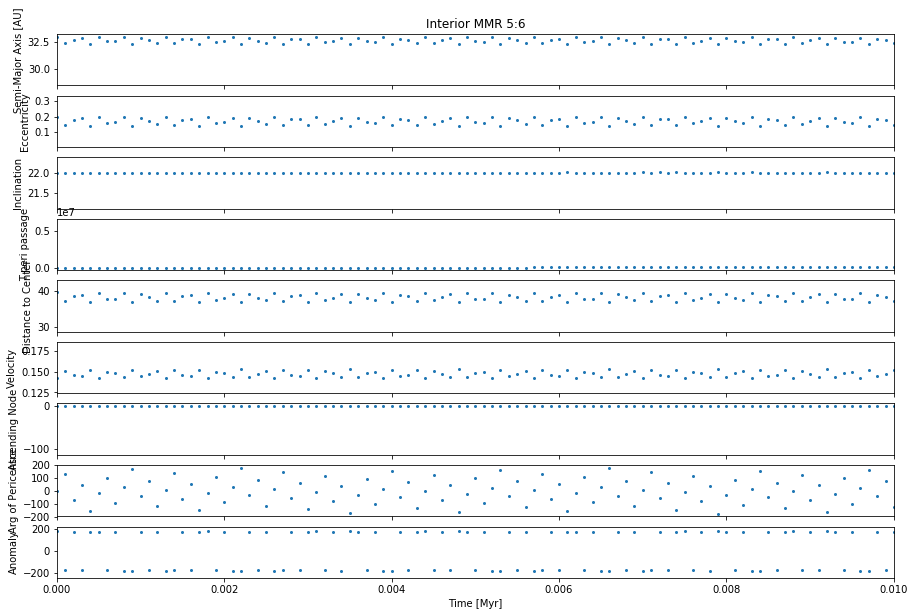

In [26]:
c=np.linspace(10e6, 40e6, Noutput)
msize = 2

fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(911)
ax1.set_ylabel("Semi-Major Axis [AU]")
#ax1.set_xlim(0,100)
#ax1.set_ylim(20,40)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.plot(times/(2*np.pi*1e6), aei[:,0,0], 'o', markersize=msize)

plt.title("Interior MMR 5:6")
ax2 = plt.subplot(912, sharex=ax1)
ax2.set_ylabel("Eccentricity")
#ax2.set_xlim(0,100)
#ax2.set_ylim(0,0.6)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.plot(times/(2*np.pi*1e6), aei[:,0,1],'o', markersize=msize)

ax3 = plt.subplot(913, sharex=ax1)
ax3.set_ylabel("Inclination")
#ax3.set_xlim(0,100)
#ax3.set_ylim(0,0.8)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.plot(times/(2*np.pi*1e6), aei[:,0,2],'o', markersize=msize)

ax4 = plt.subplot(914, sharex=ax1)
ax4.set_ylabel("T peri passage")
#ax3.set_xlim(0,100)
#ax3.set_ylim(0,0.8)
plt.setp(ax4.get_xticklabels(), visible=False)
ax4.plot(times/(2*np.pi*1e6), aei[:,0,3],'o', markersize=msize)

ax5 = plt.subplot(915, sharex=ax1)
ax5.set_ylabel("Distance to Center")
#ax1.set_xlim(0,100)
#ax1.set_ylim(20,40)
plt.setp(ax5.get_xticklabels(), visible=False)
ax5.plot(times/(2*np.pi*1e6), aei[:,0,4], 'o', markersize=msize)

ax6 = plt.subplot(916, sharex=ax1)
ax6.set_ylabel("Velocity")
#ax2.set_xlim(0,100)
#ax2.set_ylim(0,0.6)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.plot(times/(2*np.pi*1e6), aei[:,0,5],'o', markersize=msize)

ax7 = plt.subplot(917, sharex=ax1)
ax7.set_ylabel("Ascending Node")
#ax1.set_xlim(0,100)
#ax1.set_ylim(20,40)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.plot(times/(2*np.pi*1e6), aei[:,0,6], 'o', markersize=msize)

ax8 = plt.subplot(918, sharex=ax1)
ax8.set_ylabel("Arg of Pericentre")
#ax2.set_xlim(0,100)
#ax2.set_ylim(0,0.6)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.plot(times/(2*np.pi*1e6), aei[:,0,7],'o', markersize=msize)

ax9 = plt.subplot(919, sharex=ax1)
ax9.set_xlabel("Time [Myr]")
ax9.set_ylabel("Anomaly")
ax9.set_xlim(0,1e-2)
#ax3.set_ylim(0,0.8)
ax9.plot(times/(2*np.pi*1e6), aei[:,0,8],'o', markersize=msize)

print((datetime.now()-start))

<IPython.core.display.Javascript object>


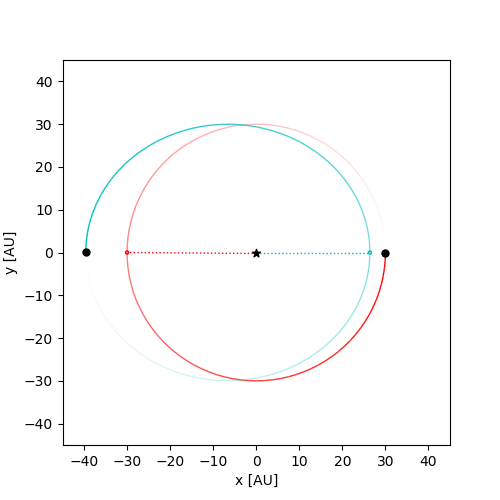

<IPython.core.display.Javascript object>


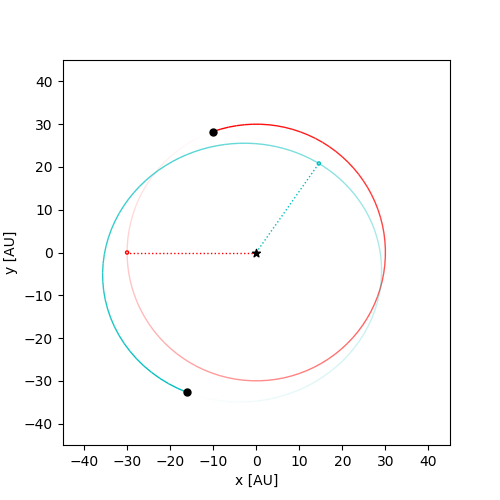

<IPython.core.display.Javascript object>


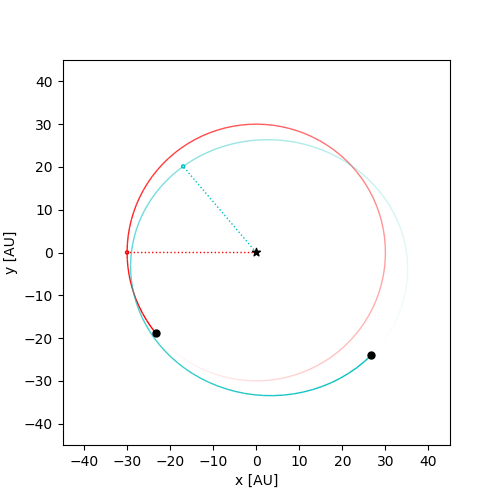

<IPython.core.display.Javascript object>


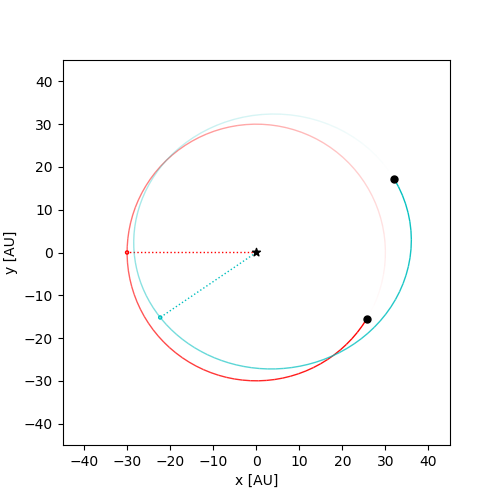

<IPython.core.display.Javascript object>


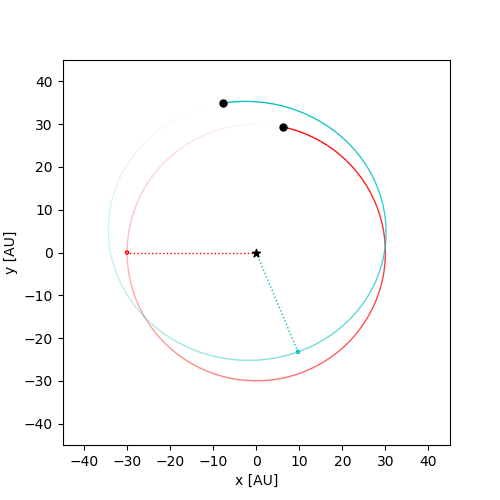

In [144]:
from IPython.display import display, clear_output

sim.move_to_com() # move to center of mass frame first

tpi = 2*np.pi
r2d = 360/tpi
Noutput = 5
numyears = 200
times = np.linspace(0, numyears*tpi, Noutput)
aei = np.zeros((Noutput, Ndust, 6))

for i, time in enumerate(times):
    sim.integrate(time)
    for l, p in enumerate(ps[2:Ndust+2]):
        aei[i][l] = [p.a, p.e, p.inc*r2d, p.Omega*r2d, p.omega*r2d, p.f*r2d]
    fig = rebound.OrbitPlot(sim,color=True,unitlabel="[AU]", lim=45, periastron=True)
    plt.savefig("Orbitplot{:04d}.png".format(i))
    #display(fig)
    #plt.close(fig)
    #clear_output(wait=True)

In [ ]:


#Noutput = 200
#numyears = 1e6
#times = np.linspace(0, numyears*2*np.pi, Noutput)

#fig, ax = plt.subplots(figsize=(3,1))
#ax = plt.subplot(xlim=(211)
#ax.set_xlim([0,numyears*tpi])
#ax.set_ylim([0,a*1.3])
#sma, = ax.plot([], [])
#ax = plt.subplot(212)
#ax.set_xlim([0,numyears*tpi])
#ax.set_ylim([0,1])
#e, = ax.plot([], [])

#def init():
#    sma.set_data([],[])
#    e.set_data([],[])
#    return sma, e,

#def animate(i):
#    x = times[:i]
#    a = aei[:i,0,0]
#    e = aei[:i,0,1]
#    sma.set_data(x,a)
#    e.set_data(x,e)
#    return sma, e,

#anim = ani.FuncAnimation(fig, animate, init_func=init, frames=Noutput, interval=20, blit=True)